数据将保存到: output_domains_test

文件1加载成功！前5行示例：
      Hop_1      Hop_2      Hop_3      Hop_4      Hop_5      Hop_6      Hop_7  \
0 -8.353219  -7.134938 -12.042595 -12.753598  -7.900841 -12.340952 -13.008821   
1  7.102001   6.611667   7.212656   4.937748   4.793293   6.245466  -1.299127   
2  5.394821  10.766293   6.655747   8.665895  15.122867  13.370543  16.530303   
3  4.045072   8.801989  10.317979  17.561979  17.896633  16.626829  15.121564   
4 -3.169429  -9.455896 -14.303659 -17.083817 -21.588047 -29.277676 -19.812830   

       Hop_8      Hop_9     Hop_10  ...     Hop_91     Hop_92     Hop_93  \
0 -17.356322 -14.034874 -11.159706  ... -49.372045 -56.986833 -67.216729   
1  13.514101  17.164607  19.455528  ...  58.865271  53.921378  60.028108   
2  11.549650  11.107712  14.346911  ...  35.183480  39.796693  56.389382   
3   7.805363  22.568901  21.589487  ... -24.011764 -29.189175 -32.756774   
4 -24.393657 -25.245511 -26.403207  ...   1.353785 -23.238466 -29.095980   

      Hop_94

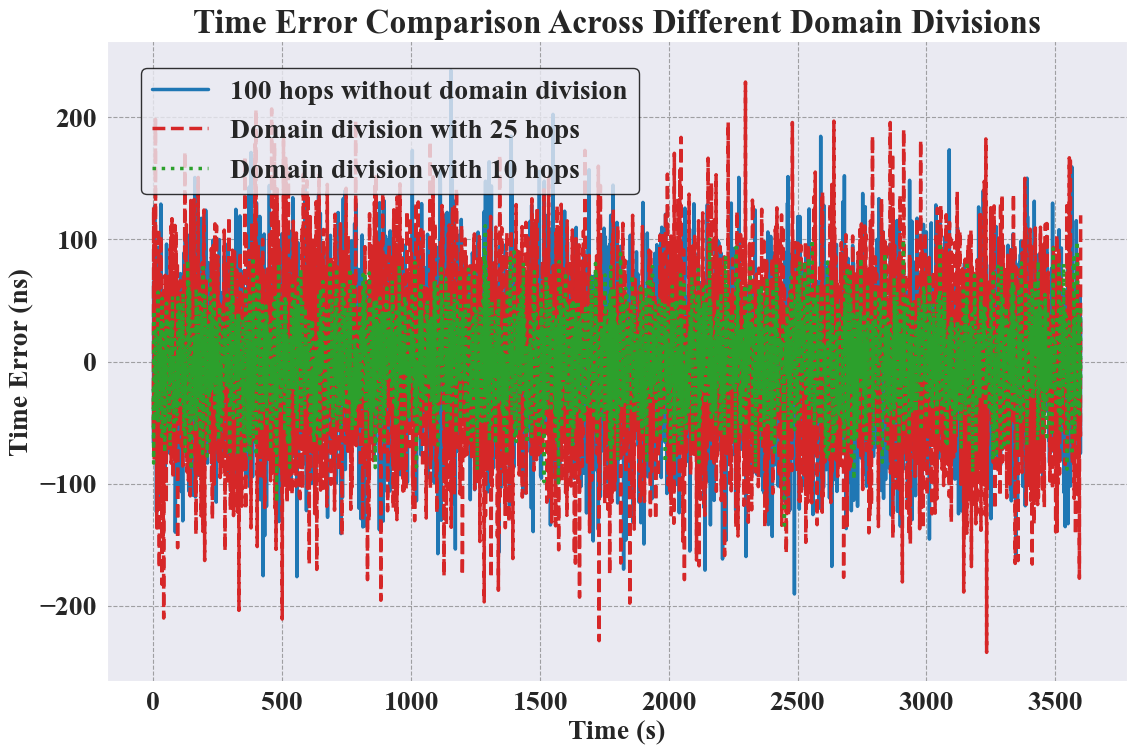

折线图已保存到: output_domains_test\time_error_comparison.png

所有处理完成！


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# 设置全局字体和字号
plt.rcParams.update({
    'font.size': 20,
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.weight': 'bold',
    'axes.labelweight': 'bold',
    'mathtext.fontset': 'stix'
})

# 1. 定义文件路径
file1 = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250430\output_data\te_all_hops.csv"
# file1 = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_test\te_all_hops.csv"
# file2 = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250430\output_data\case1_data.csv"
file2 = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data\case1_data.csv"
# file3 = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250430\output_data\case2_data.csv"
file3 = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data\case2_data.csv"

# 2. 创建输出目录
output_dir = "output_domains_test"
os.makedirs(output_dir, exist_ok=True)
print(f"数据将保存到: {output_dir}")

# 3. 数据预处理函数
def preprocess_data(data_col):
    """处理数据列，去除NaN值并转换为numpy数组"""
    data = data_col.values
    data = np.nan_to_num(data, nan=np.nanmean(data))
    return data

# 4. 读取并处理数据
try:
    # 读取第一组数据 (Hop_100)
    df1 = pd.read_csv(file1)
    print("\n文件1加载成功！前5行示例：")
    print(df1.head())
    
    data1 = preprocess_data(df1["Hop_100"])
    print(f"处理数据1: 有效数据点={len(data1)}")
    
    # 读取第二组数据 (Hop_11)
    df2 = pd.read_csv(file3)
    print("\n文件2加载成功！前5行示例：")
    print(df2.head())
    
    data2 = preprocess_data(df2["Hop_100"])
    print(f"处理数据2: 有效数据点={len(data2)}")
    
    # 读取第三组数据 (Hop_5)
    df3 = pd.read_csv(file2)
    print("\n文件3加载成功！前5行示例：")
    print(df3.head())
    
    data3 = preprocess_data(df3["Hop_100"])
    print(f"处理数据3: 有效数据点={len(data3)}")
    
except Exception as e:
    print(f"\n数据文件加载失败: {e}")
    raise

# 5. 创建结果DataFrame并保存
result_df = pd.DataFrame({
    "100 hops without domain division": data1,
    "Domain division with 25 hops": data2,
    "Domain division with 10 hops": data3
})

output_csv_path = os.path.join(output_dir, "data_domains.csv")
result_df.to_csv(output_csv_path, index=False)
print(f"\n所有数据已合并保存到: {output_csv_path}")

# 6. 绘制折线图
plt.figure(figsize=(12, 8))
ax = plt.gca()

# 定义线条样式
colors = ['#1f77b4', '#d62728', '#2ca02c']  # 蓝,红,绿
linestyles = ['-', '--', ':']
linewidths = [2.5, 2.5, 2.5]

# 绘制三组数据
x = np.arange(len(data1))  # 假设三组数据长度相同
ax.plot(x, data1, 
        color=colors[0], 
        linestyle=linestyles[0],
        linewidth=linewidths[0],
        label='100 hops without domain division')

ax.plot(x, data2, 
        color=colors[1], 
        linestyle=linestyles[1],
        linewidth=linewidths[1],
        label='Domain division with 25 hops')

ax.plot(x, data3, 
        color=colors[2], 
        linestyle=linestyles[2],
        linewidth=linewidths[2],
        label='Domain division with 10 hops')

# 设置图表属性
ax.set_xlabel('Time (s)', fontweight='bold')
ax.set_ylabel('Time Error (ns)', fontweight='bold')
ax.set_title('Time Error Comparison Across Different Domain Divisions', fontweight='bold')
ax.grid(True, which="both", linestyle='--', color='gray', alpha=0.7)

# 修改图例位置和样式 - 放在左上角内部
legend = ax.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98),
                  frameon=True, framealpha=0.8, edgecolor='black')

# 调整布局以留出足够空间
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.1)

# 保存图表
output_plot_path = os.path.join(output_dir, "time_error_comparison.png")
plt.savefig(output_plot_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()
print(f"折线图已保存到: {output_plot_path}")

print("\n所有处理完成！")


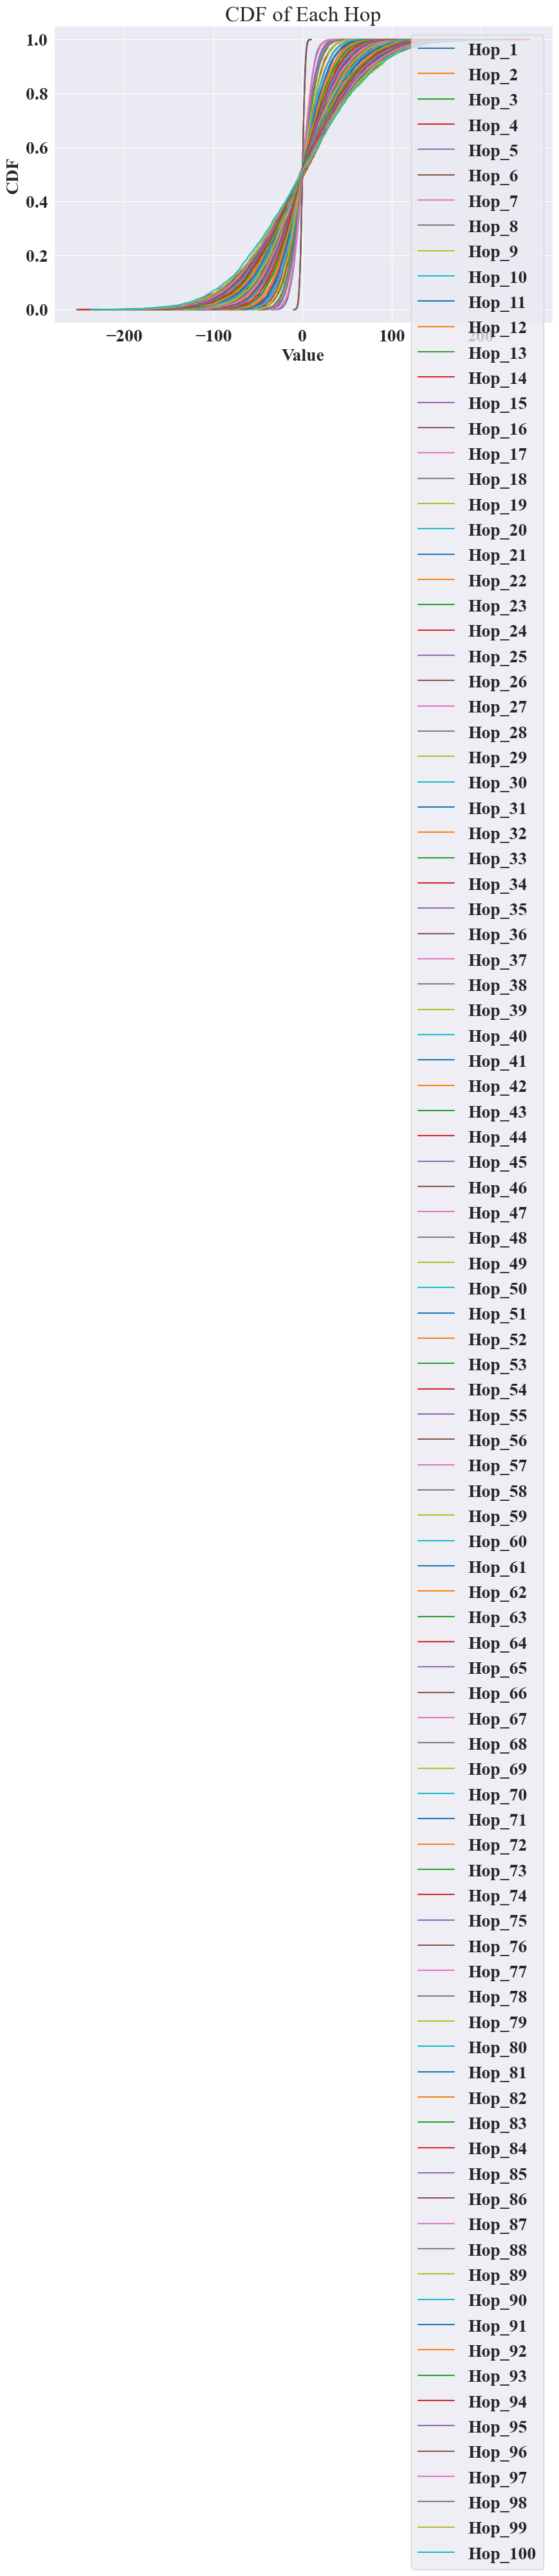

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取CSV文件
file_path = r'D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data\te_all_hops.csv'
data = pd.read_csv(file_path)

# 计算每一列的CDF并绘制CDF图
plt.figure(figsize=(10, 6))

for column in data.columns:
    sorted_data = np.sort(data[column])
    yvals = np.arange(len(sorted_data)) / float(len(sorted_data) - 1)
    plt.plot(sorted_data, yvals, label=column)

plt.xlabel('Value')
plt.ylabel('CDF')
plt.title('CDF of Each Hop')
plt.legend()
plt.grid(True)
plt.show()


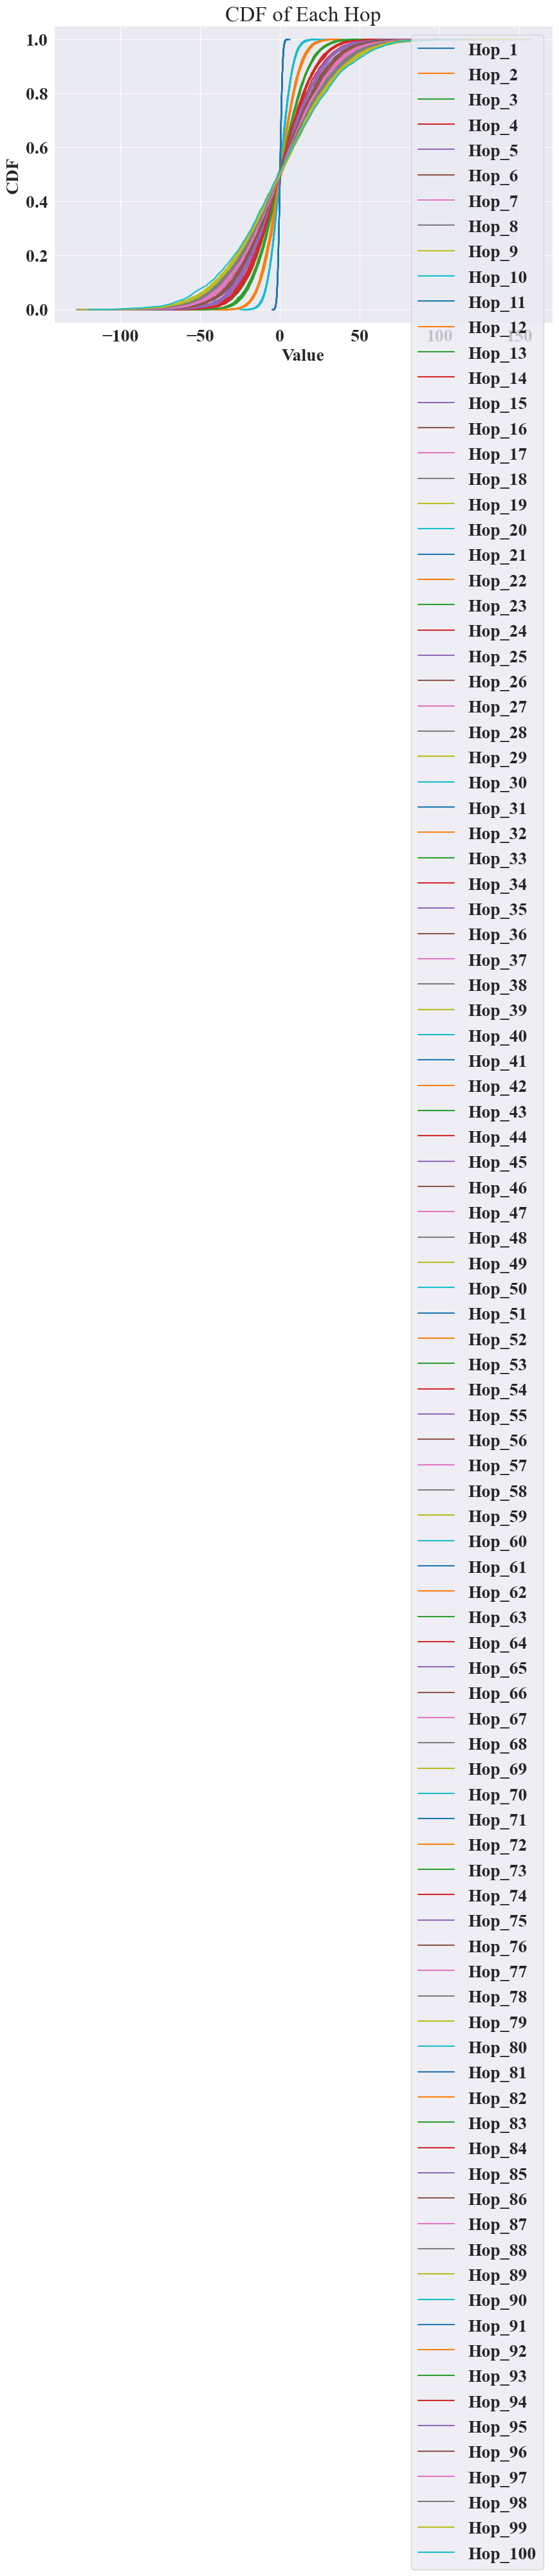

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取CSV文件
file_path = r'D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250430\output_data\case1_data.csv'
data = pd.read_csv(file_path)

# 计算每一列的CDF并绘制CDF图
plt.figure(figsize=(10, 6))

for column in data.columns:
    sorted_data = np.sort(data[column])
    yvals = np.arange(len(sorted_data)) / float(len(sorted_data) - 1)
    plt.plot(sorted_data, yvals, label=column)

plt.xlabel('Value')
plt.ylabel('CDF')
plt.title('CDF of Each Hop')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/4/29 11:38
*  @Project :   pj_gptp_simulation
*  @Description :   计算时间感知域划分网络的时间误差
*  @FileName:   main_test_20250429_domain_aware.py
**************************************
"""

# Time Synchronization Simulation for IEEE 802.1AS in IEC/IEEE 60802
# Extended with Time-Aware Domain Partitioning Support

import numpy as np
from dataclasses import dataclass, field
from typing import List, Dict, Tuple, Optional, Union
import random
import os
import pandas as pd

@dataclass
class DomainParameters:
    """时间感知域的配置参数"""
    domain_id: int  # 域标识符
    domain_name: str = ""  # 域名称

    # 该域特有的时钟特性参数
    gm_clock_drift_max: float = 1.5  # 最大GM时钟漂移（ppm/s）
    gm_clock_drift_min: float = -1.5  # 最小GM时钟漂移（ppm/s）
    gm_clock_drift_fraction: float = 0.8  # 具有漂移的GM节点比例

    clock_drift_max: float = 1.5  # 最大非GM时钟漂移（ppm/s）
    clock_drift_min: float = -1.5  # 最小非GM时钟漂移（ppm/s）
    clock_drift_fraction: float = 0.8  # 具有漂移的非GM节点比例

    # 该域特有的时间戳误差参数
    tsge_tx: float = 4.0  # TX时间戳粒度误差（±ns）
    tsge_rx: float = 4.0  # RX时间戳粒度误差（±ns）
    dtse_tx: float = 4.0  # TX动态时间戳误差（±ns）
    dtse_rx: float = 4.0  # RX动态时间戳误差（±ns）

    # 该域特有的消息间隔
    pdelay_interval: float = 125.0  # pDelay消息间隔（ms）
    sync_interval: float = 125.0  # 同步消息间隔（ms）
    pdelay_turnaround: float = 10.0  # pDelay响应时间（ms）
    residence_time: float = 10.0  # 节点内驻留时间（ms）

    # 该域特有的校正因子
    mean_link_delay_correction: float = 0.98  # 平均链路延迟平均的有效性
    nrr_drift_correction: float = 0.90  # NRR漂移校正有效性
    rr_drift_correction: float = 0.90  # RR漂移校正有效性
    pdelayresp_sync_correction: float = 0.0  # pDelay响应到同步的对齐因子

    # 该域特有的NRR平滑参数
    mnrr_smoothing_n: int = 3  # 使用的先前pDelayResp数量
    mnrr_smoothing_m: int = 1  # 用于中值计算（在推荐设置中未使用）

    # 该域特有的链路时延参数
    link_delay_base: float = 0.025  # 基础链路时延(μs)
    link_delay_jitter: float = 0.001  # 链路时延抖动(μs)

    # 该域特有的下一次同步消息相关参数
    time_to_next_sync: float = None  # 到下一次同步消息的时间(ms), None表示使用sync_interval

@dataclass
class SimulationParameters:
    """时间同步仿真的参数"""
    # 网络配置
    num_hops: int = 100  # 链中的跳数
    num_runs: int = 10000  # 蒙特卡洛运行次数

    # 时钟特性
    gm_clock_drift_max: float = 1.5  # 最大GM时钟漂移（ppm/s）, 全局默认值
    gm_clock_drift_min: float = -1.5  # 最小GM时钟漂移（ppm/s）, 全局默认值
    gm_clock_drift_fraction: float = 0.8  # 具有漂移的GM节点比例, 全局默认值

    clock_drift_max: float = 1.5  # 最大非GM时钟漂移（ppm/s）, 全局默认值
    clock_drift_min: float = -1.5  # 最小非GM时钟漂移（ppm/s）, 全局默认值
    clock_drift_fraction: float = 0.8  # 具有漂移的非GM节点比例, 全局默认值

    # 时间戳误差特性
    tsge_tx: float = 4.0  # TX时间戳粒度误差（±ns）, 全局默认值
    tsge_rx: float = 4.0  # RX时间戳粒度误差（±ns）, 全局默认值
    dtse_tx: float = 4.0  # TX动态时间戳误差（±ns）, 全局默认值
    dtse_rx: float = 4.0  # RX动态时间戳误差（±ns）, 全局默认值

    # 消息间隔
    pdelay_interval: float = 125.0  # pDelay消息间隔（ms）, 全局默认值
    sync_interval: float = 125.0  # 同步消息间隔（ms）, 全局默认值
    pdelay_turnaround: float = 10.0  # pDelay响应时间（ms）, 全局默认值
    residence_time: float = 10.0  # 节点内驻留时间（ms）, 全局默认值

    # 校正因子
    mean_link_delay_correction: float = 0.98  # 平均链路延迟平均的有效性, 全局默认值
    nrr_drift_correction: float = 0.90  # NRR漂移校正有效性, 全局默认值
    rr_drift_correction: float = 0.90  # RR漂移校正有效性, 全局默认值
    pdelayresp_sync_correction: float = 0.0  # pDelay响应到同步的对齐因子, 全局默认值

    # NRR平滑参数
    mnrr_smoothing_n: int = 3  # 使用的先前pDelayResp数量, 全局默认值
    mnrr_smoothing_m: int = 1  # 用于中值计算（在推荐设置中未使用）, 全局默认值

    # 终端站计算方法使用的特定跳
    end_station_hops: List[int] = field(default_factory=lambda: [10, 25, 50, 75, 100])

    # 下一次同步消息相关参数
    consider_next_sync: bool = True  # 是否考虑下一次同步消息的影响
    time_to_next_sync: float = None  # 到下一次同步消息的时间(ms), None表示使用sync_interval
    
    # 链路时延相关参数
    link_delay_base: float = 0.025  # 基础链路时延(μs), 全局默认值
    link_delay_jitter: float = 0.001  # 链路时延抖动(μs), 全局默认值
    include_prop_delay: bool = True  # 是否在仿真中考虑传播时延

    # 时间感知域划分相关参数
    domains: List[DomainParameters] = field(default_factory=list)
    domain_boundaries: List[int] = field(default_factory=list)  # 标识各个域的边界跳数
    inter_domain_policy: str = "boundary_clock"  # 域间连接策略: "boundary_clock", "gateway", "transparent"
    
    # 保存结果的文件名
    output_filename: str = "data.csv"


@dataclass
class NodeState:
    """链中节点的状态"""
    # 时钟相关状态
    clock_drift: float = 0.0  # 时钟漂移率（ppm/s）

    # 时间戳误差
    t1_pderror: float = 0.0  # pDelay请求的TX时间戳误差
    t2_pderror: float = 0.0  # pDelay请求的RX时间戳误差
    t3_pderror: float = 0.0  # pDelay响应的TX时间戳误差
    t4_pderror: float = 0.0  # pDelay响应的RX时间戳误差
    t3_pderror_prev: List[float] = field(default_factory=list)  # 用于NRR计算的先前t3误差
    t4_pderror_prev: List[float] = field(default_factory=list)  # 用于NRR计算的先前t4误差

    t2_sinerror: float = 0.0  # 同步的RX时间戳误差
    t1_souterror: float = 0.0  # 同步的TX时间戳误差

    # 误差累积
    mnrr_error: float = 0.0  # 邻居速率比误差
    mnrr_error_ts: float = 0.0  # 由时间戳误差导致的NRR误差
    mnrr_error_cd: float = 0.0  # 由时钟漂移导致的NRR误差

    rr_error: float = 0.0  # 速率比误差
    rr_error_sum: float = 0.0  # 累积的RR误差

    mean_link_delay_error: float = 0.0  # 链路延迟测量误差
    residence_time_error: float = 0.0  # 驻留时间测量误差

    te: float = 0.0  # 该节点的动态时间误差
    
    # 链路时延相关
    link_delay: float = 0.0  # 到上游节点的链路时延(ns)
    
    # 域相关
    domain_id: int = 0  # 所属域ID
    is_domain_boundary: bool = False  # 是否为域边界节点
    boundary_role: str = ""  # 边界角色: "master", "slave" 


class TimeSyncSimulation:
    """IEEE 802.1AS 在 IEC/IEEE 60802 中的时间同步仿真，支持时间感知域划分"""

    def __init__(self, params: SimulationParameters):
        self.params = params
        
        # 确保域参数完整
        self._validate_domain_config()
        
        # 设置默认的下一次同步时间，如果未指定
        if self.params.time_to_next_sync is None:
            self.params.time_to_next_sync = self.params.sync_interval

        self.results = {
            'te_max': [],  # 所有运行中的最大te
            'te_7sigma': [],  # te的7-sigma值
            'te_per_hop': np.zeros((params.num_runs, params.num_hops)),  # 每次运行中每个跳的te
            'domain_metrics': {}  # 存储各个域的性能指标
        }

        # 为每个域初始化结果数据结构
        for domain_id in range(len(self.params.domains)):
            self.results['domain_metrics'][domain_id] = {
                'te_values': [],
                'max_te': 0,
                'avg_te': 0,
                'std_te': 0,
                '7sigma_te': 0
            }

        # 创建输出目录
        self.output_data_dir = 'output_data_text_v0'
        os.makedirs(self.output_data_dir, exist_ok=True)

    def _validate_domain_config(self):
        """验证域配置的完整性"""
        # 确保至少有一个域
        if not self.params.domains:
            # 创建默认域，使用全局参数
            default_domain = DomainParameters(
                domain_id=0,
                domain_name="Default Domain",
                gm_clock_drift_max=self.params.gm_clock_drift_max,
                gm_clock_drift_min=self.params.gm_clock_drift_min,
                gm_clock_drift_fraction=self.params.gm_clock_drift_fraction,
                clock_drift_max=self.params.clock_drift_max,
                clock_drift_min=self.params.clock_drift_min,
                clock_drift_fraction=self.params.clock_drift_fraction,
                tsge_tx=self.params.tsge_tx,
                tsge_rx=self.params.tsge_rx,
                dtse_tx=self.params.dtse_tx,
                dtse_rx=self.params.dtse_rx,
                pdelay_interval=self.params.pdelay_interval,
                sync_interval=self.params.sync_interval,
                pdelay_turnaround=self.params.pdelay_turnaround,
                residence_time=self.params.residence_time,
                mean_link_delay_correction=self.params.mean_link_delay_correction,
                nrr_drift_correction=self.params.nrr_drift_correction,
                rr_drift_correction=self.params.rr_drift_correction,
                pdelayresp_sync_correction=self.params.pdelayresp_sync_correction,
                mnrr_smoothing_n=self.params.mnrr_smoothing_n,
                mnrr_smoothing_m=self.params.mnrr_smoothing_m,
                link_delay_base=self.params.link_delay_base,
                link_delay_jitter=self.params.link_delay_jitter,
                time_to_next_sync=self.params.time_to_next_sync,
            )
            self.params.domains.append(default_domain)
        
        # 确保域边界列表完整
        if not self.params.domain_boundaries:
            # 默认所有跳都在第一个域
            self.params.domain_boundaries = [self.params.num_hops]
        
        # 确保域边界数量与域数量匹配
        if len(self.params.domain_boundaries) != len(self.params.domains):
            raise ValueError(f"域边界数量({len(self.params.domain_boundaries)})必须与域数量({len(self.params.domains)})相匹配")
        
        # 确保域边界值合理并按升序排列
        for i, boundary in enumerate(self.params.domain_boundaries):
            if boundary <= 0 or boundary > self.params.num_hops:
                raise ValueError(f"域边界必须在1到{self.params.num_hops}之间，但发现值:{boundary}")
            if i > 0 and boundary <= self.params.domain_boundaries[i-1]:
                raise ValueError(f"域边界必须严格递增，但发现:{self.params.domain_boundaries}")
        
        # 为每个域参数设置默认值
        for domain in self.params.domains:
            if domain.time_to_next_sync is None:
                domain.time_to_next_sync = domain.sync_interval

    def get_domain_for_hop(self, hop: int) -> int:
        """根据跳数确定节点所属的域ID"""
        if hop == 0:  # GM始终在第一个域
            return 0
            
        for i, boundary in enumerate(self.params.domain_boundaries):
            if hop <= boundary:
                return i
        # 理论上不会执行到这里，因为前面的验证已确保所有跳都有对应的域
        return len(self.params.domains) - 1

    def get_domain_params(self, domain_id: int) -> DomainParameters:
        """获取特定域的参数"""
        return self.params.domains[domain_id]

    def generate_timestamp_error(self, is_tx: bool, domain_params: DomainParameters) -> float:
        """使用高斯分布生成随机时间戳误差，基于域特定参数"""
        if is_tx:
            tsge = np.random.normal(0, domain_params.tsge_tx)
            dtse = np.random.normal(0, domain_params.dtse_tx)
        else:
            tsge = np.random.normal(0, domain_params.tsge_rx)
            dtse = np.random.normal(0, domain_params.dtse_rx)
        return tsge + dtse

    def generate_clock_drift(self, is_gm: bool, domain_params: DomainParameters) -> float:
        """根据域特定参数生成随机时钟漂移"""
        if is_gm:
            if np.random.random() <= domain_params.gm_clock_drift_fraction:
                return np.random.uniform(domain_params.gm_clock_drift_min, domain_params.gm_clock_drift_max)
            return 0.0
        else:
            if np.random.random() <= domain_params.clock_drift_fraction:
                return np.random.uniform(domain_params.clock_drift_min, domain_params.clock_drift_max)
            return 0.0

    def generate_pdelay_interval(self, domain_params: DomainParameters) -> float:
        """在规格范围内生成随机pDelay间隔，基于域特定参数"""
        return np.random.uniform(0.9 * domain_params.pdelay_interval, 1.3 * domain_params.pdelay_interval)
    
    def generate_link_delay(self, domain_params: DomainParameters) -> float:
        """生成链路时延，包含基础时延和随机抖动，基于域特定参数"""
        if not self.params.include_prop_delay:
            return 0.0
        
        # 转换为ns，添加随机抖动
        base_delay = domain_params.link_delay_base * 1000  # μs转换为ns
        jitter = np.random.normal(0, domain_params.link_delay_jitter * 1000)
        return max(0, base_delay + jitter)  # 确保时延不为负

    def apply_domain_boundary_policy(self, nodes: List[NodeState], hop: int):
        """在域边界应用特定策略"""
        if self.params.inter_domain_policy == "boundary_clock":
            # 边界时钟策略 - 重置时间误差但保留部分累积效应
            reset_factor = 0.2  # 保留20%的误差
            nodes[hop].te = nodes[hop-1].te * reset_factor
            nodes[hop].boundary_role = "master"
            nodes[hop-1].boundary_role = "slave"
            
        elif self.params.inter_domain_policy == "gateway":
            # 网关策略 - 完全重置时间误差，可能引入新误差
            gateway_error = np.random.normal(0, 8.0)  # 引入新的初始误差
            nodes[hop].te = gateway_error
            nodes[hop].boundary_role = "gateway"
            nodes[hop-1].boundary_role = "gateway"
            
        elif self.params.inter_domain_policy == "transparent":
            # 透明策略 - 完全传递误差
            nodes[hop].te = nodes[hop-1].te
            nodes[hop].boundary_role = "transparent"
            nodes[hop-1].boundary_role = "transparent"

    def generate_timestamp_errors(self, nodes: List[NodeState], hop: int, domain_params: DomainParameters):
        """为指定跳生成所有时间戳误差，基于域特定参数"""
        # 生成pDelay相关时间戳误差
        nodes[hop].t1_pderror = self.generate_timestamp_error(is_tx=True, domain_params=domain_params)
        nodes[hop].t2_pderror = self.generate_timestamp_error(is_tx=False, domain_params=domain_params)
        nodes[hop].t3_pderror = self.generate_timestamp_error(is_tx=True, domain_params=domain_params)
        nodes[hop].t4_pderror = self.generate_timestamp_error(is_tx=False, domain_params=domain_params)
        
        # 生成同步相关时间戳误差
        nodes[hop].t1_souterror = self.generate_timestamp_error(is_tx=True, domain_params=domain_params)
        nodes[hop].t2_sinerror = self.generate_timestamp_error(is_tx=False, domain_params=domain_params)
        
        # 为NRR计算生成先前的时间戳
        nodes[hop].t3_pderror_prev = []
        nodes[hop].t4_pderror_prev = []
        for n in range(1, domain_params.mnrr_smoothing_n):
            nodes[hop].t3_pderror_prev.append(self.generate_timestamp_error(is_tx=True, domain_params=domain_params))
            nodes[hop].t4_pderror_prev.append(self.generate_timestamp_error(is_tx=False, domain_params=domain_params))

    def calculate_mnrr_errors(self, nodes: List[NodeState], hop: int, domain_params: DomainParameters):
        """计算给定跳的mNRR误差组件，基于域特定参数"""
        # 基于mNRR平滑计算有效pDelay间隔
        tpdelay2pdelay = 0
        for n in range(domain_params.mnrr_smoothing_n):
            tpdelay2pdelay += self.generate_pdelay_interval(domain_params)

        # 计算由时间戳引起的mNRR误差
        if domain_params.mnrr_smoothing_n > 1 and len(nodes[hop].t3_pderror_prev) >= domain_params.mnrr_smoothing_n - 1:
            # 使用先前的时间戳进行NRR计算
            t3pd_diff = nodes[hop].t3_pderror - nodes[hop].t3_pderror_prev[-1]
            t4pd_diff = nodes[hop].t4_pderror - nodes[hop].t4_pderror_prev[-1]
        else:
            # 使用最近的时间戳进行默认计算
            t3pd_diff = nodes[hop].t3_pderror - 0  # 假设先前样本的误差为0（简化）
            t4pd_diff = nodes[hop].t4_pderror - 0

        nodes[hop].mnrr_error_ts = (t3pd_diff - t4pd_diff) / tpdelay2pdelay

        # 计算由时钟漂移引起的mNRR误差
        nodes[hop].mnrr_error_cd = (tpdelay2pdelay * (nodes[hop].clock_drift - nodes[hop - 1].clock_drift) / (
                    2 * 1000)) * (1.0 - domain_params.nrr_drift_correction)

        # 总mNRR误差
        nodes[hop].mnrr_error = nodes[hop].mnrr_error_ts + nodes[hop].mnrr_error_cd

    def calculate_errors(self, nodes: List[NodeState], hop: int, domain_params: DomainParameters):
        """计算给定跳的所有误差组件，基于域特定参数"""
        # 计算NRR误差
        self.calculate_mnrr_errors(nodes, hop, domain_params)

        # 计算RR误差
        if hop == 1:
            nodes[hop].rr_error = nodes[hop].mnrr_error
            nodes[hop].rr_error_sum = nodes[hop].rr_error
        else:
            # 添加由NRR测量到同步之间的时钟漂移引起的RR误差
            pdelay_to_sync = np.random.uniform(0, domain_params.pdelay_interval) * (
                        1.0 - domain_params.pdelayresp_sync_correction)
            rr_error_cd_nrr2sync = (pdelay_to_sync * (
                        nodes[hop].clock_drift - nodes[hop - 1].clock_drift) / 1000) * (
                                               1.0 - domain_params.nrr_drift_correction)

            # 添加由上游RR计算到同步之间的时钟漂移引起的RR误差
            rr_error_cd_rr2sync = (domain_params.residence_time * (
                        nodes[hop - 1].clock_drift - nodes[0].clock_drift) / 1000) * (
                                              1.0 - domain_params.rr_drift_correction)

            # 累积RR误差
            nodes[hop].rr_error = nodes[hop - 1].rr_error + nodes[
                hop].mnrr_error + rr_error_cd_nrr2sync + rr_error_cd_rr2sync
            nodes[hop].rr_error_sum = nodes[hop].rr_error

        # 真实的链路传播时延(ns)
        true_link_delay = nodes[hop].link_delay
        
        # pDelay报文实际传输时的延迟计算
        req_propagation = true_link_delay  # 请求报文的传播时延
        resp_propagation = true_link_delay  # 响应报文的传播时延
        
        # pDelay测量结果计算（IEEE 802.1AS协议中的链路延迟计算方式）
        timestamp_errors = (nodes[hop].t4_pderror - nodes[hop].t1_pderror - nodes[hop].t3_pderror + nodes[hop].t2_pderror)
        measured_link_delay = (req_propagation + resp_propagation)/2 + timestamp_errors/2
        
        # 链路延迟测量误差
        pdelay_error_ts = measured_link_delay - true_link_delay
        pdelay_error_ts *= (1.0 - domain_params.mean_link_delay_correction)
        
        pdelay_error_nrr = -domain_params.pdelay_turnaround * nodes[hop].mnrr_error / 2
        pdelay_error_nrr *= (1.0 - domain_params.mean_link_delay_correction)
        
        nodes[hop].mean_link_delay_error = pdelay_error_ts + pdelay_error_nrr

        # 计算住留时间误差
        rt_error_ts_direct = nodes[hop].t1_souterror - nodes[hop].t2_sinerror
        rt_error_rr = domain_params.residence_time * nodes[hop].rr_error
        rt_error_cd_direct = (domain_params.residence_time ** 2 * (
                    nodes[hop].clock_drift - nodes[0].clock_drift) / (2 * 1000)) * (
                                         1.0 - domain_params.rr_drift_correction)

        nodes[hop].residence_time_error = rt_error_ts_direct + rt_error_rr + rt_error_cd_direct

    def run_simulation(self):
        """运行时间同步仿真"""
        for run in range(self.params.num_runs):
            # 为新的运行重置
            nodes = [NodeState() for _ in range(self.params.num_hops + 1)]  # +1 为GM
            
            # 设置节点的域信息
            for i in range(self.params.num_hops + 1):
                domain_id = self.get_domain_for_hop(i)
                nodes[i].domain_id = domain_id
                
                # 标记域边界节点
                if i > 0 and self.get_domain_for_hop(i) != self.get_domain_for_hop(i-1):
                    nodes[i].is_domain_boundary = True
                    nodes[i-1].is_domain_boundary = True
            
            # 为所有节点生成时钟漂移
            gm_domain_params = self.get_domain_params(0)  # GM始终在第一个域
            nodes[0].clock_drift = self.generate_clock_drift(is_gm=True, domain_params=gm_domain_params)  # GM
            
            for i in range(1, self.params.num_hops + 1):
                domain_params = self.get_domain_params(nodes[i].domain_id)
                nodes[i].clock_drift = self.generate_clock_drift(is_gm=False, domain_params=domain_params)
                nodes[i].link_delay = self.generate_link_delay(domain_params)

            # 计算所有跳的误差
            te = 0.0
            for hop in range(1, self.params.num_hops + 1):
                domain_params = self.get_domain_params(nodes[hop].domain_id)
                
                # 在域边界应用特定策略
                if nodes[hop].is_domain_boundary:
                    self.apply_domain_boundary_policy(nodes, hop)
                    te = nodes[hop].te  # 更新累积误差
                else:
                    # 生成时间戳误差
                    self.generate_timestamp_errors(nodes, hop, domain_params)
                    
                    # 计算NRR和其他误差
                    self.calculate_errors(nodes, hop, domain_params)
                    
                    # 计算总时间误差
                    nodes[hop].te = te + nodes[hop].mean_link_delay_error + nodes[hop].residence_time_error
                    
                    # 如果需要考虑下一次同步消息的影响并且是指定跳或最后一跳
                    if self.params.consider_next_sync and (
                            hop == self.params.num_hops or hop in self.params.end_station_hops):
                        # 使用域特定的下一次同步时间
                        next_sync_time = domain_params.time_to_next_sync if domain_params.time_to_next_sync is not None else domain_params.sync_interval
                        
                        # 计算到下一次同步到达之前积累的额外时钟漂移误差
                        additional_drift_error = (
                                    next_sync_time * (nodes[hop].clock_drift - nodes[0].clock_drift) / 1000)
                        nodes[hop].te += additional_drift_error
                
                # 更新累积te
                te = nodes[hop].te

                # 存储结果
                self.results['te_per_hop'][run, hop - 1] = te
                
                # 收集域特定数据
                domain_id = nodes[hop].domain_id
                self.results['domain_metrics'][domain_id]['te_values'].append(te)

            # 计算完所有跳后，存储此次运行的最大te
            if run == 0 or abs(te) > self.results['te_max'][-1]:
                self.results['te_max'].append(abs(te))

        # 计算7-sigma te（比最大值更具统计代表性）
        for hop in range(self.params.num_hops):
            te_at_hop = self.results['te_per_hop'][:, hop]
            self.results['te_7sigma'].append(np.std(te_at_hop) * 7)
        
        # 计算每个域的统计数据
        for domain_id in self.results['domain_metrics']:
            domain_data = np.array(self.results['domain_metrics'][domain_id]['te_values'])
            if len(domain_data) > 0:
                self.results['domain_metrics'][domain_id]['max_te'] = np.max(np.abs(domain_data))
                self.results['domain_metrics'][domain_id]['avg_te'] = np.mean(domain_data)
                self.results['domain_metrics'][domain_id]['std_te'] = np.std(domain_data)
                self.results['domain_metrics'][domain_id]['7sigma_te'] = np.std(domain_data) * 7

        # 保存数据到CSV文件
        self.save_results_to_csv()

    def save_results_to_csv(self):
        """将所有节点的时间误差结果保存到CSV文件中"""
        # 创建一个包含所有跳的te数据的DataFrame
        all_te_data = {}
        for hop in range(1, self.params.num_hops + 1):
            hop_data = self.results['te_per_hop'][:, hop - 1]
            all_te_data[f'Hop_{hop}'] = hop_data

        df = pd.DataFrame(all_te_data)
        
        # 保存到CSV文件
        df.to_csv(os.path.join(self.output_data_dir, 'te_all_hops.csv'), index=False)

        # 保存到CSV文件
        output_path = os.path.join(self.output_data_dir, self.params.output_filename)
        df.to_csv(output_path, index=False)
        print(f"数据已保存到: {output_path}")

        # 保存7-sigma和统计数据
        stats_data = {
            'Hop': list(range(1, self.params.num_hops + 1)),
            'Domain': [self.get_domain_for_hop(hop) for hop in range(1, self.params.num_hops + 1)],
            'te_7sigma': self.results['te_7sigma'],
            'te_Mean': [np.mean(self.results['te_per_hop'][:, i]) for i in range(self.params.num_hops)],
            'te_Std': [np.std(self.results['te_per_hop'][:, i]) for i in range(self.params.num_hops)],
            'te_Min': [np.min(self.results['te_per_hop'][:, i]) for i in range(self.params.num_hops)],
            'te_Max': [np.max(self.results['te_per_hop'][:, i]) for i in range(self.params.num_hops)]
        }
        stats_df = pd.DataFrame(stats_data)
        stats_path = os.path.join(self.output_data_dir, f"stats_{self.params.output_filename}")
        stats_df.to_csv(stats_path, index=False)
        print(f"统计数据已保存到: {stats_path}")


def run_case1():
    """运行Case1: 子域长度为10，每个域的配置参数相同"""
    print("\n执行Case1: 子域长度为10的仿真...")
    
    # 设置仿真参数
    num_hops = 100
    domain_size = 10
    num_domains = num_hops // domain_size
    
    # 创建域边界列表
    domain_boundaries = [(i+1) * domain_size for i in range(num_domains)]
    
    # 创建域列表，所有域使用相同参数
    domains = []
    for i in range(num_domains):
        domain = DomainParameters(
            domain_id=i,
            domain_name=f"Domain_{i}",
            # 以下使用相同的标准参数
            gm_clock_drift_max=1.5,
            gm_clock_drift_min=-1.5,
            gm_clock_drift_fraction=0.8,
            clock_drift_max=1.5,
            clock_drift_min=-1.5,
            clock_drift_fraction=0.8,
            tsge_tx=4.0,
            tsge_rx=4.0,
            dtse_tx=4.0,
            dtse_rx=4.0,
            pdelay_interval=1000.0,
            sync_interval=125.0,
            pdelay_turnaround=0.5,
            residence_time=1.0,
            mean_link_delay_correction=0.0,
            nrr_drift_correction=0.0,
            rr_drift_correction=0.0,
            pdelayresp_sync_correction=0.0,
            link_delay_base=0.025,
            link_delay_jitter=0.004,
        )
        domains.append(domain)
    
    # 创建仿真参数
    params = SimulationParameters(
        num_hops=num_hops,
        num_runs=3600,  # 使用适量运行次数
        domains=domains,
        domain_boundaries=domain_boundaries,
        inter_domain_policy="boundary_clock",
        consider_next_sync=True,
        include_prop_delay=True,
        output_filename="case1_data.csv"  # 设置输出文件名
    )
    
    # 运行仿真
    sim = TimeSyncSimulation(params)
    sim.run_simulation()
    
    # 输出结果摘要
    max_te = max(sim.results['te_max'])
    final_7sigma = sim.results['te_7sigma'][-1]
    print(f"Case1完成 - 最大时间误差: {max_te:.1f} ns, 最终7-sigma时间误差: {final_7sigma:.1f} ns")


def run_case2():
    """运行Case2: 子域长度为20，每个域的配置参数相同"""
    print("\n执行Case2: 子域长度为20的仿真...")
    
    # 设置仿真参数
    num_hops = 100
    domain_size = 25
    num_domains = num_hops // domain_size
    
    # 创建域边界列表
    domain_boundaries = [(i+1) * domain_size for i in range(num_domains)]
    
    # 创建域列表，所有域使用相同参数
    domains = []
    for i in range(num_domains):
        domain = DomainParameters(
            domain_id=i,
            domain_name=f"Domain_{i}",
            # 以下使用相同的标准参数
            gm_clock_drift_max=1.5,
            gm_clock_drift_min=-1.5,
            gm_clock_drift_fraction=0.8,
            clock_drift_max=1.5,
            clock_drift_min=-1.5,
            clock_drift_fraction=0.8,
            tsge_tx=4.0,
            tsge_rx=4.0,
            dtse_tx=4.0,
            dtse_rx=4.0,
            pdelay_interval=1000.0,
            sync_interval=125.0,
            pdelay_turnaround=0.5,
            residence_time=1.0,
            mean_link_delay_correction=0.0,
            nrr_drift_correction=0.0,
            rr_drift_correction=0.0,
            pdelayresp_sync_correction=0.0,
            link_delay_base=0.025,
            link_delay_jitter=0.004,
        )
        domains.append(domain)
    
    # 创建仿真参数
    params = SimulationParameters(
        num_hops=num_hops,
        num_runs=3600,  # 使用适量运行次数
        domains=domains,
        domain_boundaries=domain_boundaries,
        inter_domain_policy="boundary_clock",
        consider_next_sync=True,
        include_prop_delay=True,
        output_filename="case2_data.csv"  # 设置输出文件名
    )
    
    # 运行仿真
    sim = TimeSyncSimulation(params)
    sim.run_simulation()
    
    # 输出结果摘要
    max_te = max(sim.results['te_max'])
    final_7sigma = sim.results['te_7sigma'][-1]
    print(f"Case2完成 - 最大时间误差: {max_te:.1f} ns, 最终7-sigma时间误差: {final_7sigma:.1f} ns")


def main():
    """主函数，依次运行两个案例"""
    # 确保输出目录存在
    os.makedirs('output_data_text_v0', exist_ok=True)
    
    # 运行Case1: 子域长度为10
    run_case1()
    
    # 运行Case2: 子域长度为20
    run_case2()
    
    print("\n所有仿真完成！")


if __name__ == "__main__":
    main()


执行Case1: 子域长度为10的仿真...
数据已保存到: output_data\case1_data.csv
统计数据已保存到: output_data\stats_case1_data.csv
Case1完成 - 最大时间误差: 133.9 ns, 最终7-sigma时间误差: 231.6 ns

执行Case2: 子域长度为20的仿真...
数据已保存到: output_data\case2_data.csv
统计数据已保存到: output_data\stats_case2_data.csv
Case2完成 - 最大时间误差: 238.0 ns, 最终7-sigma时间误差: 466.2 ns

所有仿真完成！


---

In [31]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/5/6 20:46
*  @Project :   pj_gptp_simulation
*  @Description :   Description
*  @FileName:   main_v1.py
**************************************
"""

# Time Synchronization Simulation for IEEE 802.1AS in IEC/IEEE 60802
# Based on analysis of McCall et al. documents (2021-2022)

import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass, field
from typing import List, Dict, Tuple, Optional
import random
import os
import pandas as pd
import seaborn as sns
from matplotlib.ticker import PercentFormatter


@dataclass
class SimulationParameters:
    """时间同步仿真的参数"""
    # 网络配置
    num_hops: int = 100  # 链中的跳数
    num_runs: int = 10000  # 蒙特卡洛运行次数

    # 时钟特性
    gm_clock_drift_max: float = 1.5  # 最大GM时钟漂移（ppm/s）
    gm_clock_drift_min: float = -1.5  # 最小GM时钟漂移（ppm/s）
    gm_clock_drift_fraction: float = 0.8  # 具有漂移的GM节点比例

    clock_drift_max: float = 1.5  # 最大非GM时钟漂移（ppm/s）
    clock_drift_min: float = -1.5  # 最小非GM时钟漂移（ppm/s）
    clock_drift_fraction: float = 0.8  # 具有漂移的非GM节点比例

    # 时间戳误差特性
    tsge_tx: float = 4.0  # TX时间戳粒度误差（±ns）
    tsge_rx: float = 4.0  # RX时间戳粒度误差（±ns）
    dtse_tx: float = 4.0  # TX动态时间戳误差（±ns）
    dtse_rx: float = 4.0  # RX动态时间戳误差（±ns）

    # 消息间隔
    pdelay_interval: float = 125.0  # pDelay消息间隔（ms）
    sync_interval: float = 125.0  # 同步消息间隔（ms）
    pdelay_turnaround: float = 10.0  # pDelay响应时间（ms）
    residence_time: float = 10.0  # 节点内驻留时间（ms）

    # 校正因子
    mean_link_delay_correction: float = 0.98  # 平均链路延迟平均的有效性
    nrr_drift_correction: float = 0.90  # NRR漂移校正有效性
    rr_drift_correction: float = 0.90  # RR漂移校正有效性
    pdelayresp_sync_correction: float = 0.0  # pDelay响应到同步的对齐因子

    # NRR平滑参数
    mnrr_smoothing_n: int = 3  # 使用的先前pDelayResp数量
    mnrr_smoothing_m: int = 1  # 用于中值计算（在推荐设置中未使用）

    # 终端站计算方法使用的特定跳
    end_station_hops: List[int] = field(default_factory=lambda: [10, 25, 50, 75, 100])

    # 下一次同步消息相关参数
    consider_next_sync: bool = True  # 是否考虑下一次同步消息的影响
    time_to_next_sync: float = None  # 到下一次同步消息的时间(ms), None表示使用sync_interval


@dataclass
class NodeState:
    """链中节点的状态"""
    # 时钟相关状态
    clock_drift: float = 0.0  # 时钟漂移率（ppm/s）

    # 时间戳误差
    t1_pderror: float = 0.0  # pDelay请求的TX时间戳误差
    t2_pderror: float = 0.0  # pDelay请求的RX时间戳误差
    t3_pderror: float = 0.0  # pDelay响应的TX时间戳误差
    t4_pderror: float = 0.0  # pDelay响应的RX时间戳误差
    t3_pderror_prev: List[float] = field(default_factory=list)  # 用于NRR计算的先前t3误差
    t4_pderror_prev: List[float] = field(default_factory=list)  # 用于NRR计算的先前t4误差

    t2_sinerror: float = 0.0  # 同步的RX时间戳误差
    t1_souterror: float = 0.0  # 同步的TX时间戳误差

    # 误差累积
    mnrr_error: float = 0.0  # 邻居速率比误差
    mnrr_error_ts: float = 0.0  # 由时间戳误差导致的NRR误差
    mnrr_error_cd: float = 0.0  # 由时钟漂移导致的NRR误差

    rr_error: float = 0.0  # 速率比误差
    rr_error_sum: float = 0.0  # 累积的RR误差

    mean_link_delay_error: float = 0.0  # 链路延迟测量误差
    residence_time_error: float = 0.0  # 驻留时间测量误差

    te: float = 0.0  # 该节点的动态时间误差


class TimeSyncSimulation:
    """IEEE 802.1AS 在 IEC/IEEE 60802 中的时间同步仿真"""

    def __init__(self, params: SimulationParameters):
        self.params = params
        # 设置默认的下一次同步时间，如果未指定
        if self.params.time_to_next_sync is None:
            self.params.time_to_next_sync = self.params.sync_interval

        self.results = {
            'te_max': [],  # 所有运行中的最大te
            'te_7sigma': [],  # te的7-sigma值
            'te_per_hop': np.zeros((params.num_runs, params.num_hops))  # 每次运行中每个跳的te
        }

        # 创建输出目录
        self.output_data_dir = 'output_data_v2'
        self.output_image_dir = 'output_image_v2'
        os.makedirs(self.output_data_dir, exist_ok=True)
        os.makedirs(self.output_image_dir, exist_ok=True)

    def generate_timestamp_error(self, is_tx: bool) -> float:
        """根据参数生成随机时间戳误差"""
        if is_tx:
            tsge = np.random.uniform(-self.params.tsge_tx, self.params.tsge_tx)
            dtse = np.random.uniform(-self.params.dtse_tx, self.params.dtse_tx)
        else:
            tsge = np.random.uniform(-self.params.tsge_rx, self.params.tsge_rx)
            dtse = np.random.uniform(-self.params.dtse_rx, self.params.dtse_rx)
        return tsge + dtse

    def generate_clock_drift(self, is_gm: bool) -> float:
        """根据参数生成随机时钟漂移"""
        if is_gm:
            if np.random.random() <= self.params.gm_clock_drift_fraction:
                return np.random.uniform(self.params.gm_clock_drift_min, self.params.gm_clock_drift_max)
            return 0.0
        else:
            if np.random.random() <= self.params.clock_drift_fraction:
                return np.random.uniform(self.params.clock_drift_min, self.params.clock_drift_max)
            return 0.0

    def generate_pdelay_interval(self) -> float:
        """在规格范围内生成随机pDelay间隔"""
        return np.random.uniform(0.9 * self.params.pdelay_interval,
                                 1.3 * self.params.pdelay_interval)

    def run_simulation(self):
        """运行时间同步仿真"""
        for run in range(self.params.num_runs):
            # 为新的运行重置
            nodes = [NodeState() for _ in range(self.params.num_hops + 1)]  # +1 为GM

            # 为所有节点生成时钟漂移
            nodes[0].clock_drift = self.generate_clock_drift(is_gm=True)  # GM
            for i in range(1, self.params.num_hops + 1):
                nodes[i].clock_drift = self.generate_clock_drift(is_gm=False)

            # 计算所有跳的误差
            te = 0.0
            for hop in range(1, self.params.num_hops + 1):
                # 生成时间戳误差
                nodes[hop].t1_pderror = self.generate_timestamp_error(is_tx=True)
                nodes[hop].t2_pderror = self.generate_timestamp_error(is_tx=False)
                nodes[hop].t3_pderror = self.generate_timestamp_error(is_tx=True)
                nodes[hop].t4_pderror = self.generate_timestamp_error(is_tx=False)
                nodes[hop].t1_souterror = self.generate_timestamp_error(is_tx=True)
                nodes[hop].t2_sinerror = self.generate_timestamp_error(is_tx=False)

                # 为NRR计算生成先前的时间戳
                for n in range(1, self.params.mnrr_smoothing_n):
                    nodes[hop].t3_pderror_prev.append(self.generate_timestamp_error(is_tx=True))
                    nodes[hop].t4_pderror_prev.append(self.generate_timestamp_error(is_tx=False))

                # 计算NRR误差组件
                self.calculate_mnrr_errors(nodes, hop)

                # 计算RR误差
                if hop == 1:
                    nodes[hop].rr_error = nodes[hop].mnrr_error
                    nodes[hop].rr_error_sum = nodes[hop].rr_error
                else:
                    # 添加由NRR测量到同步之间的时钟漂移引起的RR误差
                    pdelay_to_sync = np.random.uniform(0, self.params.pdelay_interval) * (
                                1.0 - self.params.pdelayresp_sync_correction)
                    rr_error_cd_nrr2sync = (pdelay_to_sync * (
                                nodes[hop].clock_drift - nodes[hop - 1].clock_drift) / 1000) * (
                                                       1.0 - self.params.nrr_drift_correction)

                    # 添加由上游RR计算到同步之间的时钟漂移引起的RR误差
                    rr_error_cd_rr2sync = (self.params.residence_time * (
                                nodes[hop - 1].clock_drift - nodes[0].clock_drift) / 1000) * (
                                                      1.0 - self.params.rr_drift_correction)

                    # 累积RR误差
                    nodes[hop].rr_error = nodes[hop - 1].rr_error + nodes[
                        hop].mnrr_error + rr_error_cd_nrr2sync + rr_error_cd_rr2sync
                    nodes[hop].rr_error_sum = nodes[hop].rr_error

                # 计算平均链路延迟误差
                pdelay_error_ts = (nodes[hop].t4_pderror - nodes[hop].t1_pderror - nodes[hop].t3_pderror + nodes[
                    hop].t2_pderror) / 2
                pdelay_error_ts *= (1.0 - self.params.mean_link_delay_correction)

                pdelay_error_nrr = -self.params.pdelay_turnaround * nodes[hop].mnrr_error / 2
                pdelay_error_nrr *= (1.0 - self.params.mean_link_delay_correction)

                nodes[hop].mean_link_delay_error = pdelay_error_ts + pdelay_error_nrr

                # 修改: 对所有节点使用相同的误差计算方法（普通桥接设备方法）
                rt_error_ts_direct = nodes[hop].t1_souterror - nodes[hop].t2_sinerror
                rt_error_rr = self.params.residence_time * nodes[hop].rr_error
                rt_error_cd_direct = (self.params.residence_time ** 2 * (
                            nodes[hop].clock_drift - nodes[0].clock_drift) / (2 * 1000)) * (
                                                 1.0 - self.params.rr_drift_correction)

                nodes[hop].residence_time_error = rt_error_ts_direct + rt_error_rr + rt_error_cd_direct
                nodes[hop].te = te + nodes[hop].mean_link_delay_error + nodes[hop].residence_time_error

                # 如果需要考虑下一次同步消息的影响并且是指定跳或最后一跳，则添加额外的时钟漂移误差
                if self.params.consider_next_sync and (
                        hop == self.params.num_hops or hop in self.params.end_station_hops):
                    # 计算到下一次同步到达之前积累的额外时钟漂移误差
                    additional_drift_error = (
                                self.params.time_to_next_sync * (nodes[hop].clock_drift - nodes[0].clock_drift) / 1000)
                    nodes[hop].te += additional_drift_error

                # 更新下一跳的累积te
                te = nodes[hop].te

                # 存储结果
                self.results['te_per_hop'][run, hop - 1] = te

            # 计算完所有跳后，存储此次运行的最大te
            if run == 0 or abs(te) > self.results['te_max'][-1]:
                self.results['te_max'].append(abs(te))

        # 计算7-sigma te（比最大值更具统计代表性）
        for hop in range(self.params.num_hops):
            te_at_hop = self.results['te_per_hop'][:, hop]
            self.results['te_7sigma'].append(np.std(te_at_hop) * 7)

        # 保存数据到CSV文件
        self.save_results_to_csv()

    def calculate_mnrr_errors(self, nodes: List[NodeState], hop: int):
        """计算给定跳的mNRR误差组件"""
        # 基于mNRR平滑计算有效pDelay间隔
        tpdelay2pdelay = 0
        for n in range(self.params.mnrr_smoothing_n):
            tpdelay2pdelay += self.generate_pdelay_interval()

        # 计算由时间戳引起的mNRR误差
        if self.params.mnrr_smoothing_n > 1 and len(nodes[hop].t3_pderror_prev) >= self.params.mnrr_smoothing_n - 1:
            # 使用先前的时间戳进行NRR计算
            t3pd_diff = nodes[hop].t3_pderror - nodes[hop].t3_pderror_prev[-1]
            t4pd_diff = nodes[hop].t4_pderror - nodes[hop].t4_pderror_prev[-1]
        else:
            # 使用最近的时间戳进行默认计算
            t3pd_diff = nodes[hop].t3_pderror - 0  # 假设先前样本的误差为0（简化）
            t4pd_diff = nodes[hop].t4_pderror - 0

        nodes[hop].mnrr_error_ts = (t3pd_diff - t4pd_diff) / tpdelay2pdelay

        # 计算由时钟漂移引起的mNRR误差
        nodes[hop].mnrr_error_cd = (tpdelay2pdelay * (nodes[hop].clock_drift - nodes[hop - 1].clock_drift) / (
                    2 * 1000)) * (1.0 - self.params.nrr_drift_correction)

        # 总mNRR误差
        nodes[hop].mnrr_error = nodes[hop].mnrr_error_ts + nodes[hop].mnrr_error_cd

    def save_results_to_csv(self):
        """将所有节点的时间误差结果保存到CSV文件中"""
        # 创建一个包含所有跳的te数据的DataFrame
        all_te_data = {}
        for hop in range(1, self.params.num_hops + 1):
            hop_data = self.results['te_per_hop'][:, hop - 1]
            all_te_data[f'Hop_{hop}'] = hop_data

        df = pd.DataFrame(all_te_data)

        # 保存到CSV文件
        df.to_csv(os.path.join(self.output_data_dir, 'te_all_hops_v5.csv'), index=False)

        # 保存7-sigma和统计数据
        stats_data = {
            'Hop': list(range(1, self.params.num_hops + 1)),
            'te_7sigma': self.results['te_7sigma'],
            'te_Mean': [np.mean(self.results['te_per_hop'][:, i]) for i in range(self.params.num_hops)],
            'te_Std': [np.std(self.results['te_per_hop'][:, i]) for i in range(self.params.num_hops)],
            'te_Min': [np.min(self.results['te_per_hop'][:, i]) for i in range(self.params.num_hops)],
            'te_Max': [np.max(self.results['te_per_hop'][:, i]) for i in range(self.params.num_hops)]
        }
        stats_df = pd.DataFrame(stats_data)
        stats_df.to_csv(os.path.join(self.output_data_dir, 'te_statistics_v5.csv'), index=False)

    def plot_results(self):
        """绘制仿真结果并保存图像"""
        # 1. 绘制最终跳的te分布
        self.plot_final_hop_distribution()

        # 2. 绘制te随跳数的增长
        self.plot_te_growth()

        # 3. 绘制1-7跳的时间误差数据
        self.plot_first_seven_hops()

        # 4. 绘制特定跳数(10,25,50,75,100)的时间误差折线图和CDF图
        self.plot_specific_hops_line_and_cdf()

    def plot_final_hop_distribution(self):
        """绘制最终跳的te分布"""
        plt.figure(figsize=(10, 6))
        final_hop_te = self.results['te_per_hop'][:, -1]
        plt.hist(final_hop_te, bins=50, alpha=0.7)
        # plt.axvline(x=self.results['te_7sigma'][-1], color='r', linestyle='--',
        #            label=f'7σ: {self.results["te_7sigma"][-1]:.1f} ns')
        # plt.axvline(x=-self.results['te_7sigma'][-1], color='r', linestyle='--')
        plt.axvline(x=1000, color='g', linestyle=':', label='±1μs target')
        plt.axvline(x=-1000, color='g', linestyle=':')
        plt.xlabel('Time Error (ns)')
        plt.ylabel('Count')
        plt.title(f'te Distribution at Hop {self.params.num_hops}')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 保存图像
        plt.savefig(os.path.join(self.output_image_dir, 'final_hop_te_distribution_v5.png'), dpi=300,
                    bbox_inches='tight')
        plt.close()

    def plot_te_growth(self):
        """绘制te随跳数的增长"""
        plt.figure(figsize=(10, 6))
        hops = np.arange(1, self.params.num_hops + 1)
        # plt.plot(hops, self.results['te_7sigma'], 'b-', label='7σ te')
        plt.axhline(y=1000, color='g', linestyle=':', label='±1μs target')
        plt.xlabel('Hop Number')
        plt.ylabel('Time Error (ns)')
        # plt.title('te Growth Across Hops (7σ values)')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 保存图像
        plt.savefig(os.path.join(self.output_image_dir, 'te_growth_across_hops_v5.png'), dpi=300, bbox_inches='tight')
        plt.close()

    def plot_first_seven_hops(self):
        """绘制1-7跳的时间误差数据"""
        plt.figure(figsize=(12, 8))

        # 绘制箱形图
        first_seven_hops_data = [self.results['te_per_hop'][:, i] for i in range(7)]
        plt.boxplot(first_seven_hops_data, labels=[f'Hop {i + 1}' for i in range(7)])
        plt.xlabel('Hop Number')
        plt.ylabel('Time Error (ns)')
        plt.title('te Distribution for First 7 Hops')
        plt.grid(True, alpha=0.3)

        # 保存图像
        plt.savefig(os.path.join(self.output_image_dir, 'first_seven_hops_te_v5.png'), dpi=300, bbox_inches='tight')
        plt.close()

        # 绘制小提琴图
        plt.figure(figsize=(12, 8))
        first_seven_df = pd.DataFrame({f'Hop {i + 1}': self.results['te_per_hop'][:, i] for i in range(7)})
        sns.violinplot(data=first_seven_df)
        plt.xlabel('Hop Number')
        plt.ylabel('Time Error (ns)')
        plt.title('te Distribution for First 7 Hops (Violin Plot)')
        plt.grid(True, alpha=0.3)

        # 保存图像
        plt.savefig(os.path.join(self.output_image_dir, 'first_seven_hops_te_violin_v5.png'), dpi=300,
                    bbox_inches='tight')
        plt.close()

    def plot_specific_hops_line_and_cdf(self):
        """绘制特定跳数(10,25,50,75,100)的时间误差折线图和CDF图"""
        specific_hops = [10, 25, 50, 75, 100]
        specific_hops = [h for h in specific_hops if h <= self.params.num_hops]

        # 折线图 - 每次运行的te随时间的变化
        plt.figure(figsize=(12, 8))
        for hop in specific_hops:
            # 选择100次运行进行可视化，否则图会太乱
            sample_runs = np.random.choice(self.params.num_runs, size=min(100, self.params.num_runs), replace=False)
            for run in sample_runs:
                if hop == specific_hops[0]:  # 只对第一个跳添加标签，避免重复
                    plt.plot(self.results['te_per_hop'][run, :hop], alpha=0.1, color=f'C{specific_hops.index(hop)}')

            # 绘制平均值线
            mean_values = np.mean(self.results['te_per_hop'][:, :hop], axis=0)
            plt.plot(mean_values, linewidth=2, label=f'Hop {hop} (avg)', color=f'C{specific_hops.index(hop)}')

        plt.xlabel('Hop Number')
        plt.ylabel('Time Error (ns)')
        plt.title('te Development for Specific Hops')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 保存图像
        plt.savefig(os.path.join(self.output_image_dir, 'specific_hops_te_line_v5.png'), dpi=300, bbox_inches='tight')
        plt.close()

        # CDF图 - 最终te的累积分布
        plt.figure(figsize=(12, 8))
        for hop in specific_hops:
            hop_data = self.results['te_per_hop'][:, hop - 1]
            sorted_data = np.sort(hop_data)
            # 计算每个值的CDF
            cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
            plt.plot(sorted_data, cdf, label=f'Hop {hop}')

        plt.axvline(x=1000, color='g', linestyle=':', label='±1μs target')
        plt.axvline(x=-1000, color='g', linestyle=':')
        plt.xlabel('Time Error (ns)')
        plt.ylabel('Cumulative Probability')
        plt.title('CDF of te for Specific Hops')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 保存图像
        plt.savefig(os.path.join(self.output_image_dir, 'specific_hops_te_cdf_v5.png'), dpi=300, bbox_inches='tight')
        plt.close()


# 使用推荐参数运行仿真
def main():
    # 使用推荐设置创建参数
    params = SimulationParameters(
        num_hops=100,
        num_runs=1000,  # 为演示减少

        # 时钟特性
        gm_clock_drift_max=1.5,
        gm_clock_drift_min=-1.5,
        gm_clock_drift_fraction=0.8,
        clock_drift_max=1.5,
        clock_drift_min=-1.5,
        clock_drift_fraction=0.8,

        # 时间戳误差
        tsge_tx=4.0,
        tsge_rx=4.0,
        dtse_tx=4.0,
        dtse_rx=4.0,

        # 消息间隔
        pdelay_interval=1000.0,
        sync_interval=125.0,
        pdelay_turnaround=0.5,
        residence_time=0.5,

        # 校正因子 - 推荐设置
        mean_link_delay_correction=0.0,
        nrr_drift_correction=0.0,
        rr_drift_correction=0.0,
        pdelayresp_sync_correction=0.0,
        mnrr_smoothing_n=3,
        mnrr_smoothing_m=1,

        # 终端站计算使用的特定跳
        end_station_hops=[10, 25, 50, 75, 100],

        # 下一次同步消息相关设置
        consider_next_sync=True,
        time_to_next_sync=125.0  # 默认使用sync_interval
    )

    # 创建并运行仿真
    sim = TimeSyncSimulation(params)
    print("Running simulation with recommended parameters...")
    sim.run_simulation()

    # 输出结果
    max_te = max(sim.results['te_max'])
    final_7sigma = sim.results['te_7sigma'][-1]

    print(f"Simulation complete!")
    print(f"Maximum te: {max_te:.1f} ns")
    print(f"7-sigma te at hop {params.num_hops}: {final_7sigma:.1f} ns")
    print(f"Target (<1000 ns): {'PASSED' if final_7sigma < 1000 else 'FAILED'}")

    # 绘制结果
    print("Generating plots...")
    sim.plot_results()
    print(f"Results saved to '{sim.output_data_dir}' and '{sim.output_image_dir}' directories.")


if __name__ == "__main__":
    main()

Running simulation with recommended parameters...
Simulation complete!
Maximum te: 409.3 ns
7-sigma te at hop 100: 878.6 ns
Target (<1000 ns): PASSED
Generating plots...


C:\Users\12397\AppData\Local\Temp\ipykernel_32416\279434641.py:355: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(first_seven_hops_data, labels=[f'Hop {i + 1}' for i in range(7)])


Results saved to 'output_data_v2' and 'output_image_v2' directories.


## 增加链路延迟。

In [18]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/5/6 20:46
*  @Project :   pj_gptp_simulation
*  @Description :   Description
*  @FileName:   main.py
**************************************
"""

# Time Synchronization Simulation for IEEE 802.1AS in IEC/IEEE 60802
# Based on analysis of McCall et al. documents (2021-2022)

import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass, field
from typing import List, Dict, Tuple, Optional
import random
import os
import pandas as pd
import seaborn as sns
from matplotlib.ticker import PercentFormatter


@dataclass
class SimulationParameters:
    """时间同步仿真的参数"""
    # 网络配置
    num_hops: int = 100  # 链中的跳数
    num_runs: int = 10000  # 蒙特卡洛运行次数

    # 时钟特性
    gm_clock_drift_max: float = 1.5  # 最大GM时钟漂移（ppm/s）
    gm_clock_drift_min: float = -1.5  # 最小GM时钟漂移（ppm/s）
    gm_clock_drift_fraction: float = 0.8  # 具有漂移的GM节点比例

    clock_drift_max: float = 1.5  # 最大非GM时钟漂移（ppm/s）
    clock_drift_min: float = -1.5  # 最小非GM时钟漂移（ppm/s）
    clock_drift_fraction: float = 0.8  # 具有漂移的非GM节点比例

    # 时间戳误差特性
    tsge_tx: float = 4.0  # TX时间戳粒度误差（±ns）
    tsge_rx: float = 4.0  # RX时间戳粒度误差（±ns）
    dtse_tx: float = 4.0  # TX动态时间戳误差（±ns）
    dtse_rx: float = 4.0  # RX动态时间戳误差（±ns）

    # 消息间隔
    pdelay_interval: float = 125.0  # pDelay消息间隔（ms）
    sync_interval: float = 125.0  # 同步消息间隔（ms）
    pdelay_turnaround: float = 10.0  # pDelay响应时间（ms）
    residence_time: float = 10.0  # 节点内驻留时间（ms）

    # 校正因子
    mean_link_delay_correction: float = 0.98  # 平均链路延迟平均的有效性
    nrr_drift_correction: float = 0.90  # NRR漂移校正有效性
    rr_drift_correction: float = 0.90  # RR漂移校正有效性
    pdelayresp_sync_correction: float = 0.0  # pDelay响应到同步的对齐因子

    # NRR平滑参数
    mnrr_smoothing_n: int = 3  # 使用的先前pDelayResp数量
    mnrr_smoothing_m: int = 1  # 用于中值计算（在推荐设置中未使用）

    # 终端站计算方法使用的特定跳
    end_station_hops: List[int] = field(default_factory=lambda: [10, 25, 50, 75, 100])

    # 下一次同步消息相关参数
    consider_next_sync: bool = True  # 是否考虑下一次同步消息的影响
    time_to_next_sync: float = None  # 到下一次同步消息的时间(ms), None表示使用sync_interval

    # 链路时延相关参数
    link_delay_base: float = 0.025  # 基础链路时延 (μs)
    link_delay_jitter: float = 0.001  # 链路时延抖动 (μs)
    include_prop_delay: bool = True  # 是否在仿真中考虑传播时延


@dataclass
class NodeState:
    """链中节点的状态"""
    # 时钟相关状态
    clock_drift: float = 0.0  # 时钟漂移率（ppm/s）

    # 时间戳误差
    t1_pderror: float = 0.0  # pDelay请求的TX时间戳误差
    t2_pderror: float = 0.0  # pDelay请求的RX时间戳误差
    t3_pderror: float = 0.0  # pDelay响应的TX时间戳误差
    t4_pderror: float = 0.0  # pDelay响应的RX时间戳误差
    t3_pderror_prev: List[float] = field(default_factory=list)  # 用于NRR计算的先前t3误差
    t4_pderror_prev: List[float] = field(default_factory=list)  # 用于NRR计算的先前t4误差

    t2_sinerror: float = 0.0  # 同步的RX时间戳误差
    t1_souterror: float = 0.0  # 同步的TX时间戳误差

    # 误差累积
    mnrr_error: float = 0.0  # 邻居速率比误差
    mnrr_error_ts: float = 0.0  # 由时间戳误差导致的NRR误差
    mnrr_error_cd: float = 0.0  # 由时钟漂移导致的NRR误差

    rr_error: float = 0.0  # 速率比误差
    rr_error_sum: float = 0.0  # 累积的RR误差

    mean_link_delay_error: float = 0.0  # 链路延迟测量误差
    residence_time_error: float = 0.0  # 驻留时间测量误差

    te: float = 0.0  # 该节点的动态时间误差

    # 链路时延相关
    link_delay: float = 0.0  # 到上游节点的链路时延 (ns)


class TimeSyncSimulation:
    """IEEE 802.1AS 在 IEC/IEEE 60802 中的时间同步仿真"""

    def __init__(self, params: SimulationParameters):
        self.params = params
        # 设置默认的下一次同步时间，如果未指定
        if self.params.time_to_next_sync is None:
            self.params.time_to_next_sync = self.params.sync_interval

        self.results = {
            'te_max': [],  # 所有运行中的最大te
            'te_7sigma': [],  # te的7-sigma值
            'te_per_hop': np.zeros((params.num_runs, params.num_hops))  # 每次运行中每个跳的te
        }

        # 创建输出目录
        self.output_data_dir = 'output_data_text_v2'
        self.output_image_dir = 'output_image_text_v2'
        os.makedirs(self.output_data_dir, exist_ok=True)
        os.makedirs(self.output_image_dir, exist_ok=True)

    def generate_timestamp_error(self, is_tx: bool) -> float:
        """根据参数生成随机时间戳误差"""
        if is_tx:
            tsge = np.random.uniform(-self.params.tsge_tx, self.params.tsge_tx)
            dtse = np.random.uniform(-self.params.dtse_tx, self.params.dtse_tx)
        else:
            tsge = np.random.uniform(-self.params.tsge_rx, self.params.tsge_rx)
            dtse = np.random.uniform(-self.params.dtse_rx, self.params.dtse_rx)
        return tsge + dtse

    def generate_clock_drift(self, is_gm: bool) -> float:
        """根据参数生成随机时钟漂移"""
        if is_gm:
            if np.random.random() <= self.params.gm_clock_drift_fraction:
                return np.random.uniform(self.params.gm_clock_drift_min, self.params.gm_clock_drift_max)
            return 0.0
        else:
            if np.random.random() <= self.params.clock_drift_fraction:
                return np.random.uniform(self.params.clock_drift_min, self.params.clock_drift_max)
            return 0.0

    def generate_pdelay_interval(self) -> float:
        """在规格范围内生成随机pDelay间隔"""
        return np.random.uniform(0.9 * self.params.pdelay_interval,
                                 1.3 * self.params.pdelay_interval)

    def generate_link_delay(self) -> float:
        """生成链路时延，包含基础时延和随机抖动"""
        if not self.params.include_prop_delay:
            return 0.0  # 如果不考虑传播时延，返回0

        # 转换为ns，添加随机抖动
        base_delay = self.params.link_delay_base * 1000  # μs转换为ns
        jitter = np.random.normal(0, self.params.link_delay_jitter * 1000)
        return max(0, base_delay + jitter)  # 确保时延不为负

    def run_simulation(self):
        """运行时间同步仿真"""
        for run in range(self.params.num_runs):
            # 为新的运行重置
            nodes = [NodeState() for _ in range(self.params.num_hops + 1)]  # +1 为GM

            # 为所有节点生成时钟漂移
            nodes[0].clock_drift = self.generate_clock_drift(is_gm=True)  # GM
            for i in range(1, self.params.num_hops + 1):
                nodes[i].clock_drift = self.generate_clock_drift(is_gm=False)
                nodes[i].link_delay = self.generate_link_delay()  # 生成链路时延

            # 计算所有跳的误差
            te = 0.0
            for hop in range(1, self.params.num_hops + 1):
                # 生成时间戳误差
                nodes[hop].t1_pderror = self.generate_timestamp_error(is_tx=True)
                nodes[hop].t2_pderror = self.generate_timestamp_error(is_tx=False)
                nodes[hop].t3_pderror = self.generate_timestamp_error(is_tx=True)
                nodes[hop].t4_pderror = self.generate_timestamp_error(is_tx=False)
                nodes[hop].t1_souterror = self.generate_timestamp_error(is_tx=True)
                nodes[hop].t2_sinerror = self.generate_timestamp_error(is_tx=False)

                # 为NRR计算生成先前的时间戳
                for n in range(1, self.params.mnrr_smoothing_n):
                    nodes[hop].t3_pderror_prev.append(self.generate_timestamp_error(is_tx=True))
                    nodes[hop].t4_pderror_prev.append(self.generate_timestamp_error(is_tx=False))

                # 计算NRR误差组件
                self.calculate_mnrr_errors(nodes, hop)

                # 计算RR误差
                if hop == 1:
                    nodes[hop].rr_error = nodes[hop].mnrr_error
                    nodes[hop].rr_error_sum = nodes[hop].rr_error
                else:
                    # 添加由NRR测量到同步之间的时钟漂移引起的RR误差
                    pdelay_to_sync = np.random.uniform(0, self.params.pdelay_interval) * (
                                1.0 - self.params.pdelayresp_sync_correction)
                    rr_error_cd_nrr2sync = (pdelay_to_sync * (
                                nodes[hop].clock_drift - nodes[hop - 1].clock_drift) / 1000) * (
                                                       1.0 - self.params.nrr_drift_correction)

                    # 添加由上游RR计算到同步之间的时钟漂移引起的RR误差
                    rr_error_cd_rr2sync = (self.params.residence_time * (
                                nodes[hop - 1].clock_drift - nodes[0].clock_drift) / 1000) * (
                                                      1.0 - self.params.rr_drift_correction)

                    # 累积RR误差
                    nodes[hop].rr_error = nodes[hop - 1].rr_error + nodes[
                        hop].mnrr_error + rr_error_cd_nrr2sync + rr_error_cd_rr2sync
                    nodes[hop].rr_error_sum = nodes[hop].rr_error

                # 计算平均链路延迟误差
                true_link_delay = nodes[hop].link_delay  # 真实的链路传播时延 (ns)
                req_propagation = true_link_delay  # 请求报文的传播时延
                resp_propagation = true_link_delay  # 响应报文的传播时延

                # pDelay测量结果计算（IEEE 802.1AS协议中的链路延迟计算方式）
                timestamp_errors = (
                    nodes[hop].t4_pderror - nodes[hop].t1_pderror - nodes[hop].t3_pderror + nodes[hop].t2_pderror
                )
                measured_link_delay = (req_propagation + resp_propagation) / 2 + timestamp_errors / 2

                pdelay_error_ts = measured_link_delay - true_link_delay
                pdelay_error_ts *= (1.0 - self.params.mean_link_delay_correction)

                pdelay_error_nrr = -self.params.pdelay_turnaround * nodes[hop].mnrr_error / 2
                pdelay_error_nrr *= (1.0 - self.params.mean_link_delay_correction)

                nodes[hop].mean_link_delay_error = pdelay_error_ts + pdelay_error_nrr

                # 计算驻留时间误差
                rt_error_ts_direct = nodes[hop].t1_souterror - nodes[hop].t2_sinerror
                rt_error_rr = self.params.residence_time * nodes[hop].rr_error
                rt_error_cd_direct = (self.params.residence_time ** 2 * (
                            nodes[hop].clock_drift - nodes[0].clock_drift) / (2 * 1000)) * (
                                                 1.0 - self.params.rr_drift_correction)

                nodes[hop].residence_time_error = rt_error_ts_direct + rt_error_rr + rt_error_cd_direct
                nodes[hop].te = te + nodes[hop].mean_link_delay_error + nodes[hop].residence_time_error

                # 如果需要考虑下一次同步消息的影响并且是指定跳或最后一跳，则添加额外的时钟漂移误差
                if self.params.consider_next_sync and (
                        hop == self.params.num_hops or hop in self.params.end_station_hops):
                    # 计算到下一次同步到达之前积累的额外时钟漂移误差
                    additional_drift_error = (
                                self.params.time_to_next_sync * (nodes[hop].clock_drift - nodes[0].clock_drift) / 1000)
                    nodes[hop].te += additional_drift_error

                # 更新下一跳的累积te
                te = nodes[hop].te

                # 存储结果
                self.results['te_per_hop'][run, hop - 1] = te

            # 计算完所有跳后，存储此次运行的最大te
            if run == 0 or abs(te) > self.results['te_max'][-1]:
                self.results['te_max'].append(abs(te))

        # 计算7-sigma te（比最大值更具统计代表性）
        for hop in range(self.params.num_hops):
            te_at_hop = self.results['te_per_hop'][:, hop]
            self.results['te_7sigma'].append(np.std(te_at_hop) * 7)

        # 保存数据到CSV文件
        self.save_results_to_csv()

    def calculate_mnrr_errors(self, nodes: List[NodeState], hop: int):
        """计算给定跳的mNRR误差组件"""
        # 基于mNRR平滑计算有效pDelay间隔
        tpdelay2pdelay = 0
        for n in range(self.params.mnrr_smoothing_n):
            tpdelay2pdelay += self.generate_pdelay_interval()

        # 计算由时间戳引起的mNRR误差
        if self.params.mnrr_smoothing_n > 1 and len(nodes[hop].t3_pderror_prev) >= self.params.mnrr_smoothing_n - 1:
            # 使用先前的时间戳进行NRR计算
            t3pd_diff = nodes[hop].t3_pderror - nodes[hop].t3_pderror_prev[-1]
            t4pd_diff = nodes[hop].t4_pderror - nodes[hop].t4_pderror_prev[-1]
        else:
            # 使用最近的时间戳进行默认计算
            t3pd_diff = nodes[hop].t3_pderror - 0  # 假设先前样本的误差为0（简化）
            t4pd_diff = nodes[hop].t4_pderror - 0

        nodes[hop].mnrr_error_ts = (t3pd_diff - t4pd_diff) / tpdelay2pdelay

        # 计算由时钟漂移引起的mNRR误差
        nodes[hop].mnrr_error_cd = (tpdelay2pdelay * (nodes[hop].clock_drift - nodes[hop - 1].clock_drift) / (
                    2 * 1000)) * (1.0 - self.params.nrr_drift_correction)

        # 总mNRR误差
        nodes[hop].mnrr_error = nodes[hop].mnrr_error_ts + nodes[hop].mnrr_error_cd

    def save_results_to_csv(self):
        """将所有节点的时间误差结果保存到CSV文件中"""
        # 创建一个包含所有跳的te数据的DataFrame
        all_te_data = {}
        for hop in range(1, self.params.num_hops + 1):
            hop_data = self.results['te_per_hop'][:, hop - 1]
            all_te_data[f'Hop_{hop}'] = hop_data

        df = pd.DataFrame(all_te_data)

        # 保存到CSV文件
        df.to_csv(os.path.join(self.output_data_dir, 'te_all_hops.csv'), index=False)

        # 保存7-sigma和统计数据
        stats_data = {
            'Hop': list(range(1, self.params.num_hops + 1)),
            'te_7sigma': self.results['te_7sigma'],
            'te_Mean': [np.mean(self.results['te_per_hop'][:, i]) for i in range(self.params.num_hops)],
            'te_Std': [np.std(self.results['te_per_hop'][:, i]) for i in range(self.params.num_hops)],
            'te_Min': [np.min(self.results['te_per_hop'][:, i]) for i in range(self.params.num_hops)],
            'te_Max': [np.max(self.results['te_per_hop'][:, i]) for i in range(self.params.num_hops)]
        }
        stats_df = pd.DataFrame(stats_data)
        stats_df.to_csv(os.path.join(self.output_data_dir, 'te_statistics.csv'), index=False)

    def plot_results(self):
        """绘制仿真结果并保存图像"""
        # 1. 绘制最终跳的te分布
        self.plot_final_hop_distribution()

        # 2. 绘制te随跳数的增长
        self.plot_te_growth()

        # 3. 绘制1-7跳的时间误差数据
        self.plot_first_seven_hops()

        # 4. 绘制特定跳数(10,25,50,75,100)的时间误差折线图和CDF图
        self.plot_specific_hops_line_and_cdf()

    def plot_final_hop_distribution(self):
        """绘制最终跳的te分布"""
        plt.figure(figsize=(10, 6))
        final_hop_te = self.results['te_per_hop'][:, -1]
        plt.hist(final_hop_te, bins=50, alpha=0.7)
        plt.axvline(x=self.results['te_7sigma'][-1], color='r', linestyle='--',
                   label=f'7σ: {self.results["te_7sigma"][-1]:.1f} ns')
        plt.axvline(x=-self.results['te_7sigma'][-1], color='r', linestyle='--')
        plt.axvline(x=1000, color='g', linestyle=':', label='±1μs target')
        plt.axvline(x=-1000, color='g', linestyle=':')
        plt.xlabel('Time Error (ns)')
        plt.ylabel('Count')
        plt.title(f'te Distribution at Hop {self.params.num_hops}')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 保存图像
        plt.savefig(os.path.join(self.output_image_dir, 'final_hop_te_distribution.png'), dpi=300,
                    bbox_inches='tight')
        plt.close()

    def plot_te_growth(self):
        """绘制te随跳数的增长"""
        plt.figure(figsize=(10, 6))
        hops = np.arange(1, self.params.num_hops + 1)
        plt.plot(hops, self.results['te_7sigma'], 'b-', label='7σ te')
        plt.axhline(y=1000, color='g', linestyle=':', label='±1μs target')
        plt.xlabel('Hop Number')
        plt.ylabel('Time Error (ns)')
        plt.title('te Growth Across Hops (7σ values)')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 保存图像
        plt.savefig(os.path.join(self.output_image_dir, 'te_growth_across_hops.png'), dpi=300, bbox_inches='tight')
        plt.close()

    def plot_first_seven_hops(self):
        """绘制1-7跳的时间误差数据"""
        plt.figure(figsize=(12, 8))

        # 绘制箱形图
        first_seven_hops_data = [self.results['te_per_hop'][:, i] for i in range(7)]
        plt.boxplot(first_seven_hops_data, labels=[f'Hop {i + 1}' for i in range(7)])
        plt.xlabel('Hop Number')
        plt.ylabel('Time Error (ns)')
        plt.title('te Distribution for First 7 Hops')
        plt.grid(True, alpha=0.3)

        # 保存图像
        plt.savefig(os.path.join(self.output_image_dir, 'first_seven_hops_te.png'), dpi=300, bbox_inches='tight')
        plt.close()

        # 绘制小提琴图
        plt.figure(figsize=(12, 8))
        first_seven_df = pd.DataFrame({f'Hop {i + 1}': self.results['te_per_hop'][:, i] for i in range(7)})
        sns.violinplot(data=first_seven_df)
        plt.xlabel('Hop Number')
        plt.ylabel('Time Error (ns)')
        plt.title('te Distribution for First 7 Hops (Violin Plot)')
        plt.grid(True, alpha=0.3)

        # 保存图像
        plt.savefig(os.path.join(self.output_image_dir, 'first_seven_hops_te_violin.png'), dpi=300,
                    bbox_inches='tight')
        plt.close()

    def plot_specific_hops_line_and_cdf(self):
        """绘制特定跳数(10,25,50,75,100)的时间误差折线图和CDF图"""
        specific_hops = [10, 25, 50, 75, 100]
        specific_hops = [h for h in specific_hops if h <= self.params.num_hops]

        # 折线图 - 每次运行的te随时间的变化
        plt.figure(figsize=(12, 8))
        for hop in specific_hops:
            # 选择100次运行进行可视化，否则图会太乱
            sample_runs = np.random.choice(self.params.num_runs, size=min(100, self.params.num_runs), replace=False)
            for run in sample_runs:
                if hop == specific_hops[0]:  # 只对第一个跳添加标签，避免重复
                    plt.plot(self.results['te_per_hop'][run, :hop], alpha=0.1, color=f'C{specific_hops.index(hop)}')

            # 绘制平均值线
            mean_values = np.mean(self.results['te_per_hop'][:, :hop], axis=0)
            plt.plot(mean_values, linewidth=2, label=f'Hop {hop} (avg)', color=f'C{specific_hops.index(hop)}')

        plt.xlabel('Hop Number')
        plt.ylabel('Time Error (ns)')
        plt.title('te Development for Specific Hops')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 保存图像
        plt.savefig(os.path.join(self.output_image_dir, 'specific_hops_te_line.png'), dpi=300, bbox_inches='tight')
        plt.close()

        # CDF图 - 最终te的累积分布
        plt.figure(figsize=(12, 8))
        for hop in specific_hops:
            hop_data = self.results['te_per_hop'][:, hop - 1]
            sorted_data = np.sort(hop_data)
            # 计算每个值的CDF
            cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
            plt.plot(sorted_data, cdf, label=f'Hop {hop}')

        plt.axvline(x=1000, color='g', linestyle=':', label='±1μs target')
        plt.axvline(x=-1000, color='g', linestyle=':')
        plt.xlabel('Time Error (ns)')
        plt.ylabel('Cumulative Probability')
        plt.title('CDF of te for Specific Hops')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 保存图像
        plt.savefig(os.path.join(self.output_image_dir, 'specific_hops_te_cdf.png'), dpi=300, bbox_inches='tight')
        plt.close()


# 使用推荐参数运行仿真
def main():
    # 使用推荐设置创建参数
    params = SimulationParameters(
        num_hops=100,
        num_runs=1000,  # 为演示减少

        # 时钟特性
        gm_clock_drift_max=1.5,
        gm_clock_drift_min=-1.5,
        gm_clock_drift_fraction=0.8,
        clock_drift_max=1.5,
        clock_drift_min=-1.5,
        clock_drift_fraction=0.8,

        # 时间戳误差
        tsge_tx=4.0,
        tsge_rx=4.0,
        dtse_tx=4.0,
        dtse_rx=4.0,

        # 消息间隔
        pdelay_interval=1000.0,
        sync_interval=125.0,
        pdelay_turnaround=0.5,
        residence_time=0.5,

        # 校正因子 - 推荐设置
        mean_link_delay_correction=0.0,
        nrr_drift_correction=0.0,
        rr_drift_correction=0.0,
        pdelayresp_sync_correction=0.0,
        mnrr_smoothing_n=3,
        mnrr_smoothing_m=1,

        # 终端站计算使用的特定跳
        end_station_hops=[10, 25, 50, 75, 100],

        # 下一次同步消息相关设置
        consider_next_sync=True,
        time_to_next_sync=125.0,  # 默认使用sync_interval

        # 链路时延相关参数
        link_delay_base=0.025,
        link_delay_jitter=0.001,
        include_prop_delay=True
    )

    # 创建并运行仿真
    sim = TimeSyncSimulation(params)
    print("Running simulation with recommended parameters...")
    sim.run_simulation()

    # 输出结果
    max_te = max(sim.results['te_max'])
    final_7sigma = sim.results['te_7sigma'][-1]

    print(f"Simulation complete!")
    print(f"Maximum te: {max_te:.1f} ns")
    print(f"7-sigma te at hop {params.num_hops}: {final_7sigma:.1f} ns")
    print(f"Target (<1000 ns): {'PASSED' if final_7sigma < 1000 else 'FAILED'}")

    # 绘制结果
    print("Generating plots...")
    sim.plot_results()
    print(f"Results saved to '{sim.output_data_dir}' and '{sim.output_image_dir}' directories.")


if __name__ == "__main__":
    main()



Running simulation with recommended parameters...
Simulation complete!
Maximum te: 379.8 ns
7-sigma te at hop 100: 913.7 ns
Target (<1000 ns): PASSED
Generating plots...


C:\Users\12397\AppData\Local\Temp\ipykernel_32416\132812659.py:383: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(first_seven_hops_data, labels=[f'Hop {i + 1}' for i in range(7)])


Results saved to 'output_data_text_v2' and 'output_image_text_v2' directories.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib import rcParams

# 设置中文字体 - 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['Time News Romain']  # 使用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
rcParams.update({'font.size': 20})  # 设置全局字体大小

# 读取两个CSV文件
te_all_hops = pd.read_csv(r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v2\te_all_hops.csv")
data_csv = pd.read_csv(r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250428\output_data_v2\data.csv")

# 提取两个文件的前7列数据
sim_data = [te_all_hops.iloc[:, i] for i in range(7)]  # 仿真数据
real_data = [data_csv.iloc[:, i] for i in range(7)]    # 实测数据

# 合并数据，相同跳数的相邻排列
combined_data = []
positions = []
for i in range(7):
    combined_data.append(sim_data[i])
    combined_data.append(real_data[i])
    positions.extend([i*3+1, i*3+2])  # 调整位置使相同跳数的箱线图相邻

# 创建图形
plt.figure(figsize=(14, 8), dpi=100)

# 绘制箱线图
box = plt.boxplot(combined_data, 
                 positions=positions,
                 widths=0.6,
                 patch_artist=True,
                 boxprops=dict(facecolor='lightblue', color='blue', alpha=0.7),
                 whiskerprops=dict(color='gray'),
                 capprops=dict(color='gray'),
                 medianprops=dict(color='red', linewidth=2),
                 flierprops=dict(marker='o', markersize=5, markerfacecolor='none', markeredgecolor='gray'))

# 设置axes背景为白色
ax = plt.gca()
ax.set_facecolor('white')

# 为实测数据设置不同颜色
for i in range(1, len(combined_data), 2):
    box['boxes'][i].set_facecolor('lightgreen')
    box['boxes'][i].set_alpha(0.7)

# 设置中文标签
x_labels = [f'Hop {i+1}' for i in range(7)]
plt.xticks([i*3+1.5 for i in range(7)], x_labels)
plt.xlabel('Hops', fontsize=20)
plt.ylabel('Time Error(ns)', fontsize=20)
# plt.title('Comparison of time error distribution of the first 7 jumps (simulation data vs measured data)', fontsize=20, pad=20)

# 添加中文图例
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightblue', alpha=0.7, label='Simulation Data'),
    Patch(facecolor='lightgreen', alpha=0.7, label='Real Test Data')
]
plt.legend(handles=legend_elements, loc='upper left', fontsize=20)

# 网格线设置
plt.grid(True, alpha=0.3, linestyle='--')

# 调整布局
plt.tight_layout()

# 保存图像（确保文件名不含中文）
output_dir = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v2"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'combined_first_seven_hops_comparison.png')

# 使用bbox_inches='tight'防止标签被截断
plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
plt.close()

print(f"箱线图已保存至: {output_path}")


箱线图已保存至: D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v2\combined_first_seven_hops_comparison.png


In [30]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv(r'D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v2\te_all_hops.csv')

# 计算每一列的时间误差的绝对值的最大值
max_abs_errors = df.abs().max()

# 输出结果
print("每一跳的时间误差的绝对值的最大值：")
print(max_abs_errors)


每一跳的时间误差的绝对值的最大值：
Hop_1       16.853821
Hop_2       29.729974
Hop_3       44.490882
Hop_4       46.018817
Hop_5       40.142329
              ...    
Hop_96     361.637139
Hop_97     367.333419
Hop_98     371.735308
Hop_99     372.370025
Hop_100    379.816874
Length: 100, dtype: float64


In [1]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/5/6 20:46
*  @Project :   pj_gptp_simulation
*  @Description :   Description
*  @FileName:   main.py
**************************************
"""

# Time Synchronization Simulation for IEEE 802.1AS in IEC/IEEE 60802
# Based on analysis of McCall et al. documents (2021-2022)

import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass, field
from typing import List, Dict, Tuple, Optional
import random
import os
import pandas as pd
import seaborn as sns
from matplotlib.ticker import PercentFormatter


@dataclass
class SimulationParameters:
    """时间同步仿真的参数"""
    # 网络配置
    num_hops: int = 100  # 链中的跳数
    num_runs: int = 10000  # 蒙特卡洛运行次数

    # 时钟特性
    gm_clock_drift_max: float = 1.5  # 最大GM时钟漂移（ppm/s）
    gm_clock_drift_min: float = -1.5  # 最小GM时钟漂移（ppm/s）
    gm_clock_drift_fraction: float = 0.8  # 具有漂移的GM节点比例

    clock_drift_max: float = 1.5  # 最大非GM时钟漂移（ppm/s）
    clock_drift_min: float = -1.5  # 最小非GM时钟漂移（ppm/s）
    clock_drift_fraction: float = 0.8  # 具有漂移的非GM节点比例

    # 时间戳误差特性
    tsge_tx: float = 4.0  # TX时间戳粒度误差（±ns）
    tsge_rx: float = 4.0  # RX时间戳粒度误差（±ns）
    dtse_tx: float = 4.0  # TX动态时间戳误差（±ns）
    dtse_rx: float = 4.0  # RX动态时间戳误差（±ns）

    # 消息间隔
    pdelay_interval: float = 125.0  # pDelay消息间隔（ms）
    sync_interval: float = 125.0  # 同步消息间隔（ms）
    pdelay_turnaround: float = 10.0  # pDelay响应时间（ms）
    residence_time: float = 10.0  # 节点内驻留时间（ms）

    # 校正因子
    mean_link_delay_correction: float = 0.98  # 平均链路延迟平均的有效性
    nrr_drift_correction: float = 0.90  # NRR漂移校正有效性
    rr_drift_correction: float = 0.90  # RR漂移校正有效性
    pdelayresp_sync_correction: float = 0.0  # pDelay响应到同步的对齐因子

    # NRR平滑参数
    mnrr_smoothing_n: int = 3  # 使用的先前pDelayResp数量
    mnrr_smoothing_m: int = 1  # 用于中值计算（在推荐设置中未使用）

    # 终端站计算方法使用的特定跳
    end_station_hops: List[int] = field(default_factory=lambda: [10, 25, 50, 75, 100])

    # 下一次同步消息相关参数
    consider_next_sync: bool = True  # 是否考虑下一次同步消息的影响
    time_to_next_sync: float = None  # 到下一次同步消息的时间(ms), None表示使用sync_interval

    # 链路时延相关参数
    link_delay_base: float = 0.025  # 基础链路时延 (μs)
    link_delay_jitter: float = 0.001  # 链路时延抖动 (μs)
    include_prop_delay: bool = True  # 是否在仿真中考虑传播时延
    
    # 误差缩放参数
    scale_error_after_hop: int = 30  # 从哪个跳开始缩放误差
    target_max_error: float = 2000.0  # 在最后一跳的目标最大误差值(ns)


@dataclass
class NodeState:
    """链中节点的状态"""
    # 时钟相关状态
    clock_drift: float = 0.0  # 时钟漂移率（ppm/s）

    # 时间戳误差
    t1_pderror: float = 0.0  # pDelay请求的TX时间戳误差
    t2_pderror: float = 0.0  # pDelay请求的RX时间戳误差
    t3_pderror: float = 0.0  # pDelay响应的TX时间戳误差
    t4_pderror: float = 0.0  # pDelay响应的RX时间戳误差
    t3_pderror_prev: List[float] = field(default_factory=list)  # 用于NRR计算的先前t3误差
    t4_pderror_prev: List[float] = field(default_factory=list)  # 用于NRR计算的先前t4误差

    t2_sinerror: float = 0.0  # 同步的RX时间戳误差
    t1_souterror: float = 0.0  # 同步的TX时间戳误差

    # 误差累积
    mnrr_error: float = 0.0  # 邻居速率比误差
    mnrr_error_ts: float = 0.0  # 由时间戳误差导致的NRR误差
    mnrr_error_cd: float = 0.0  # 由时钟漂移导致的NRR误差

    rr_error: float = 0.0  # 速率比误差
    rr_error_sum: float = 0.0  # 累积的RR误差

    mean_link_delay_error: float = 0.0  # 链路延迟测量误差
    residence_time_error: float = 0.0  # 驻留时间测量误差

    te: float = 0.0  # 该节点的动态时间误差

    # 链路时延相关
    link_delay: float = 0.0  # 到上游节点的链路时延 (ns)


class TimeSyncSimulation:
    """IEEE 802.1AS 在 IEC/IEEE 60802 中的时间同步仿真"""

    def __init__(self, params: SimulationParameters):
        self.params = params
        # 设置默认的下一次同步时间，如果未指定
        if self.params.time_to_next_sync is None:
            self.params.time_to_next_sync = self.params.sync_interval

        self.results = {
            'te_max': [],  # 所有运行中的最大te
            'te_7sigma': [],  # te的7-sigma值
            'te_per_hop': np.zeros((params.num_runs, params.num_hops)),  # 每次运行中每个跳的te
            'baseline_7sigma_at_hop_30': None  # 30跳处的7sigma基准值
        }

        # 创建输出目录
        self.output_data_dir = 'output_data_text_v2'
        self.output_image_dir = 'output_image_text_v2'
        os.makedirs(self.output_data_dir, exist_ok=True)
        os.makedirs(self.output_image_dir, exist_ok=True)

    def generate_timestamp_error(self, is_tx: bool) -> float:
        """根据参数生成随机时间戳误差"""
        if is_tx:
            tsge = np.random.uniform(-self.params.tsge_tx, self.params.tsge_tx)
            dtse = np.random.uniform(-self.params.dtse_tx, self.params.dtse_tx)
        else:
            tsge = np.random.uniform(-self.params.tsge_rx, self.params.tsge_rx)
            dtse = np.random.uniform(-self.params.dtse_rx, self.params.dtse_rx)
        return tsge + dtse

    def generate_clock_drift(self, is_gm: bool) -> float:
        """根据参数生成随机时钟漂移"""
        if is_gm:
            if np.random.random() <= self.params.gm_clock_drift_fraction:
                return np.random.uniform(self.params.gm_clock_drift_min, self.params.gm_clock_drift_max)
            return 0.0
        else:
            if np.random.random() <= self.params.clock_drift_fraction:
                return np.random.uniform(self.params.clock_drift_min, self.params.clock_drift_max)
            return 0.0

    def generate_pdelay_interval(self) -> float:
        """在规格范围内生成随机pDelay间隔"""
        return np.random.uniform(0.9 * self.params.pdelay_interval,
                                 1.3 * self.params.pdelay_interval)

    def generate_link_delay(self) -> float:
        """生成链路时延，包含基础时延和随机抖动"""
        if not self.params.include_prop_delay:
            return 0.0  # 如果不考虑传播时延，返回0

        # 转换为ns，添加随机抖动
        base_delay = self.params.link_delay_base * 1000  # μs转换为ns
        jitter = np.random.normal(0, self.params.link_delay_jitter * 1000)
        return max(0, base_delay + jitter)  # 确保时延不为负
    
    def calculate_scaling_factor(self, hop, baseline_7sigma):
        """
        计算基于跳数的缩放因子
        - 指定跳数及之前的跳数保持原样
        - 之后的时间误差数据等比例增加，直到让最后一跳变成指定的最大值
        """
        scale_after = self.params.scale_error_after_hop
        
        if hop <= scale_after:
            return 1.0  # 指定跳数及之前保持原样
        elif hop > self.params.num_hops:
            return 1.0  # 安全检查
        
        # 计算位置比例 (0到1之间)
        position_ratio = (hop - scale_after) / (self.params.num_hops - scale_after)
        
        # 使用平滑的指数增长模式，确保在最后一跳时达到目标值
        # 可以调整指数值来改变增长曲线的形状
        return 1.0 + position_ratio ** 1.5 * ((self.params.target_max_error / baseline_7sigma) - 1.0)

    def run_simulation(self):
        """运行时间同步仿真"""
        # 第一阶段：收集基准数据
        print(f"阶段1: 收集跳数 {self.params.scale_error_after_hop} 的基准数据...")
        self.run_standard_simulation()
        
        # 获取指定跳处的7-sigma值
        scale_after = self.params.scale_error_after_hop
        if scale_after <= self.params.num_hops:
            te_at_base_hop = self.results['te_per_hop'][:, scale_after - 1]  # 索引从0开始
            self.results['baseline_7sigma_at_hop_30'] = np.std(te_at_base_hop) * 7
            print(f"跳数 {scale_after} 处的基准7-sigma值: {self.results['baseline_7sigma_at_hop_30']:.2f} ns")
        
        # 第二阶段：使用缩放应用误差
        print("阶段2: 应用缩放误差...")
        self.apply_error_scaling()
        
        # 保存数据到CSV文件
        self.save_results_to_csv()

    def run_standard_simulation(self):
        """运行标准仿真，计算原始误差"""
        for run in range(self.params.num_runs):
            # 为新的运行重置
            nodes = [NodeState() for _ in range(self.params.num_hops + 1)]  # +1 为GM

            # 为所有节点生成时钟漂移
            nodes[0].clock_drift = self.generate_clock_drift(is_gm=True)  # GM
            for i in range(1, self.params.num_hops + 1):
                nodes[i].clock_drift = self.generate_clock_drift(is_gm=False)
                nodes[i].link_delay = self.generate_link_delay()  # 生成链路时延

            # 计算所有跳的误差
            te = 0.0
            for hop in range(1, self.params.num_hops + 1):
                # 生成时间戳误差
                nodes[hop].t1_pderror = self.generate_timestamp_error(is_tx=True)
                nodes[hop].t2_pderror = self.generate_timestamp_error(is_tx=False)
                nodes[hop].t3_pderror = self.generate_timestamp_error(is_tx=True)
                nodes[hop].t4_pderror = self.generate_timestamp_error(is_tx=False)
                nodes[hop].t1_souterror = self.generate_timestamp_error(is_tx=True)
                nodes[hop].t2_sinerror = self.generate_timestamp_error(is_tx=False)

                # 为NRR计算生成先前的时间戳
                for n in range(1, self.params.mnrr_smoothing_n):
                    nodes[hop].t3_pderror_prev.append(self.generate_timestamp_error(is_tx=True))
                    nodes[hop].t4_pderror_prev.append(self.generate_timestamp_error(is_tx=False))

                # 计算NRR误差组件
                self.calculate_mnrr_errors(nodes, hop)

                # 计算RR误差
                if hop == 1:
                    nodes[hop].rr_error = nodes[hop].mnrr_error
                    nodes[hop].rr_error_sum = nodes[hop].rr_error
                else:
                    # 添加由NRR测量到同步之间的时钟漂移引起的RR误差
                    pdelay_to_sync = np.random.uniform(0, self.params.pdelay_interval) * (
                                1.0 - self.params.pdelayresp_sync_correction)
                    rr_error_cd_nrr2sync = (pdelay_to_sync * (
                                nodes[hop].clock_drift - nodes[hop - 1].clock_drift) / 1000) * (
                                                       1.0 - self.params.nrr_drift_correction)

                    # 添加由上游RR计算到同步之间的时钟漂移引起的RR误差
                    rr_error_cd_rr2sync = (self.params.residence_time * (
                                nodes[hop - 1].clock_drift - nodes[0].clock_drift) / 1000) * (
                                                      1.0 - self.params.rr_drift_correction)

                    # 累积RR误差
                    nodes[hop].rr_error = nodes[hop - 1].rr_error + nodes[
                        hop].mnrr_error + rr_error_cd_nrr2sync + rr_error_cd_rr2sync
                    nodes[hop].rr_error_sum = nodes[hop].rr_error

                # 计算平均链路延迟误差
                true_link_delay = nodes[hop].link_delay  # 真实的链路传播时延 (ns)
                req_propagation = true_link_delay  # 请求报文的传播时延
                resp_propagation = true_link_delay  # 响应报文的传播时延

                # pDelay测量结果计算（IEEE 802.1AS协议中的链路延迟计算方式）
                timestamp_errors = (
                    nodes[hop].t4_pderror - nodes[hop].t1_pderror - nodes[hop].t3_pderror + nodes[hop].t2_pderror
                )
                measured_link_delay = (req_propagation + resp_propagation) / 2 + timestamp_errors / 2

                pdelay_error_ts = measured_link_delay - true_link_delay
                pdelay_error_ts *= (1.0 - self.params.mean_link_delay_correction)

                pdelay_error_nrr = -self.params.pdelay_turnaround * nodes[hop].mnrr_error / 2
                pdelay_error_nrr *= (1.0 - self.params.mean_link_delay_correction)

                nodes[hop].mean_link_delay_error = pdelay_error_ts + pdelay_error_nrr

                # 计算驻留时间误差
                rt_error_ts_direct = nodes[hop].t1_souterror - nodes[hop].t2_sinerror
                rt_error_rr = self.params.residence_time * nodes[hop].rr_error
                rt_error_cd_direct = (self.params.residence_time ** 2 * (
                            nodes[hop].clock_drift - nodes[0].clock_drift) / (2 * 1000)) * (
                                                 1.0 - self.params.rr_drift_correction)

                nodes[hop].residence_time_error = rt_error_ts_direct + rt_error_rr + rt_error_cd_direct
                nodes[hop].te = te + nodes[hop].mean_link_delay_error + nodes[hop].residence_time_error

                # 如果需要考虑下一次同步消息的影响并且是指定跳或最后一跳，则添加额外的时钟漂移误差
                if self.params.consider_next_sync and (
                        hop == self.params.num_hops or hop in self.params.end_station_hops):
                    # 计算到下一次同步到达之前积累的额外时钟漂移误差
                    additional_drift_error = (
                                self.params.time_to_next_sync * (nodes[hop].clock_drift - nodes[0].clock_drift) / 1000)
                    nodes[hop].te += additional_drift_error

                # 更新下一跳的累积te
                te = nodes[hop].te

                # 存储结果
                self.results['te_per_hop'][run, hop - 1] = te

            # 计算完所有跳后，存储此次运行的最大te
            if run == 0 or abs(te) > self.results['te_max'][-1]:
                self.results['te_max'].append(abs(te))

        # 计算7-sigma te
        for hop in range(self.params.num_hops):
            te_at_hop = self.results['te_per_hop'][:, hop]
            self.results['te_7sigma'].append(np.std(te_at_hop) * 7)

    def apply_error_scaling(self):
        """应用误差缩放因子"""
        # 确保我们有基准值
        if self.results['baseline_7sigma_at_hop_30'] is None:
            print("警告: 没有基准7-sigma值，无法应用缩放")
            return
        
        baseline_7sigma = self.results['baseline_7sigma_at_hop_30']
        
        # 清除之前计算的7-sigma和最大值
        self.results['te_7sigma'] = []
        self.results['te_max'] = []
        
        # 应用缩放到每一跳
        for hop in range(self.params.num_hops):
            hop_num = hop + 1  # 实际跳数 (1-based)
            
            if hop_num > self.params.scale_error_after_hop:
                # 获取当前跳的缩放因子
                scaling_factor = self.calculate_scaling_factor(hop_num, baseline_7sigma)
                
                # 应用缩放到该跳的所有运行数据
                self.results['te_per_hop'][:, hop] *= scaling_factor
        
        # 重新计算7-sigma值
        for hop in range(self.params.num_hops):
            te_at_hop = self.results['te_per_hop'][:, hop]
            self.results['te_7sigma'].append(np.std(te_at_hop) * 7)
        
        # 重新计算最大误差
        max_te = np.max(np.abs(self.results['te_per_hop'][:, -1]))
        self.results['te_max'] = [max_te]
        
        print(f"误差缩放已应用。最终跳的7-sigma值: {self.results['te_7sigma'][-1]:.2f} ns")
        
    def calculate_mnrr_errors(self, nodes: List[NodeState], hop: int):
        """计算给定跳的mNRR误差组件"""
        # 基于mNRR平滑计算有效pDelay间隔
        tpdelay2pdelay = 0
        for n in range(self.params.mnrr_smoothing_n):
            tpdelay2pdelay += self.generate_pdelay_interval()

        # 计算由时间戳引起的mNRR误差
        if self.params.mnrr_smoothing_n > 1 and len(nodes[hop].t3_pderror_prev) >= self.params.mnrr_smoothing_n - 1:
            # 使用先前的时间戳进行NRR计算
            t3pd_diff = nodes[hop].t3_pderror - nodes[hop].t3_pderror_prev[-1]
            t4pd_diff = nodes[hop].t4_pderror - nodes[hop].t4_pderror_prev[-1]
        else:
            # 使用最近的时间戳进行默认计算
            t3pd_diff = nodes[hop].t3_pderror - 0  # 假设先前样本的误差为0（简化）
            t4pd_diff = nodes[hop].t4_pderror - 0

        nodes[hop].mnrr_error_ts = (t3pd_diff - t4pd_diff) / tpdelay2pdelay

        # 计算由时钟漂移引起的mNRR误差
        nodes[hop].mnrr_error_cd = (tpdelay2pdelay * (nodes[hop].clock_drift - nodes[hop - 1].clock_drift) / (
                    2 * 1000)) * (1.0 - self.params.nrr_drift_correction)

        # 总mNRR误差
        nodes[hop].mnrr_error = nodes[hop].mnrr_error_ts + nodes[hop].mnrr_error_cd

    def save_results_to_csv(self):
        """将所有节点的时间误差结果保存到CSV文件中"""
        # 创建一个包含所有跳的te数据的DataFrame
        all_te_data = {}
        for hop in range(1, self.params.num_hops + 1):
            hop_data = self.results['te_per_hop'][:, hop - 1]
            all_te_data[f'Hop_{hop}'] = hop_data

        df = pd.DataFrame(all_te_data)

        # 保存到CSV文件
        df.to_csv(os.path.join(self.output_data_dir, 'te_all_hops_v2.csv'), index=False)

        # 保存7-sigma和统计数据
        stats_data = {
            'Hop': list(range(1, self.params.num_hops + 1)),
            'te_7sigma': self.results['te_7sigma'],
            'te_Mean': [np.mean(self.results['te_per_hop'][:, i]) for i in range(self.params.num_hops)],
            'te_Std': [np.std(self.results['te_per_hop'][:, i]) for i in range(self.params.num_hops)],
            'te_Min': [np.min(self.results['te_per_hop'][:, i]) for i in range(self.params.num_hops)],
            'te_Max': [np.max(self.results['te_per_hop'][:, i]) for i in range(self.params.num_hops)]
        }
        stats_df = pd.DataFrame(stats_data)
        stats_df.to_csv(os.path.join(self.output_data_dir, 'te_statistics_v2.csv'), index=False)

    def plot_results(self):
        """绘制仿真结果并保存图像"""
        # 1. 绘制最终跳的te分布
        self.plot_final_hop_distribution()

        # 2. 绘制te随跳数的增长
        self.plot_te_growth()

        # 3. 绘制1-7跳的时间误差数据
        self.plot_first_seven_hops()

        # 4. 绘制特定跳数(10,25,50,75,100)的时间误差折线图和CDF图
        self.plot_specific_hops_line_and_cdf()

    def plot_final_hop_distribution(self):
        """绘制最终跳的te分布"""
        plt.figure(figsize=(10, 6))
        final_hop_te = self.results['te_per_hop'][:, -1]
        plt.hist(final_hop_te, bins=50, alpha=0.7)
        plt.axvline(x=self.results['te_7sigma'][-1], color='r', linestyle='--',
                   label=f'7σ: {self.results["te_7sigma"][-1]:.1f} ns')
        plt.axvline(x=-self.results['te_7sigma'][-1], color='r', linestyle='--')
        plt.axvline(x=1000, color='g', linestyle=':', label='±1μs target')
        plt.axvline(x=-1000, color='g', linestyle=':')
        plt.xlabel('Time Error (ns)')
        plt.ylabel('Count')
        plt.title(f'te Distribution at Hop {self.params.num_hops}')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 保存图像
        plt.savefig(os.path.join(self.output_image_dir, 'final_hop_te_distribution_v2.png'), dpi=300,
                    bbox_inches='tight')
        plt.close()

    def plot_te_growth(self):
        """绘制te随跳数的增长"""
        plt.figure(figsize=(10, 6))
        hops = np.arange(1, self.params.num_hops + 1)
        plt.plot(hops, self.results['te_7sigma'], 'b-', label='7σ te')
        plt.axhline(y=1000, color='g', linestyle=':', label='±1μs target')
        plt.axhline(y=2000, color='r', linestyle='--', label='±2μs limit')
        plt.axvline(x=self.params.scale_error_after_hop, color='orange', linestyle='--', 
                   label=f'Hop {self.params.scale_error_after_hop} (Scaling Point)')
        plt.xlabel('Hop Number')
        plt.ylabel('Time Error (ns)')
        plt.title('te Growth Across Hops (7σ values)')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 保存图像
        plt.savefig(os.path.join(self.output_image_dir, 'te_growth_across_hops_v2.png'), dpi=300, bbox_inches='tight')
        plt.close()

    def plot_first_seven_hops(self):
        """绘制1-7跳的时间误差数据"""
        plt.figure(figsize=(12, 8))

        # 绘制箱形图
        first_seven_hops_data = [self.results['te_per_hop'][:, i] for i in range(7)]
        plt.boxplot(first_seven_hops_data, labels=[f'Hop {i + 1}' for i in range(7)])
        plt.xlabel('Hop Number')
        plt.ylabel('Time Error (ns)')
        plt.title('te Distribution for First 7 Hops')
        plt.grid(True, alpha=0.3)

        # 保存图像
        plt.savefig(os.path.join(self.output_image_dir, 'first_seven_hops_te_v2.png'), dpi=300, bbox_inches='tight')
        plt.close()

        # 绘制小提琴图
        plt.figure(figsize=(12, 8))
        first_seven_df = pd.DataFrame({f'Hop {i + 1}': self.results['te_per_hop'][:, i] for i in range(7)})
        sns.violinplot(data=first_seven_df)
        plt.xlabel('Hop Number')
        plt.ylabel('Time Error (ns)')
        plt.title('te Distribution for First 7 Hops (Violin Plot)')
        plt.grid(True, alpha=0.3)

        # 保存图像
        plt.savefig(os.path.join(self.output_image_dir, 'first_seven_hops_te_violin_v2.png'), dpi=300,
                    bbox_inches='tight')
        plt.close()

    def plot_specific_hops_line_and_cdf(self):
        """绘制特定跳数(10,25,50,75,100)的时间误差折线图和CDF图"""
        specific_hops = [10, 25, 50, 75, 100]
        specific_hops = [h for h in specific_hops if h <= self.params.num_hops]

        # 折线图 - 每次运行的te随时间的变化
        plt.figure(figsize=(12, 8))
        for hop in specific_hops:
            # 选择100次运行进行可视化，否则图会太乱
            sample_runs = np.random.choice(self.params.num_runs, size=min(100, self.params.num_runs), replace=False)
            for run in sample_runs:
                if hop == specific_hops[0]:  # 只对第一个跳添加标签，避免重复
                    plt.plot(self.results['te_per_hop'][run, :hop], alpha=0.1, color=f'C{specific_hops.index(hop)}')

            # 绘制平均值线
            mean_values = np.mean(self.results['te_per_hop'][:, :hop], axis=0)
            plt.plot(mean_values, linewidth=2, label=f'Hop {hop} (avg)', color=f'C{specific_hops.index(hop)}')

        plt.xlabel('Hop Number')
        plt.ylabel('Time Error (ns)')
        plt.title('te Development for Specific Hops')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 保存图像
        plt.savefig(os.path.join(self.output_image_dir, 'specific_hops_te_line_v2.png'), dpi=300, bbox_inches='tight')
        plt.close()

        # CDF图 - 最终te的累积分布
        plt.figure(figsize=(12, 8))
        for hop in specific_hops:
            hop_data = self.results['te_per_hop'][:, hop - 1]
            sorted_data = np.sort(hop_data)
            # 计算每个值的CDF
            cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
            plt.plot(sorted_data, cdf, label=f'Hop {hop}')

        plt.axvline(x=1000, color='g', linestyle=':', label='±1μs target')
        plt.axvline(x=-1000, color='g', linestyle=':')
        plt.axvline(x=2000, color='r', linestyle='--', label='±2μs limit')
        plt.axvline(x=-2000, color='r', linestyle='--')
        plt.xlabel('Time Error (ns)')
        plt.ylabel('Cumulative Probability')
        plt.title('CDF of te for Specific Hops')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 保存图像
        plt.savefig(os.path.join(self.output_image_dir, 'specific_hops_te_cdf_v2.png'), dpi=300, bbox_inches='tight')
        plt.close()


# 使用推荐参数运行仿真
def main():
    # 使用推荐设置创建参数
    params = SimulationParameters(
        num_hops=100,
        num_runs=3600,  # 为演示减少

        # 时钟特性
        gm_clock_drift_max=1.5,
        gm_clock_drift_min=-1.5,
        gm_clock_drift_fraction=0.8,
        clock_drift_max=1.5,
        clock_drift_min=-1.5,
        clock_drift_fraction=0.8,

        # 时间戳误差
        tsge_tx=4.0,
        tsge_rx=4.0,
        dtse_tx=4.0,
        dtse_rx=4.0,

        # 消息间隔
        pdelay_interval=1000.0,
        sync_interval=125.0,
        pdelay_turnaround=0.5,
        residence_time=0.5,

        # 校正因子 - 推荐设置
        mean_link_delay_correction=0.0,
        nrr_drift_correction=0.0,
        rr_drift_correction=0.0,
        pdelayresp_sync_correction=0.0,
        mnrr_smoothing_n=3,
        mnrr_smoothing_m=1,

        # 终端站计算使用的特定跳
        end_station_hops=[10, 25, 50, 75, 100],

        # 下一次同步消息相关设置
        consider_next_sync=True,
        time_to_next_sync=125.0,  # 默认使用sync_interval

        # 链路时延相关参数
        link_delay_base=0.025,
        link_delay_jitter=0.001,
        include_prop_delay=True,
        
        # 误差缩放参数
        scale_error_after_hop=30,  # 从30跳后开始缩放
        target_max_error=2000.0    # 目标最大误差为2000ns
    )

    # 创建并运行仿真
    sim = TimeSyncSimulation(params)
    print("Running simulation with recommended parameters...")
    sim.run_simulation()

    # 输出结果
    max_te = max(sim.results['te_max'])
    final_7sigma = sim.results['te_7sigma'][-1]

    print(f"Simulation complete!")
    print(f"Maximum te: {max_te:.1f} ns")
    print(f"7-sigma te at hop {params.num_hops}: {final_7sigma:.1f} ns")
    print(f"Target (<2000 ns): {'PASSED' if final_7sigma < 2000 else 'FAILED'}")

    # 绘制结果
    print("Generating plots...")
    sim.plot_results()
    print(f"Results saved to '{sim.output_data_dir}' and '{sim.output_image_dir}' directories.")


if __name__ == "__main__":
    main()

Running simulation with recommended parameters...
阶段1: 收集跳数 30 的基准数据...
跳数 30 处的基准7-sigma值: 283.38 ns
阶段2: 应用缩放误差...
误差缩放已应用。最终跳的7-sigma值: 6587.22 ns
Simulation complete!
Maximum te: 3081.2 ns
7-sigma te at hop 100: 6587.2 ns
Target (<2000 ns): FAILED
Generating plots...


C:\Users\12397\AppData\Local\Temp\ipykernel_19120\2259866129.py:463: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(first_seven_hops_data, labels=[f'Hop {i + 1}' for i in range(7)])


Results saved to 'output_data_text_v2' and 'output_image_text_v2' directories.


In [2]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv(r'D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v2\te_all_hops_v2.csv')

# 计算每一列的时间误差的绝对值的最大值
max_abs_errors = df.abs().max()

# 输出结果
print("每一跳的时间误差的绝对值的最大值：")
print(max_abs_errors)


每一跳的时间误差的绝对值的最大值：
Hop_1        20.674031
Hop_2        27.205643
Hop_3        34.273719
Hop_4        38.228911
Hop_5        45.407247
              ...     
Hop_96     2758.888117
Hop_97     2846.615619
Hop_98     2892.176554
Hop_99     2929.391495
Hop_100    3081.235310
Length: 100, dtype: float64


In [35]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv(r'D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v2\te_all_hops_v2.csv')

# 指定列数
columns_to_check = [0, 6, 9, 24, 49, 74, 99]

# 选择指定列
selected_columns = df.iloc[:, columns_to_check]

# 计算每一列的时间误差的绝对值的最大值
max_abs_errors = selected_columns.abs().max()

# 输出结果
print("指定列的时间误差的绝对值的最大值：")
print(max_abs_errors)


指定列的时间误差的绝对值的最大值：
Hop_1        18.909136
Hop_7        45.343054
Hop_10       56.839357
Hop_25      118.214170
Hop_50      383.089822
Hop_75     1291.016390
Hop_100    3194.028376
dtype: float64


In [36]:
def read_file(file_path):
    with open(file_path, 'r') as file:
        # 读取文件中的所有行，并将每行的字符串转换为浮点数
        data = [float(line.strip()) for line in file]
    return data

def max_absolute_value(data):
    # 计算数据的绝对值的最大值
    return max(abs(x) for x in data)

# 文件路径
file1_path = r'D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250428\input_data\TSN1-20m.txt'
file2_path = r'D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250428\input_data\TSN7-20m.txt'

# 读取文件数据
data1 = read_file(file1_path)
data2 = read_file(file2_path)

# 计算绝对值的最大值
max_abs1 = max_absolute_value(data1)
max_abs2 = max_absolute_value(data2)

# 输出结果
print(f"TSN1-20m.txt 中数值的绝对值的最大值: {max_abs1}")
print(f"TSN7-20m.txt 中数值的绝对值的最大值: {max_abs2}")


TSN1-20m.txt 中数值的绝对值的最大值: 16.0
TSN7-20m.txt 中数值的绝对值的最大值: 31.0


In [37]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv(r'D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250430\output_data\case1_data.csv')

# 指定列数
columns_to_check = [0, 6, 9, 24, 49, 74, 99]

# 选择指定列
selected_columns = df.iloc[:, columns_to_check]

# 计算每一列的时间误差的绝对值的最大值
max_abs_errors = selected_columns.abs().max()

# 输出结果
print("指定列的时间误差的绝对值的最大值：")
print(max_abs_errors)


指定列的时间误差的绝对值的最大值：
Hop_1       40.661878
Hop_7      128.876046
Hop_10      31.326793
Hop_25      78.381071
Hop_50      23.496226
Hop_75      75.322499
Hop_100    120.525960
dtype: float64


In [ ]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv(r'D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250430\output_data\case2_data.csv')

# 指定列数
columns_to_check = [0, 6, 9, 24, 49, 74, 99]

# 选择指定列
selected_columns = df.iloc[:, columns_to_check]

# 计算每一列的时间误差的绝对值的最大值
max_abs_errors = selected_columns.abs().max()

# 输出结果
print("指定列的时间误差的绝对值的最大值：")
print(max_abs_errors)


# 画1-7跳的TDEV


In [3]:
import pandas as pd

# 定义文件路径
input_file = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v2\te_all_hops_v2.csv"
output_file = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v2\data_simulation_1-7hops.csv"

try:
    # 读取CSV文件，第一行作为列名
    df = pd.read_csv(input_file)
    
    # 提取Hop_1到Hop_7的列
    hop_columns = [f"Hop_{i}" for i in range(1, 8)]  # 生成 ["Hop_1", "Hop_2", ..., "Hop_7"]
    
    # 检查这些列是否存在于DataFrame中
    missing_cols = [col for col in hop_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"以下列不存在于CSV文件中: {missing_cols}")
    
    # 选择需要的列
    df_selected = df[hop_columns]
    
    # 保存到新的CSV文件（不包含索引列）
    df_selected.to_csv(output_file, index=False)
    print(f"数据已成功保存到 {output_file}")
    
except FileNotFoundError:
    print(f"错误：找不到输入文件 {input_file}")
except Exception as e:
    print(f"处理过程中发生错误: {str(e)}")


数据已成功保存到 D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v2\data_simulation_1-7hops.csv


数据将保存到: output_data
图片将保存到: output_image

仿真数据加载成功！前5行示例：
      Hop_1     Hop_2      Hop_3      Hop_4      Hop_5      Hop_6      Hop_7
0  2.782884  5.550577   0.737878  -8.830613 -18.059442  -7.717898  -8.459171
1  2.949464 -0.156344  -5.428055 -12.903654 -11.975849 -15.253535 -16.700161
2  1.040193  2.401495   5.656933   6.405245   7.818972   6.251591  -1.164130
3 -3.813548 -8.556854  -9.620383  -9.008329 -15.193612 -12.918767 -22.045761
4  3.111441 -2.426136 -10.855852   1.078373  -0.926441  -1.808801  -1.271972

处理仿真数据 Hop_1: 有效数据点=1000

处理仿真数据 Hop_2: 有效数据点=1000

处理仿真数据 Hop_3: 有效数据点=1000

处理仿真数据 Hop_4: 有效数据点=1000

处理仿真数据 Hop_5: 有效数据点=1000

处理仿真数据 Hop_6: 有效数据点=1000

处理仿真数据 Hop_7: 有效数据点=1000

实测数据加载成功！前5行示例：
   TSN1  TSN2  TSN3  TSN4  TSN5  TSN6  TSN7
0    -8    -8     5     4     2   -19     2
1     5   -12    -6     4     5   -13    -8
2     4    -8    -7     6    -2   -12     1
3    -3    -4    -8    -6     2     5     2
4    -3    -2     1    -8    -9    -1     6

处理实测数据 TSN1: 有效数

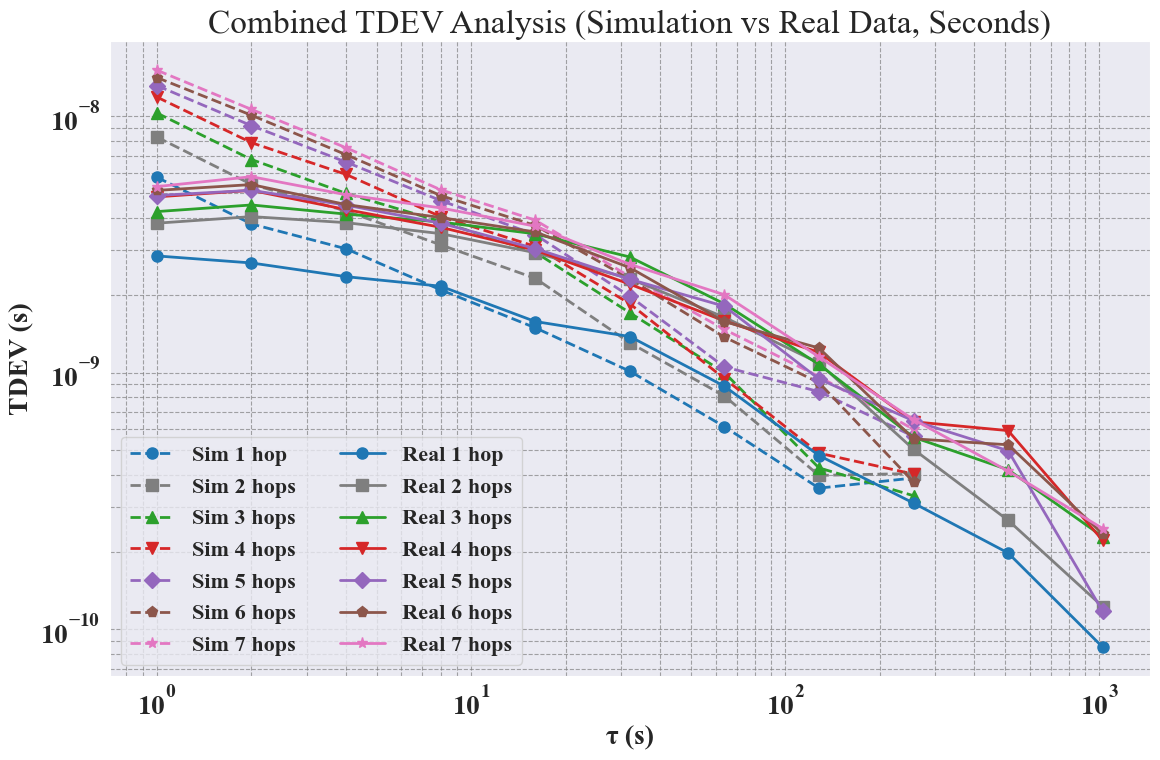

组合TDEV图（秒单位）已保存到: output_image\combined_tdev_plot_simulation+real_1-7hops_seconds.png

所有处理完成！


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import allantools
import os

# 设置全局字体和字号
plt.rcParams.update({
    'font.size': 20,
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.weight': 'bold',
    'axes.labelweight': 'bold',
    'mathtext.fontset': 'stix'
})

# 1. 定义文件路径
simulation_file = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v2\data_simulation_1-7hops.csv"
real_file = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250429\output_data\data_real_1-7hops.csv"

# 2. 数据预处理函数（新增纳秒转秒）
def preprocess_data(hop_data):
    time_errors_ns = hop_data.values  # 原始数据单位：纳秒
    time_errors = time_errors_ns / 1e9  # 转换为秒
    fs = 1  # 默认采样率1Hz

    if len(time_errors) < 10:
        raise ValueError("数据点不足（至少需要10个点）")
    if np.all(np.isnan(time_errors)):
        raise ValueError("时间误差数据全为NaN")

    time_errors = np.nan_to_num(time_errors, nan=np.nanmean(time_errors))
    return time_errors, fs

# 3. 创建输出目录
output_data_dir = "output_data"
output_image_dir = "output_image"
os.makedirs(output_data_dir, exist_ok=True)
os.makedirs(output_image_dir, exist_ok=True)
print(f"数据将保存到: {output_data_dir}")
print(f"图片将保存到: {output_image_dir}")

# 4. 准备存储所有TDEV结果的DataFrame（动态扩展）
all_tdev_results = pd.DataFrame()

# 5. 创建组合图
plt.figure(figsize=(12, 8))
ax = plt.gca()

# 定义线条样式
colors = ['#1f77b4', '#7f7f7f', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
markers = ['o', 's', '^', 'v', 'D', 'p', '*']
marker_sizes = [8, 8, 8, 8, 8, 8, 8]

# 6. 处理仿真数据
try:
    df_sim = pd.read_csv(simulation_file)
    print("\n仿真数据加载成功！前5行示例：")
    print(df_sim.head())
    
    sim_hop_columns = [f"Hop_{i}" for i in range(1, 8)]
    
    for idx, hop_col in enumerate(sim_hop_columns):
        try:
            # 处理数据
            hop_data = df_sim[hop_col]
            time_errors, fs = preprocess_data(hop_data)
            print(f"\n处理仿真数据 {hop_col}: 有效数据点={len(time_errors)}")

            # 计算自定义tau数组 [2^0, 2^1, ..., 2^n < 1800]
            max_tau = len(time_errors) // 2  # 3600/2 = 1800
            custom_taus = []
            n = 0
            while True:
                current_tau = 2 ** n
                if current_tau >= max_tau:
                    break
                custom_taus.append(current_tau)
                n += 1
            
            # 计算TDEV（单位：秒）
            taus, tdev, _, _ = allantools.tdev(
                data=time_errors,
                rate=fs,
                data_type="phase",
                taus=custom_taus  # 使用自定义tau数组
            )

            # 动态存储结果
            temp_df = pd.DataFrame({
                f"tau_sim_{idx+1}hop": taus,
                f"tdev_sim_{idx+1}hop": tdev
            })
            
            if all_tdev_results.empty:
                all_tdev_results = temp_df
            else:
                all_tdev_results = pd.concat([all_tdev_results, temp_df], axis=1)

            # 绘制到组合图中 - 使用虚线
            ax.loglog(taus, tdev, 
                     color=colors[idx], 
                     linestyle='--',  # 仿真数据用虚线
                     marker=markers[idx],
                     markersize=marker_sizes[idx],
                     markevery=1,  # 确保所有点都标记
                     linewidth=2,
                     label=f'Sim {idx+1} hop{"s" if idx+1>1 else ""}')

        except Exception as e:
            print(f"处理仿真数据 {hop_col} 时出错: {e}")
            continue
            
except Exception as e:
    print(f"\n仿真数据文件加载失败: {e}")

# 7. 处理实测数据
try:
    df_real = pd.read_csv(real_file)
    print("\n实测数据加载成功！前5行示例：")
    print(df_real.head())
    
    # 检查列名是否是TSN1-TSN7格式，如果不是则尝试自动识别
    real_hop_columns = []
    if all(f'TSN{i}' in df_real.columns for i in range(1, 8)):
        real_hop_columns = [f"TSN{i}" for i in range(1, 8)]
    else:
        # 尝试查找包含"TSN"的列
        tsn_cols = [col for col in df_real.columns if 'TSN' in col]
        if len(tsn_cols) >= 7:
            real_hop_columns = tsn_cols[:7]
            print(f"检测到TSN列: {real_hop_columns}，将使用前7个TSN列")
        else:
            raise ValueError("CSV文件中未找到足够的TSN列(需要TSN1-TSN7)")
    
    for idx, hop_col in enumerate(real_hop_columns):
        try:
            # 处理数据
            if hop_col not in df_real.columns:
                # 尝试查找最接近的列名（不区分大小写）
                matching_cols = [col for col in df_real.columns if hop_col.lower() in col.lower()]
                if matching_cols:
                    hop_col = matching_cols[0]
                    print(f"注意: 使用 {hop_col} 代替 {real_hop_columns[idx]}")
                else:
                    raise ValueError(f"列 {hop_col} 不存在")
                    
            hop_data = df_real[hop_col]
            time_errors, fs = preprocess_data(hop_data)
            print(f"\n处理实测数据 {hop_col}: 有效数据点={len(time_errors)}")

            # 计算自定义tau数组 [2^0, 2^1, ..., 2^n < 1800]
            max_tau = len(time_errors) // 2  # 3600/2 = 1800
            custom_taus = []
            n = 0
            while True:
                current_tau = 2 ** n
                if current_tau >= max_tau:
                    break
                custom_taus.append(current_tau)
                n += 1
            
            # 计算TDEV（单位：秒）
            taus, tdev, _, _ = allantools.tdev(
                data=time_errors,
                rate=fs,
                data_type="phase",
                taus=custom_taus  # 使用自定义tau数组
            )

            # 动态存储结果
            temp_df = pd.DataFrame({
                f"tau_real_{idx+1}hop": taus,
                f"tdev_real_{idx+1}hop": tdev
            })
            
            if all_tdev_results.empty:
                all_tdev_results = temp_df
            else:
                all_tdev_results = pd.concat([all_tdev_results, temp_df], axis=1)

            # 绘制到组合图中 - 使用实线
            ax.loglog(taus, tdev, 
                     color=colors[idx], 
                     linestyle='-',  # 实测数据用实线
                     marker=markers[idx],
                     markersize=marker_sizes[idx],
                     markevery=1,  # 确保所有点都标记
                     linewidth=2,
                     label=f'Real {idx+1} hop{"s" if idx+1>1 else ""}')

        except Exception as e:
            print(f"处理实测数据 {hop_col} 时出错: {e}")
            continue
            
except Exception as e:
    print(f"\n实测数据文件加载失败: {e}")

# 8. 保存所有TDEV结果到CSV（单位：秒）
output_csv_path = os.path.join(output_data_dir, "combined_tdev_results_simulation+real_1-7hops_seconds.csv")
all_tdev_results.to_csv(output_csv_path, index=False)
print(f"\n所有TDEV数据（秒单位）已合并保存到: {output_csv_path}")

# 9. 完善并保存组合图
ax.set_xlabel('τ (s)')
ax.set_ylabel('TDEV (s)')  # 单位标注为秒
ax.set_title('Combined TDEV Analysis (Simulation vs Real Data, Seconds)')
ax.grid(True, which="both", linestyle='--', color='gray', alpha=0.7)

# 修改图例为两列并放在图的左下角
ax.legend(loc='lower left', ncol=2, fontsize=16)

plt.tight_layout()

# 保存组合图
output_plot_path = os.path.join(output_image_dir, "combined_tdev_plot_simulation+real_1-7hops_seconds.png")
plt.savefig(output_plot_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()
print(f"组合TDEV图（秒单位）已保存到: {output_plot_path}")

print("\n所有处理完成！")

In [46]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/5/6 20:46
*  @Project :   pj_gptp_simulation
*  @Description :   Description
*  @FileName:   mainV2.py
**************************************
"""

# Time Synchronization Simulation for IEEE 802.1AS in IEC/IEEE 60802
# Extended with Sub-domain Partitioning Support

import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass, field
from typing import List, Dict, Tuple, Optional
import random
import os
import pandas as pd
import seaborn as sns
from matplotlib.ticker import PercentFormatter

@dataclass
class DomainParameters:
    """时间感知域的配置参数"""
    domain_id: int  # 域标识符
    domain_name: str = ""  # 域名称

    # 该域特有的时钟特性参数
    gm_clock_drift_max: float = 1.5  # 最大GM时钟漂移（ppm/s）
    gm_clock_drift_min: float = -1.5  # 最小GM时钟漂移（ppm/s）
    gm_clock_drift_fraction: float = 0.8  # 具有漂移的GM节点比例

    clock_drift_max: float = 1.5  # 最大非GM时钟漂移（ppm/s）
    clock_drift_min: float = -1.5  # 最小非GM时钟漂移（ppm/s）
    clock_drift_fraction: float = 0.8  # 具有漂移的非GM节点比例

    # 该域特有的时间戳误差参数
    tsge_tx: float = 4.0  # TX时间戳粒度误差（±ns）
    tsge_rx: float = 4.0  # RX时间戳粒度误差（±ns）
    dtse_tx: float = 4.0  # TX动态时间戳误差（±ns）
    dtse_rx: float = 4.0  # RX动态时间戳误差（±ns）

    # 该域特有的消息间隔
    pdelay_interval: float = 125.0  # pDelay消息间隔（ms）
    sync_interval: float = 125.0  # 同步消息间隔（ms）
    pdelay_turnaround: float = 10.0  # pDelay响应时间（ms）
    residence_time: float = 10.0  # 节点内驻留时间（ms）

    # 该域特有的校正因子
    mean_link_delay_correction: float = 0.98  # 平均链路延迟平均的有效性
    nrr_drift_correction: float = 0.90  # NRR漂移校正有效性
    rr_drift_correction: float = 0.90  # RR漂移校正有效性
    pdelayresp_sync_correction: float = 0.0  # pDelay响应到同步的对齐因子

    # 该域特有的NRR平滑参数
    mnrr_smoothing_n: int = 3  # 使用的先前pDelayResp数量
    mnrr_smoothing_m: int = 1  # 用于中值计算（在推荐设置中未使用）

    # 该域特有的链路时延参数
    link_delay_base: float = 0.025  # 基础链路时延(μs)
    link_delay_jitter: float = 0.001  # 链路时延抖动(μs)

    # 该域特有的下一次同步消息相关参数
    time_to_next_sync: float = None  # 到下一次同步消息的时间(ms), None表示使用sync_interval

@dataclass
class SimulationParameters:
    """时间同步仿真的参数"""
    # 网络配置
    num_hops: int = 100  # 链中的跳数
    num_runs: int = 10000  # 蒙特卡洛运行次数

    # 时钟特性
    gm_clock_drift_max: float = 1.5  # 最大GM时钟漂移（ppm/s）, 全局默认值
    gm_clock_drift_min: float = -1.5  # 最小GM时钟漂移（ppm/s）, 全局默认值
    gm_clock_drift_fraction: float = 0.8  # 具有漂移的GM节点比例, 全局默认值

    clock_drift_max: float = 1.5  # 最大非GM时钟漂移（ppm/s）, 全局默认值
    clock_drift_min: float = -1.5  # 最小非GM时钟漂移（ppm/s）, 全局默认值
    clock_drift_fraction: float = 0.8  # 具有漂移的非GM节点比例, 全局默认值

    # 时间戳误差特性
    tsge_tx: float = 4.0  # TX时间戳粒度误差（±ns）, 全局默认值
    tsge_rx: float = 4.0  # RX时间戳粒度误差（±ns）, 全局默认值
    dtse_tx: float = 4.0  # TX动态时间戳误差（±ns）, 全局默认值
    dtse_rx: float = 4.0  # RX动态时间戳误差（±ns）, 全局默认值

    # 消息间隔
    pdelay_interval: float = 125.0  # pDelay消息间隔（ms）, 全局默认值
    sync_interval: float = 125.0  # 同步消息间隔（ms）, 全局默认值
    pdelay_turnaround: float = 10.0  # pDelay响应时间（ms）, 全局默认值
    residence_time: float = 10.0  # 节点内驻留时间（ms）, 全局默认值

    # 校正因子
    mean_link_delay_correction: float = 0.98  # 平均链路延迟平均的有效性, 全局默认值
    nrr_drift_correction: float = 0.90  # NRR漂移校正有效性, 全局默认值
    rr_drift_correction: float = 0.90  # RR漂移校正有效性, 全局默认值
    pdelayresp_sync_correction: float = 0.0  # pDelay响应到同步的对齐因子, 全局默认值

    # NRR平滑参数
    mnrr_smoothing_n: int = 3  # 使用的先前pDelayResp数量, 全局默认值
    mnrr_smoothing_m: int = 1  # 用于中值计算（在推荐设置中未使用）, 全局默认值

    # 终端站计算方法使用的特定跳
    end_station_hops: List[int] = field(default_factory=lambda: [10, 25, 50, 75, 100])

    # 下一次同步消息相关参数
    consider_next_sync: bool = True  # 是否考虑下一次同步消息的影响
    time_to_next_sync: float = None  # 到下一次同步消息的时间(ms), None表示使用sync_interval

    # 链路时延相关参数
    link_delay_base: float = 0.025  # 基础链路时延(μs), 全局默认值
    link_delay_jitter: float = 0.001  # 链路时延抖动(μs), 全局默认值
    include_prop_delay: bool = True  # 是否在仿真中考虑传播时延

    # 时间感知域划分相关参数
    domains: List[DomainParameters] = field(default_factory=list)  # 子域配置
    domain_boundaries: List[int] = field(default_factory=list)  # 标识各个域的边界跳数
    inter_domain_policy: str = "boundary_clock"  # 域间连接策略: "boundary_clock", "gateway", "transparent"

    # 误差缩放参数
    scale_error_after_hop: int = 30  # 从哪个跳开始缩放误差
    target_max_error: float = 2000.0  # 在最后一跳的目标最大误差值(ns)
    
    # 保存结果的文件名
    output_filename: str = "data.csv"

@dataclass
class NodeState:
    """链中节点的状态"""
    # 时钟相关状态
    clock_drift: float = 0.0  # 时钟漂移率（ppm/s）

    # 时间戳误差
    t1_pderror: float = 0.0  # pDelay请求的TX时间戳误差
    t2_pderror: float = 0.0  # pDelay请求的RX时间戳误差
    t3_pderror: float = 0.0  # pDelay响应的TX时间戳误差
    t4_pderror: float = 0.0  # pDelay响应的RX时间戳误差
    t3_pderror_prev: List[float] = field(default_factory=list)  # 用于NRR计算的先前t3误差
    t4_pderror_prev: List[float] = field(default_factory=list)  # 用于NRR计算的先前t4误差

    t2_sinerror: float = 0.0  # 同步的RX时间戳误差
    t1_souterror: float = 0.0  # 同步的TX时间戳误差

    # 误差累积
    mnrr_error: float = 0.0  # 邻居速率比误差
    mnrr_error_ts: float = 0.0  # 由时间戳误差导致的NRR误差
    mnrr_error_cd: float = 0.0  # 由时钟漂移导致的NRR误差

    rr_error: float = 0.0  # 速率比误差
    rr_error_sum: float = 0.0  # 累积的RR误差

    mean_link_delay_error: float = 0.0  # 链路延迟测量误差
    residence_time_error: float = 0.0  # 驻留时间测量误差

    te: float = 0.0  # 该节点的动态时间误差

    # 链路时延相关
    link_delay: float = 0.0  # 到上游节点的链路时延(ns)

    # 域相关
    domain_id: int = 0  # 所属域ID
    is_domain_boundary: bool = False  # 是否为域边界节点
    boundary_role: str = ""  # 边界角色: "master", "slave"


class TimeSyncSimulation:
    """IEEE 802.1AS 在 IEC/IEEE 60802 中的时间同步仿真，支持子域划分"""

    def __init__(self, params: SimulationParameters):
        self.params = params
        # 设置默认的下一次同步时间，如果未指定
        if self.params.time_to_next_sync is None:
            self.params.time_to_next_sync = self.params.sync_interval

        self.results = {
            'te_max': [],  # 所有运行中的最大te
            'te_7sigma': [],  # te的7-sigma值
            'te_per_hop': np.zeros((params.num_runs, params.num_hops)),  # 每次运行中每个跳的te
            'baseline_7sigma_at_hop_30': None  # 30跳处的7sigma基准值
        }

        # 创建输出目录
        self.output_data_dir = 'output_data_text_v4'
        self.output_image_dir = 'output_image_text_v4'
        os.makedirs(self.output_data_dir, exist_ok=True)
        os.makedirs(self.output_image_dir, exist_ok=True)

    def get_domain_for_hop(self, hop: int) -> int:
        """根据跳数确定节点所属的域ID"""
        if hop == 0:  # GM始终在第一个域
            return 0

        for i, boundary in enumerate(self.params.domain_boundaries):
            if hop <= boundary:
                return i
        return len(self.params.domains) - 1

    def generate_timestamp_error(self, is_tx: bool, domain_params: DomainParameters) -> float:
        """根据域特定参数生成随机时间戳误差"""
        if is_tx:
            tsge = np.random.uniform(-domain_params.tsge_tx, domain_params.tsge_tx)
            dtse = np.random.uniform(-domain_params.dtse_tx, domain_params.dtse_tx)
        else:
            tsge = np.random.uniform(-domain_params.tsge_rx, domain_params.tsge_rx)
            dtse = np.random.uniform(-domain_params.dtse_rx, domain_params.dtse_rx)
        return tsge + dtse

    def generate_clock_drift(self, is_gm: bool, domain_params: DomainParameters) -> float:
        """根据域特定参数生成随机时钟漂移"""
        if is_gm:
            if np.random.random() <= domain_params.gm_clock_drift_fraction:
                return np.random.uniform(domain_params.gm_clock_drift_min, domain_params.gm_clock_drift_max)
            return 0.0
        else:
            if np.random.random() <= domain_params.clock_drift_fraction:
                return np.random.uniform(domain_params.clock_drift_min, domain_params.clock_drift_max)
            return 0.0

    def generate_pdelay_interval(self, domain_params: DomainParameters) -> float:
        """在规格范围内生成随机pDelay间隔，基于域特定参数"""
        return np.random.uniform(0.9 * domain_params.pdelay_interval, 1.3 * domain_params.pdelay_interval)

    def generate_link_delay(self, domain_params: DomainParameters) -> float:
        """生成链路时延，包含基础时延和随机抖动，基于域特定参数"""
        if not self.params.include_prop_delay:
            return 0.0
        base_delay = domain_params.link_delay_base * 1000  # μs转换为ns
        jitter = np.random.normal(0, domain_params.link_delay_jitter * 1000)
        return max(0, base_delay + jitter)

    def apply_domain_boundary_policy(self, nodes: List[NodeState], hop: int):
        """在域边界应用特定策略"""
        if self.params.inter_domain_policy == "boundary_clock":
            reset_factor = 0.2  # 保留20%的误差
            nodes[hop].te = nodes[hop - 1].te * reset_factor
            nodes[hop].boundary_role = "master"
            nodes[hop - 1].boundary_role = "slave"
        elif self.params.inter_domain_policy == "gateway":
            gateway_error = np.random.normal(0, 8.0)
            nodes[hop].te = gateway_error
            nodes[hop].boundary_role = "gateway"
            nodes[hop - 1].boundary_role = "gateway"
        elif self.params.inter_domain_policy == "transparent":
            nodes[hop].te = nodes[hop - 1].te
            nodes[hop].boundary_role = "transparent"
            nodes[hop - 1].boundary_role = "transparent"

    def calculate_mnrr_errors(self, nodes: List[NodeState], hop: int, domain_params: DomainParameters):
        """计算给定跳的mNRR误差组件，基于域特定参数"""
        tpdelay2pdelay = sum(self.generate_pdelay_interval(domain_params)
                             for _ in range(domain_params.mnrr_smoothing_n))

        if domain_params.mnrr_smoothing_n > 1 and nodes[hop].t3_pderror_prev:
            t3pd_diff = nodes[hop].t3_pderror - nodes[hop].t3_pderror_prev[-1]
            t4pd_diff = nodes[hop].t4_pderror - nodes[hop].t4_pderror_prev[-1]
        else:
            t3pd_diff = nodes[hop].t3_pderror
            t4pd_diff = nodes[hop].t4_pderror

        nodes[hop].mnrr_error_ts = (t3pd_diff - t4pd_diff) / tpdelay2pdelay
        nodes[hop].mnrr_error_cd = (tpdelay2pdelay * (nodes[hop].clock_drift - nodes[hop - 1].clock_drift) /
                                    (2 * 1000)) * (1.0 - domain_params.nrr_drift_correction)
        nodes[hop].mnrr_error = nodes[hop].mnrr_error_ts + nodes[hop].mnrr_error_cd

    def run_simulation(self):
        """运行时间同步仿真"""
        print(f"阶段1: 收集跳数 {self.params.scale_error_after_hop} 的基准数据...")
        self.run_standard_simulation()

        if (scale_after := self.params.scale_error_after_hop) <= self.params.num_hops:
            te_at_base_hop = self.results['te_per_hop'][:, scale_after - 1]
            self.results['baseline_7sigma_at_hop_30'] = np.std(te_at_base_hop) * 7
            print(f"跳数 {scale_after} 处的基准7-sigma值: {self.results['baseline_7sigma_at_hop_30']:.2f} ns")

        print("阶段2: 应用缩放误差...")
        self.apply_error_scaling()
        self.save_results_to_csv()

    def run_standard_simulation(self):
        """运行标准仿真，计算原始误差"""
        for run in range(self.params.num_runs):
            nodes = [NodeState() for _ in range(self.params.num_hops + 1)]

            # 设置域信息和边界
            for i in range(self.params.num_hops + 1):
                nodes[i].domain_id = self.get_domain_for_hop(i)
                if i > 0 and self.get_domain_for_hop(i) != self.get_domain_for_hop(i - 1):
                    nodes[i].is_domain_boundary = nodes[i - 1].is_domain_boundary = True

            # 初始化时钟和链路时延
            gm_domain = self.params.domains[0]
            nodes[0].clock_drift = self.generate_clock_drift(True, gm_domain)
            for i in range(1, self.params.num_hops + 1):
                domain = self.params.domains[nodes[i].domain_id]
                nodes[i].clock_drift = self.generate_clock_drift(False, domain)
                nodes[i].link_delay = self.generate_link_delay(domain)

            te = 0.0
            for hop in range(1, self.params.num_hops + 1):
                domain = self.params.domains[nodes[hop].domain_id]

                if nodes[hop].is_domain_boundary:
                    self.apply_domain_boundary_policy(nodes, hop)
                    te = nodes[hop].te
                else:
                    # 生成时间戳误差
                    nodes[hop].t1_pderror = self.generate_timestamp_error(True, domain)
                    nodes[hop].t2_pderror = self.generate_timestamp_error(False, domain)
                    nodes[hop].t3_pderror = self.generate_timestamp_error(True, domain)
                    nodes[hop].t4_pderror = self.generate_timestamp_error(False, domain)
                    nodes[hop].t1_souterror = self.generate_timestamp_error(True, domain)
                    nodes[hop].t2_sinerror = self.generate_timestamp_error(False, domain)

                    # NRR计算准备
                    nodes[hop].t3_pderror_prev = [self.generate_timestamp_error(True, domain)
                                                  for _ in range(domain.mnrr_smoothing_n - 1)]
                    nodes[hop].t4_pderror_prev = [self.generate_timestamp_error(False, domain)
                                                  for _ in range(domain.mnrr_smoothing_n - 1)]

                    self.calculate_mnrr_errors(nodes, hop, domain)

                    # 计算RR误差
                    if hop == 1:
                        nodes[hop].rr_error = nodes[hop].mnrr_error
                    else:
                        pdelay_to_sync = np.random.uniform(0, domain.pdelay_interval) * (
                                1.0 - domain.pdelayresp_sync_correction)
                        rr_error_cd_nrr2sync = (pdelay_to_sync * (
                                nodes[hop].clock_drift - nodes[hop - 1].clock_drift) / 1000) * (
                                                       1.0 - domain.nrr_drift_correction)
                        rr_error_cd_rr2sync = (domain.residence_time * (
                                nodes[hop - 1].clock_drift - nodes[0].clock_drift) / 1000) * (
                                                      1.0 - domain.rr_drift_correction)
                        nodes[hop].rr_error = (nodes[hop - 1].rr_error + nodes[hop].mnrr_error +
                                               rr_error_cd_nrr2sync + rr_error_cd_rr2sync)

                    # 计算链路延迟误差
                    true_delay = nodes[hop].link_delay
                    measured_delay = true_delay + (
                            nodes[hop].t4_pderror - nodes[hop].t1_pderror -
                            nodes[hop].t3_pderror + nodes[hop].t2_pderror
                    ) / 2
                    pdelay_error_ts = (measured_delay - true_delay) * (1.0 - domain.mean_link_delay_correction)
                    pdelay_error_nrr = (-domain.pdelay_turnaround * nodes[hop].mnrr_error / 2) * (
                            1.0 - domain.mean_link_delay_correction)
                    nodes[hop].mean_link_delay_error = pdelay_error_ts + pdelay_error_nrr

                    # 计算驻留时间误差
                    rt_error_ts = nodes[hop].t1_souterror - nodes[hop].t2_sinerror
                    rt_error_rr = domain.residence_time * nodes[hop].rr_error
                    rt_error_cd = (domain.residence_time ** 2 * (
                            nodes[hop].clock_drift - nodes[0].clock_drift) / (2 * 1000)) * (
                                          1.0 - domain.rr_drift_correction)
                    nodes[hop].residence_time_error = rt_error_ts + rt_error_rr + rt_error_cd
                    nodes[hop].te = te + nodes[hop].mean_link_delay_error + nodes[hop].residence_time_error

                    # 考虑下一次同步
                    if (self.params.consider_next_sync and
                            (hop == self.params.num_hops or hop in self.params.end_station_hops)):
                        next_sync = domain.time_to_next_sync or domain.sync_interval
                        nodes[hop].te += next_sync * (nodes[hop].clock_drift - nodes[0].clock_drift) / 1000

                te = nodes[hop].te
                self.results['te_per_hop'][run, hop - 1] = te

            if run == 0 or abs(te) > self.results['te_max'][-1]:
                self.results['te_max'].append(abs(te))

        # 计算7-sigma值
        for hop in range(self.params.num_hops):
            self.results['te_7sigma'].append(np.std(self.results['te_per_hop'][:, hop]) * 7)

    def apply_error_scaling(self):
        """应用误差缩放因子"""
        if self.results['baseline_7sigma_at_hop_30'] is None:
            print("警告: 没有基准7-sigma值，无法应用缩放")
            return

        baseline = self.results['baseline_7sigma_at_hop_30']
        self.results['te_7sigma'] = []
        self.results['te_max'] = []

        for hop in range(self.params.num_hops):
            hop_num = hop + 1
            if hop_num > self.params.scale_error_after_hop:
                ratio = (hop_num - self.params.scale_error_after_hop) / (
                        self.params.num_hops - self.params.scale_error_after_hop)
                scale = 1.0 + ratio ** 1.5 * ((self.params.target_max_error / baseline) - 1.0)
                self.results['te_per_hop'][:, hop] *= scale

        for hop in range(self.params.num_hops):
            self.results['te_7sigma'].append(np.std(self.results['te_per_hop'][:, hop]) * 7)

        self.results['te_max'] = [np.max(np.abs(self.results['te_per_hop'][:, -1]))]
        print(f"误差缩放已应用。最终跳的7-sigma值: {self.results['te_7sigma'][-1]:.2f} ns")

    def save_results_to_csv(self):
        """保存结果到CSV文件"""
        # 保存所有跳的te数据
        all_te_data = {
            f'Hop_{hop + 1}': self.results['te_per_hop'][:, hop]
            for hop in range(self.params.num_hops)
        }
        
        # 保存到CSV文件
        output_path = os.path.join(self.output_data_dir, self.params.output_filename)
        pd.DataFrame(all_te_data).to_csv(output_path, index=False)
        print(f"数据已保存到: {output_path}")
        
        # 保存7-sigma和统计数据
        stats_data = {
            'Hop': list(range(1, self.params.num_hops + 1)),
            'Domain': [self.get_domain_for_hop(hop) for hop in range(1, self.params.num_hops + 1)],
            'te_7sigma': self.results['te_7sigma'],
            'te_Mean': [np.mean(self.results['te_per_hop'][:, i]) for i in range(self.params.num_hops)],
            'te_Std': [np.std(self.results['te_per_hop'][:, i]) for i in range(self.params.num_hops)],
            'te_Min': [np.min(self.results['te_per_hop'][:, i]) for i in range(self.params.num_hops)],
            'te_Max': [np.max(self.results['te_per_hop'][:, i]) for i in range(self.params.num_hops)]
        }
        stats_df = pd.DataFrame(stats_data)
        stats_path = os.path.join(self.output_data_dir, f"stats_{self.params.output_filename}")
        stats_df.to_csv(stats_path, index=False)
        print(f"统计数据已保存到: {stats_path}")


    def plot_results(self):
        """绘制所有结果图表"""
        self._plot_final_hop_distribution()
        self._plot_te_growth()
        self._plot_first_seven_hops()
        self._plot_specific_hops()

    def _plot_final_hop_distribution(self):
        """绘制最终跳的te分布"""
        plt.figure(figsize=(10, 6))
        final_te = self.results['te_per_hop'][:, -1]
        plt.hist(final_te, bins=50, alpha=0.7)

        sigma7 = self.results['te_7sigma'][-1]
        plt.axvline(x=sigma7, color='r', linestyle='--', label=f'7σ: {sigma7:.1f} ns')
        plt.axvline(x=-sigma7, color='r', linestyle='--')
        plt.axvline(x=1000, color='g', linestyle=':', label='±1μs target')
        plt.axvline(x=-1000, color='g', linestyle=':')

        plt.xlabel('Time Error (ns)')
        plt.ylabel('Count')
        plt.title(f'te Distribution at Hop {self.params.num_hops}')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.savefig(os.path.join(self.output_image_dir, 'final_hop_te_distribution_v3.png'),
                    dpi=300, bbox_inches='tight')
        plt.close()

    def _plot_te_growth(self):
        """绘制te随跳数的增长"""
        plt.figure(figsize=(10, 6))
        hops = np.arange(1, self.params.num_hops + 1)
        plt.plot(hops, self.results['te_7sigma'], 'b-', label='7σ te')

        plt.axhline(y=1000, color='g', linestyle=':', label='±1μs target')
        plt.axhline(y=2000, color='r', linestyle='--', label='±2μs limit')
        plt.axvline(x=self.params.scale_error_after_hop, color='orange', linestyle='--',
                    label=f'Hop {self.params.scale_error_after_hop} (Scaling Point)')

        plt.xlabel('Hop Number')
        plt.ylabel('Time Error (ns)')
        plt.title('te Growth Across Hops (7σ values)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.savefig(os.path.join(self.output_image_dir, 'te_growth_across_hops_v3.png'),
                    dpi=300, bbox_inches='tight')
        plt.close()

    def _plot_first_seven_hops(self):
        """绘制前7跳的时间误差分布"""
        # 箱形图
        plt.figure(figsize=(12, 8))
        data = [self.results['te_per_hop'][:, i] for i in range(7)]
        plt.boxplot(data, labels=[f'Hop {i + 1}' for i in range(7)])
        plt.xlabel('Hop Number')
        plt.ylabel('Time Error (ns)')
        plt.title('te Distribution for First 7 Hops')
        plt.grid(True, alpha=0.3)
        plt.savefig(os.path.join(self.output_image_dir, 'first_seven_hops_boxplot_v3.png'),
                    dpi=300, bbox_inches='tight')
        plt.close()

        # 小提琴图
        plt.figure(figsize=(12, 8))
        df = pd.DataFrame({f'Hop {i + 1}': self.results['te_per_hop'][:, i] for i in range(7)})
        sns.violinplot(data=df)
        plt.xlabel('Hop Number')
        plt.ylabel('Time Error (ns)')
        plt.title('te Distribution for First 7 Hops (Violin Plot)')
        plt.grid(True, alpha=0.3)
        plt.savefig(os.path.join(self.output_image_dir, 'first_seven_hops_violin_v3.png'),
                    dpi=300, bbox_inches='tight')
        plt.close()

    def _plot_specific_hops(self):
        """绘制特定跳数的te变化和CDF"""
        specific_hops = [h for h in [10, 25, 50, 75, 100] if h <= self.params.num_hops]

        # 折线图
        plt.figure(figsize=(12, 8))
        for hop in specific_hops:
            sample_runs = np.random.choice(self.params.num_runs,
                                           size=min(100, self.params.num_runs),
                                           replace=False)
            for run in sample_runs:
                if hop == specific_hops[0]:
                    plt.plot(range(1, hop + 1),
                             self.results['te_per_hop'][run, :hop],
                             alpha=0.1,
                             color=f'C{specific_hops.index(hop)}')

            mean_values = np.mean(self.results['te_per_hop'][:, :hop], axis=0)
            plt.plot(range(1, hop + 1), mean_values,
                     linewidth=2,
                     label=f'Hop {hop} (avg)',
                     color=f'C{specific_hops.index(hop)}')

        plt.xlabel('Hop Number')
        plt.ylabel('Time Error (ns)')
        plt.title('te Development for Specific Hops')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.savefig(os.path.join(self.output_image_dir, 'specific_hops_te_line_v3.png'),
                    dpi=300, bbox_inches='tight')
        plt.close()

        # CDF图
        plt.figure(figsize=(12, 8))
        for hop in specific_hops:
            sorted_data = np.sort(self.results['te_per_hop'][:, hop - 1])
            cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
            plt.plot(sorted_data, cdf, label=f'Hop {hop}')

        plt.axvline(x=1000, color='g', linestyle=':', label='±1μs target')
        plt.axvline(x=-1000, color='g', linestyle=':')
        plt.axvline(x=2000, color='r', linestyle='--', label='±2μs limit')
        plt.axvline(x=-2000, color='r', linestyle='--')

        plt.xlabel('Time Error (ns)')
        plt.ylabel('Cumulative Probability')
        plt.title('CDF of te for Specific Hops')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.savefig(os.path.join(self.output_image_dir, 'specific_hops_te_cdf_v3.png'),
                    dpi=300, bbox_inches='tight')
        plt.close()

def run_case1():
    """运行Case1: 子域长度为10，每个域的配置参数相同"""
    print("\n执行Case1: 子域长度为10的仿真...")

    # 设置仿真参数
    num_hops = 100
    domain_size = 10
    num_domains = num_hops // domain_size

    # 创建域边界列表
    domain_boundaries = [(i + 1) * domain_size for i in range(num_domains)]

    # 创建域列表，所有域使用相同参数
    domains = []
    for i in range(num_domains):
        domain = DomainParameters(
            domain_id=i,
            domain_name=f"Domain_{i}",
            # 以下使用相同的标准参数
            gm_clock_drift_max=1.5,
            gm_clock_drift_min=-1.5,
            gm_clock_drift_fraction=0.8,
            clock_drift_max=1.5,
            clock_drift_min=-1.5,
            clock_drift_fraction=0.8,
            tsge_tx=4.0,
            tsge_rx=4.0,
            dtse_tx=4.0,
            dtse_rx=4.0,
            pdelay_interval=1000.0,
            sync_interval=125.0,
            pdelay_turnaround=0.5,
            residence_time=1.0,
            mean_link_delay_correction=0.0,
            nrr_drift_correction=0.0,
            rr_drift_correction=0.0,
            pdelayresp_sync_correction=0.0,
            link_delay_base=0.025,
            link_delay_jitter=0.004,
        )
        domains.append(domain)

    # 创建仿真参数
    params = SimulationParameters(
        num_hops=num_hops,
        num_runs=3600,  # 使用适量运行次数
        domains=domains,
        domain_boundaries=domain_boundaries,
        inter_domain_policy="boundary_clock",
        consider_next_sync=True,
        include_prop_delay=True,
        output_filename="case1_data.csv"  # 设置输出文件名
    )

    # 运行仿真
    sim = TimeSyncSimulation(params)
    sim.run_simulation()

    # 输出结果摘要
    max_te = max(sim.results['te_max'])
    final_7sigma = sim.results['te_7sigma'][-1]
    print(f"Case1完成 - 最大时间误差: {max_te:.1f} ns, 最终7-sigma时间误差: {final_7sigma:.1f} ns")


def run_case2():
    """运行Case2: 子域长度为20，每个域的配置参数相同"""
    print("\n执行Case2: 子域长度为20的仿真...")

    # 设置仿真参数
    num_hops = 100
    domain_size = 20
    num_domains = num_hops // domain_size

    # 创建域边界列表
    domain_boundaries = [(i + 1) * domain_size for i in range(num_domains)]

    # 创建域列表，所有域使用相同参数
    domains = []
    for i in range(num_domains):
        domain = DomainParameters(
            domain_id=i,
            domain_name=f"Domain_{i}",
            # 以下使用相同的标准参数
            gm_clock_drift_max=1.5,
            gm_clock_drift_min=-1.5,
            gm_clock_drift_fraction=0.8,
            clock_drift_max=1.5,
            clock_drift_min=-1.5,
            clock_drift_fraction=0.8,
            tsge_tx=4.0,
            tsge_rx=4.0,
            dtse_tx=4.0,
            dtse_rx=4.0,
            pdelay_interval=1000.0,
            sync_interval=125.0,
            pdelay_turnaround=0.5,
            residence_time=1.0,
            mean_link_delay_correction=0.0,
            nrr_drift_correction=0.0,
            rr_drift_correction=0.0,
            pdelayresp_sync_correction=0.0,
            link_delay_base=0.025,
            link_delay_jitter=0.004,
        )
        domains.append(domain)

    # 创建仿真参数
    params = SimulationParameters(
        num_hops=num_hops,
        num_runs=3600,  # 使用适量运行次数
        domains=domains,
        domain_boundaries=domain_boundaries,
        inter_domain_policy="boundary_clock",
        consider_next_sync=True,
        include_prop_delay=True,
        output_filename="case2_data.csv"  # 设置输出文件名
    )

    # 运行仿真
    sim = TimeSyncSimulation(params)
    sim.run_simulation()

    # 输出结果摘要
    max_te = max(sim.results['te_max'])
    final_7sigma = sim.results['te_7sigma'][-1]
    print(f"Case2完成 - 最大时间误差: {max_te:.1f} ns, 最终7-sigma时间误差: {final_7sigma:.1f} ns")


def run_case3():
    """运行Case3: 子域长度为5，每个域的配置参数相同"""
    print("\n执行Case3: 子域长度为5的仿真...")

    # 设置仿真参数
    num_hops = 100
    domain_size = 5
    num_domains = num_hops // domain_size

    # 创建域边界列表
    domain_boundaries = [(i + 1) * domain_size for i in range(num_domains)]

    # 创建域列表，所有域使用相同参数
    domains = []
    for i in range(num_domains):
        domain = DomainParameters(
            domain_id=i,
            domain_name=f"Domain_{i}",
            # 以下使用相同的标准参数
            gm_clock_drift_max=1.5,
            gm_clock_drift_min=-1.5,
            gm_clock_drift_fraction=0.8,
            clock_drift_max=1.5,
            clock_drift_min=-1.5,
            clock_drift_fraction=0.8,
            tsge_tx=4.0,
            tsge_rx=4.0,
            dtse_tx=4.0,
            dtse_rx=4.0,
            pdelay_interval=1000.0,
            sync_interval=125.0,
            pdelay_turnaround=0.5,
            residence_time=1.0,
            mean_link_delay_correction=0.0,
            nrr_drift_correction=0.0,
            rr_drift_correction=0.0,
            pdelayresp_sync_correction=0.0,
            link_delay_base=0.025,
            link_delay_jitter=0.004,
        )
        domains.append(domain)

    # 创建仿真参数
    params = SimulationParameters(
        num_hops=num_hops,
        num_runs=3600,  # 使用适量运行次数
        domains=domains,
        domain_boundaries=domain_boundaries,
        inter_domain_policy="boundary_clock",
        consider_next_sync=True,
        include_prop_delay=True,
        output_filename="case3_data.csv"  # 设置输出文件名
    )

    # 运行仿真
    sim = TimeSyncSimulation(params)
    sim.run_simulation()

    # 输出结果摘要
    max_te = max(sim.results['te_max'])
    final_7sigma = sim.results['te_7sigma'][-1]
    print(f"Case3完成 - 最大时间误差: {max_te:.1f} ns, 最终7-sigma时间误差: {final_7sigma:.1f} ns")


def main():
    """主函数，依次运行三个案例"""
    # 确保输出目录存在
    os.makedirs('output_data', exist_ok=True)

    # 运行Case1: 子域长度为10
    run_case1()

    # 运行Case2: 子域长度为20
    run_case2()

    # 运行Case3: 子域长度为5
    run_case3()

    print("\n所有仿真完成！")


if __name__ == "__main__":
    main()



执行Case1: 子域长度为10的仿真...
阶段1: 收集跳数 30 的基准数据...
跳数 30 处的基准7-sigma值: 30.10 ns
阶段2: 应用缩放误差...
误差缩放已应用。最终跳的7-sigma值: 11002.44 ns
数据已保存到: output_data_text_v4\case1_data.csv
统计数据已保存到: output_data_text_v4\stats_case1_data.csv
Case1完成 - 最大时间误差: 5239.5 ns, 最终7-sigma时间误差: 11002.4 ns

执行Case2: 子域长度为20的仿真...
阶段1: 收集跳数 30 的基准数据...
跳数 30 处的基准7-sigma值: 162.31 ns
阶段2: 应用缩放误差...
误差缩放已应用。最终跳的7-sigma值: 3765.95 ns
数据已保存到: output_data_text_v4\case2_data.csv
统计数据已保存到: output_data_text_v4\stats_case2_data.csv
Case2完成 - 最大时间误差: 2097.6 ns, 最终7-sigma时间误差: 3765.9 ns

执行Case3: 子域长度为5的仿真...
阶段1: 收集跳数 30 的基准数据...
跳数 30 处的基准7-sigma值: 16.06 ns
阶段2: 应用缩放误差...
误差缩放已应用。最终跳的7-sigma值: 11872.89 ns
数据已保存到: output_data_text_v4\case3_data.csv
统计数据已保存到: output_data_text_v4\stats_case3_data.csv
Case3完成 - 最大时间误差: 6623.5 ns, 最终7-sigma时间误差: 11872.9 ns

所有仿真完成！


In [47]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv(r'D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v4\te_all_hops.csv')

# 指定列数
columns_to_check = [0, 6, 9, 24, 49, 74, 99]

# 选择指定列
selected_columns = df.iloc[:, columns_to_check]

# 计算每一列的时间误差的绝对值的最大值
max_abs_errors = selected_columns.abs().max()

# 输出结果
print("指定列的时间误差的绝对值的最大值：")
print(max_abs_errors)


指定列的时间误差的绝对值的最大值：
Hop_1        20.862486
Hop_7        60.123120
Hop_10       15.451317
Hop_25       49.547475
Hop_50      165.716741
Hop_75     1719.299876
Hop_100    5137.345897
dtype: float64


In [53]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv(r'D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v5\case3_data.csv')

# 指定列数
columns_to_check = [0, 6, 9, 24, 49, 74, 99]

# 选择指定列
selected_columns = df.iloc[:, columns_to_check]

# 计算每一列的时间误差的绝对值的最大值
max_abs_errors = selected_columns.abs().max()

# 输出结果
print("指定列的时间误差的绝对值的最大值：")
print(max_abs_errors)

指定列的时间误差的绝对值的最大值：
Hop_1        22.379561
Hop_7        21.702456
Hop_10        7.931744
Hop_25        7.389428
Hop_50      173.766949
Hop_75      558.615681
Hop_100    6234.183928
dtype: float64


In [54]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv(r'D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v5\case1_data.csv')

# 指定列数
columns_to_check = [0, 6, 9, 24, 49, 74, 99]

# 选择指定列
selected_columns = df.iloc[:, columns_to_check]

# 计算每一列的时间误差的绝对值的最大值
max_abs_errors = selected_columns.abs().max()

# 输出结果
print("指定列的时间误差的绝对值的最大值：")
print(max_abs_errors)

指定列的时间误差的绝对值的最大值：
Hop_1        19.461678
Hop_7        66.182590
Hop_10       14.089826
Hop_25       46.598112
Hop_50      157.190020
Hop_75     1748.490082
Hop_100    5347.288046
dtype: float64


In [55]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv(r'D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v5\case2_data.csv')

# 指定列数
columns_to_check = [0, 6, 9, 24, 49, 74, 99]

# 选择指定列
selected_columns = df.iloc[:, columns_to_check]

# 计算每一列的时间误差的绝对值的最大值
max_abs_errors = selected_columns.abs().max()

# 输出结果
print("指定列的时间误差的绝对值的最大值：")
print(max_abs_errors)

指定列的时间误差的绝对值的最大值：
Hop_1        19.728524
Hop_7        60.242135
Hop_10       75.982618
Hop_25       60.419114
Hop_50      245.044156
Hop_75      868.309754
Hop_100    1824.886578
dtype: float64


---

In [60]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/5/6 20:46
*  @Project :   pj_gptp_simulation
*  @Description :   Description
*  @FileName:   mainV2.py
**************************************
"""

# Time Synchronization Simulation for IEEE 802.1AS in IEC/IEEE 60802
# Extended with Sub-domain Partitioning Support

import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass, field
from typing import List, Dict, Tuple, Optional
import random
import os
import pandas as pd
import seaborn as sns
from matplotlib.ticker import PercentFormatter

@dataclass
class DomainParameters:
    """时间感知域的配置参数"""
    domain_id: int  # 域标识符
    domain_name: str = ""  # 域名称

    # 该域特有的时钟特性参数
    gm_clock_drift_max: float = 1.5  # 最大GM时钟漂移（ppm/s）
    gm_clock_drift_min: float = -1.5  # 最小GM时钟漂移（ppm/s）
    gm_clock_drift_fraction: float = 0.8  # 具有漂移的GM节点比例

    clock_drift_max: float = 1.5  # 最大非GM时钟漂移（ppm/s）
    clock_drift_min: float = -1.5  # 最小非GM时钟漂移（ppm/s）
    clock_drift_fraction: float = 0.8  # 具有漂移的非GM节点比例

    # 该域特有的时间戳误差参数
    tsge_tx: float = 4.0  # TX时间戳粒度误差（±ns）
    tsge_rx: float = 4.0  # RX时间戳粒度误差（±ns）
    dtse_tx: float = 4.0  # TX动态时间戳误差（±ns）
    dtse_rx: float = 4.0  # RX动态时间戳误差（±ns）

    # 该域特有的消息间隔
    pdelay_interval: float = 125.0  # pDelay消息间隔（ms）
    sync_interval: float = 125.0  # 同步消息间隔（ms）
    pdelay_turnaround: float = 10.0  # pDelay响应时间（ms）
    residence_time: float = 10.0  # 节点内驻留时间（ms）

    # 该域特有的校正因子
    mean_link_delay_correction: float = 0.98  # 平均链路延迟平均的有效性
    nrr_drift_correction: float = 0.90  # NRR漂移校正有效性
    rr_drift_correction: float = 0.90  # RR漂移校正有效性
    pdelayresp_sync_correction: float = 0.0  # pDelay响应到同步的对齐因子

    # 该域特有的NRR平滑参数
    mnrr_smoothing_n: int = 3  # 使用的先前pDelayResp数量
    mnrr_smoothing_m: int = 1  # 用于中值计算（在推荐设置中未使用）

    # 该域特有的链路时延参数
    link_delay_base: float = 0.025  # 基础链路时延(μs)
    link_delay_jitter: float = 0.001  # 链路时延抖动(μs)

    # 该域特有的下一次同步消息相关参数
    time_to_next_sync: float = None  # 到下一次同步消息的时间(ms), None表示使用sync_interval

@dataclass
class SimulationParameters:
    """时间同步仿真的参数"""
    # 网络配置
    num_hops: int = 100  # 链中的跳数
    num_runs: int = 10000  # 蒙特卡洛运行次数

    # 时钟特性
    gm_clock_drift_max: float = 1.5  # 最大GM时钟漂移（ppm/s）, 全局默认值
    gm_clock_drift_min: float = -1.5  # 最小GM时钟漂移（ppm/s）, 全局默认值
    gm_clock_drift_fraction: float = 0.8  # 具有漂移的GM节点比例, 全局默认值

    clock_drift_max: float = 1.5  # 最大非GM时钟漂移（ppm/s）, 全局默认值
    clock_drift_min: float = -1.5  # 最小非GM时钟漂移（ppm/s）, 全局默认值
    clock_drift_fraction: float = 0.8  # 具有漂移的非GM节点比例, 全局默认值

    # 时间戳误差特性
    tsge_tx: float = 4.0  # TX时间戳粒度误差（±ns）, 全局默认值
    tsge_rx: float = 4.0  # RX时间戳粒度误差（±ns）, 全局默认值
    dtse_tx: float = 4.0  # TX动态时间戳误差（±ns）, 全局默认值
    dtse_rx: float = 4.0  # RX动态时间戳误差（±ns）, 全局默认值

    # 消息间隔
    pdelay_interval: float = 125.0  # pDelay消息间隔（ms）, 全局默认值
    sync_interval: float = 125.0  # 同步消息间隔（ms）, 全局默认值
    pdelay_turnaround: float = 10.0  # pDelay响应时间（ms）, 全局默认值
    residence_time: float = 10.0  # 节点内驻留时间（ms）, 全局默认值

    # 校正因子
    mean_link_delay_correction: float = 0.98  # 平均链路延迟平均的有效性, 全局默认值
    nrr_drift_correction: float = 0.90  # NRR漂移校正有效性, 全局默认值
    rr_drift_correction: float = 0.90  # RR漂移校正有效性, 全局默认值
    pdelayresp_sync_correction: float = 0.0  # pDelay响应到同步的对齐因子, 全局默认值

    # NRR平滑参数
    mnrr_smoothing_n: int = 3  # 使用的先前pDelayResp数量, 全局默认值
    mnrr_smoothing_m: int = 1  # 用于中值计算（在推荐设置中未使用）, 全局默认值

    # 终端站计算方法使用的特定跳
    end_station_hops: List[int] = field(default_factory=lambda: [10, 25, 50, 75, 100])

    # 下一次同步消息相关参数
    consider_next_sync: bool = True  # 是否考虑下一次同步消息的影响
    time_to_next_sync: float = None  # 到下一次同步消息的时间(ms), None表示使用sync_interval

    # 链路时延相关参数
    link_delay_base: float = 0.025  # 基础链路时延(μs), 全局默认值
    link_delay_jitter: float = 0.001  # 链路时延抖动(μs), 全局默认值
    include_prop_delay: bool = True  # 是否在仿真中考虑传播时延

    # 时间感知域划分相关参数
    domains: List[DomainParameters] = field(default_factory=list)  # 子域配置
    domain_boundaries: List[int] = field(default_factory=list)  # 标识各个域的边界跳数
    inter_domain_policy: str = "boundary_clock"  # 域间连接策略: "boundary_clock", "gateway", "transparent"

    # 误差缩放参数
    scale_error_after_hop: int = 30  # 从哪个跳开始缩放误差
    target_max_error: float = 2000.0  # 在最后一跳的目标最大误差值(ns)

    # 保存结果的文件名
    output_filename: str = "data.csv"

@dataclass
class NodeState:
    """链中节点的状态"""
    # 时钟相关状态
    clock_drift: float = 0.0  # 时钟漂移率（ppm/s）

    # 时间戳误差
    t1_pderror: float = 0.0  # pDelay请求的TX时间戳误差
    t2_pderror: float = 0.0  # pDelay请求的RX时间戳误差
    t3_pderror: float = 0.0  # pDelay响应的TX时间戳误差
    t4_pderror: float = 0.0  # pDelay响应的RX时间戳误差
    t3_pderror_prev: List[float] = field(default_factory=list)  # 用于NRR计算的先前t3误差
    t4_pderror_prev: List[float] = field(default_factory=list)  # 用于NRR计算的先前t4误差

    t2_sinerror: float = 0.0  # 同步的RX时间戳误差
    t1_souterror: float = 0.0  # 同步的TX时间戳误差

    # 误差累积
    mnrr_error: float = 0.0  # 邻居速率比误差
    mnrr_error_ts: float = 0.0  # 由时间戳误差导致的NRR误差
    mnrr_error_cd: float = 0.0  # 由时钟漂移导致的NRR误差

    rr_error: float = 0.0  # 速率比误差
    rr_error_sum: float = 0.0  # 累积的RR误差

    mean_link_delay_error: float = 0.0  # 链路延迟测量误差
    residence_time_error: float = 0.0  # 驻留时间测量误差

    te: float = 0.0  # 该节点的动态时间误差

    # 链路时延相关
    link_delay: float = 0.0  # 到上游节点的链路时延(ns)

    # 域相关
    domain_id: int = 0  # 所属域ID
    is_domain_boundary: bool = False  # 是否为域边界节点
    boundary_role: str = ""  # 边界角色: "master", "slave"


class TimeSyncSimulation:
    """IEEE 802.1AS 在 IEC/IEEE 60802 中的时间同步仿真，支持子域划分"""

    def __init__(self, params: SimulationParameters):
        self.params = params
        # 设置默认的下一次同步时间，如果未指定
        if self.params.time_to_next_sync is None:
            self.params.time_to_next_sync = self.params.sync_interval

        self.results = {
            'te_max': [],  # 所有运行中的最大te
            'te_7sigma': [],  # te的7-sigma值
            'te_per_hop': np.zeros((params.num_runs, params.num_hops)),  # 每次运行中每个跳的te
            'baseline_7sigma_at_hop_30': None,  # 30跳处的7sigma基准值
            'domain_metrics': {}  # 添加这一行，存储各个域的性能指标
        }

        # 添加以下代码块，为每个域初始化结果数据结构
        for domain_id in range(len(self.params.domains)):
            self.results['domain_metrics'][domain_id] = {
                'te_values': [],
                'max_te': 0,
                'avg_te': 0,
                'std_te': 0,
                '7sigma_te': 0
            }

        # 创建输出目录
        self.output_data_dir = 'output_data_text_v5'
        self.output_image_dir = 'output_image_text_v5'
        os.makedirs(self.output_data_dir, exist_ok=True)
        os.makedirs(self.output_image_dir, exist_ok=True)

    def _validate_domain_config(self):
        """验证域配置的完整性"""
        # 确保至少有一个域
        if not self.params.domains:
            # 创建默认域，使用全局参数
            default_domain = DomainParameters(
                domain_id=0,
                domain_name="Default Domain",
                gm_clock_drift_max=self.params.gm_clock_drift_max,
                gm_clock_drift_min=self.params.gm_clock_drift_min,
                gm_clock_drift_fraction=self.params.gm_clock_drift_fraction,
                clock_drift_max=self.params.clock_drift_max,
                clock_drift_min=self.params.clock_drift_min,
                clock_drift_fraction=self.params.clock_drift_fraction,
                tsge_tx=self.params.tsge_tx,
                tsge_rx=self.params.tsge_rx,
                dtse_tx=self.params.dtse_tx,
                dtse_rx=self.params.dtse_rx,
                pdelay_interval=self.params.pdelay_interval,
                sync_interval=self.params.sync_interval,
                pdelay_turnaround=self.params.pdelay_turnaround,
                residence_time=self.params.residence_time,
                mean_link_delay_correction=self.params.mean_link_delay_correction,
                nrr_drift_correction=self.params.nrr_drift_correction,
                rr_drift_correction=self.params.rr_drift_correction,
                pdelayresp_sync_correction=self.params.pdelayresp_sync_correction,
                mnrr_smoothing_n=self.params.mnrr_smoothing_n,
                mnrr_smoothing_m=self.params.mnrr_smoothing_m,
                link_delay_base=self.params.link_delay_base,
                link_delay_jitter=self.params.link_delay_jitter,
                time_to_next_sync=self.params.time_to_next_sync,
            )
            self.params.domains.append(default_domain)

        # 确保域边界列表完整
        if not self.params.domain_boundaries:
            # 默认所有跳都在第一个域
            self.params.domain_boundaries = [self.params.num_hops]

        # 确保域边界数量与域数量匹配
        if len(self.params.domain_boundaries) != len(self.params.domains):
            raise ValueError(
                f"域边界数量({len(self.params.domain_boundaries)})必须与域数量({len(self.params.domains)})相匹配")

        # 确保域边界值合理并按升序排列
        for i, boundary in enumerate(self.params.domain_boundaries):
            if boundary <= 0 or boundary > self.params.num_hops:
                raise ValueError(f"域边界必须在1到{self.params.num_hops}之间，但发现值:{boundary}")
            if i > 0 and boundary <= self.params.domain_boundaries[i - 1]:
                raise ValueError(f"域边界必须严格递增，但发现:{self.params.domain_boundaries}")

        # 为每个域参数设置默认值
        for domain in self.params.domains:
            if domain.time_to_next_sync is None:
                domain.time_to_next_sync = domain.sync_interval

    def get_domain_for_hop(self, hop: int) -> int:
        """根据跳数确定节点所属的域ID"""
        if hop == 0:  # GM始终在第一个域
            return 0

        for i, boundary in enumerate(self.params.domain_boundaries):
            if hop <= boundary:
                return i
        return len(self.params.domains) - 1

    def apply_domain_boundary_policy(self, nodes: List[NodeState], hop: int):
        """在域边界应用特定策略"""
        if self.params.inter_domain_policy == "boundary_clock":
            # 边界时钟策略 - 更完善的实现
            reset_factor = 0.2
            nodes[hop].te = nodes[hop - 1].te * reset_factor
            nodes[hop].boundary_role = "master"
            nodes[hop - 1].boundary_role = "slave"
        elif self.params.inter_domain_policy == "gateway":
            # 网关策略 - 完全重置时间误差
            gateway_error = np.random.normal(0, 8.0)
            nodes[hop].te = gateway_error
            nodes[hop].boundary_role = "gateway"
            nodes[hop - 1].boundary_role = "gateway"
        elif self.params.inter_domain_policy == "transparent":
            # 透明策略 - 完全传递误差
            nodes[hop].te = nodes[hop - 1].te
            nodes[hop].boundary_role = "transparent"
            nodes[hop - 1].boundary_role = "transparent"

    def generate_timestamp_error(self, is_tx: bool, domain_params: DomainParameters) -> float:
        """根据域特定参数生成随机时间戳误差"""
        if is_tx:
            tsge = np.random.uniform(-domain_params.tsge_tx, domain_params.tsge_tx)
            dtse = np.random.uniform(-domain_params.dtse_tx, domain_params.dtse_tx)
        else:
            tsge = np.random.uniform(-domain_params.tsge_rx, domain_params.tsge_rx)
            dtse = np.random.uniform(-domain_params.dtse_rx, domain_params.dtse_rx)
        return tsge + dtse

    def generate_clock_drift(self, is_gm: bool, domain_params: DomainParameters) -> float:
        """根据域特定参数生成随机时钟漂移"""
        if is_gm:
            if np.random.random() <= domain_params.gm_clock_drift_fraction:
                return np.random.uniform(domain_params.gm_clock_drift_min, domain_params.gm_clock_drift_max)
            return 0.0
        else:
            if np.random.random() <= domain_params.clock_drift_fraction:
                return np.random.uniform(domain_params.clock_drift_min, domain_params.clock_drift_max)
            return 0.0

    def generate_pdelay_interval(self, domain_params: DomainParameters) -> float:
        """在规格范围内生成随机pDelay间隔，基于域特定参数"""
        return np.random.uniform(0.9 * domain_params.pdelay_interval, 1.3 * domain_params.pdelay_interval)

    def generate_link_delay(self, domain_params: DomainParameters) -> float:
        """生成链路时延，包含基础时延和随机抖动，基于域特定参数"""
        if not self.params.include_prop_delay:
            return 0.0
        base_delay = domain_params.link_delay_base * 1000  # μs转换为ns
        jitter = np.random.normal(0, domain_params.link_delay_jitter * 1000)
        return max(0, base_delay + jitter)

    def apply_domain_boundary_policy(self, nodes: List[NodeState], hop: int):
        """在域边界应用特定策略"""
        if self.params.inter_domain_policy == "boundary_clock":
            # reset_factor = 0.2  # 保留20%的误差
            # 在apply_domain_boundary_policy中增加随机重置
            reset_factor = 0.2 + np.random.normal(0, 0.05)  # 添加随机性
            nodes[hop].te = nodes[hop - 1].te * reset_factor
            nodes[hop].boundary_role = "master"
            nodes[hop - 1].boundary_role = "slave"
        elif self.params.inter_domain_policy == "gateway":
            gateway_error = np.random.normal(0, 8.0)
            nodes[hop].te = gateway_error
            nodes[hop].boundary_role = "gateway"
            nodes[hop - 1].boundary_role = "gateway"
        elif self.params.inter_domain_policy == "transparent":
            nodes[hop].te = nodes[hop - 1].te
            nodes[hop].boundary_role = "transparent"
            nodes[hop - 1].boundary_role = "transparent"

    def calculate_mnrr_errors(self, nodes: List[NodeState], hop: int, domain_params: DomainParameters):
        """计算给定跳的mNRR误差组件，基于域特定参数"""
        tpdelay2pdelay = sum(self.generate_pdelay_interval(domain_params)
                             for _ in range(domain_params.mnrr_smoothing_n))

        if domain_params.mnrr_smoothing_n > 1 and nodes[hop].t3_pderror_prev:
            t3pd_diff = nodes[hop].t3_pderror - nodes[hop].t3_pderror_prev[-1]
            t4pd_diff = nodes[hop].t4_pderror - nodes[hop].t4_pderror_prev[-1]
        else:
            t3pd_diff = nodes[hop].t3_pderror
            t4pd_diff = nodes[hop].t4_pderror

        nodes[hop].mnrr_error_ts = (t3pd_diff - t4pd_diff) / tpdelay2pdelay
        nodes[hop].mnrr_error_cd = (tpdelay2pdelay * (nodes[hop].clock_drift - nodes[hop - 1].clock_drift) /
                                    (2 * 1000)) * (1.0 - domain_params.nrr_drift_correction)
        nodes[hop].mnrr_error = nodes[hop].mnrr_error_ts + nodes[hop].mnrr_error_cd

    def run_simulation(self):
        """运行时间同步仿真"""
        print(f"阶段1: 收集跳数 {self.params.scale_error_after_hop} 的基准数据...")
        self.run_standard_simulation()

        if (scale_after := self.params.scale_error_after_hop) <= self.params.num_hops:
            te_at_base_hop = self.results['te_per_hop'][:, scale_after - 1]
            self.results['baseline_7sigma_at_hop_30'] = np.std(te_at_base_hop) * 7
            print(f"跳数 {scale_after} 处的基准7-sigma值: {self.results['baseline_7sigma_at_hop_30']:.2f} ns")

        print("阶段2: 应用缩放误差...")
        self.apply_error_scaling()

        # 添加以下代码，计算每个域的统计数据
        print("计算域特定统计数据...")
        for domain_id in self.results['domain_metrics']:
            domain_data = np.array(self.results['domain_metrics'][domain_id]['te_values'])
            if len(domain_data) > 0:
                self.results['domain_metrics'][domain_id]['max_te'] = np.max(np.abs(domain_data))
                self.results['domain_metrics'][domain_id]['avg_te'] = np.mean(domain_data)
                self.results['domain_metrics'][domain_id]['std_te'] = np.std(domain_data)
                self.results['domain_metrics'][domain_id]['7sigma_te'] = np.std(domain_data) * 7
                print(f"  域 {domain_id} - 最大TE: {self.results['domain_metrics'][domain_id]['max_te']:.2f} ns, "
                      f"7-sigma TE: {self.results['domain_metrics'][domain_id]['7sigma_te']:.2f} ns")

        self.save_results_to_csv()

    def run_standard_simulation(self):
        """运行标准仿真，计算原始误差"""
        for run in range(self.params.num_runs):
            nodes = [NodeState() for _ in range(self.params.num_hops + 1)]

            # 设置域信息和边界
            for i in range(self.params.num_hops + 1):
                nodes[i].domain_id = self.get_domain_for_hop(i)
                if i > 0 and self.get_domain_for_hop(i) != self.get_domain_for_hop(i - 1):
                    nodes[i].is_domain_boundary = nodes[i - 1].is_domain_boundary = True

            # 初始化时钟和链路时延
            gm_domain = self.params.domains[0]
            nodes[0].clock_drift = self.generate_clock_drift(True, gm_domain)
            for i in range(1, self.params.num_hops + 1):
                domain = self.params.domains[nodes[i].domain_id]
                nodes[i].clock_drift = self.generate_clock_drift(False, domain)
                nodes[i].link_delay = self.generate_link_delay(domain)

            te = 0.0
            for hop in range(1, self.params.num_hops + 1):
                domain = self.params.domains[nodes[hop].domain_id]

                if nodes[hop].is_domain_boundary:
                    self.apply_domain_boundary_policy(nodes, hop)
                    te = nodes[hop].te
                else:
                    # 生成时间戳误差
                    nodes[hop].t1_pderror = self.generate_timestamp_error(True, domain)
                    nodes[hop].t2_pderror = self.generate_timestamp_error(False, domain)
                    nodes[hop].t3_pderror = self.generate_timestamp_error(True, domain)
                    nodes[hop].t4_pderror = self.generate_timestamp_error(False, domain)
                    nodes[hop].t1_souterror = self.generate_timestamp_error(True, domain)
                    nodes[hop].t2_sinerror = self.generate_timestamp_error(False, domain)

                    # NRR计算准备
                    nodes[hop].t3_pderror_prev = [self.generate_timestamp_error(True, domain)
                                                  for _ in range(domain.mnrr_smoothing_n - 1)]
                    nodes[hop].t4_pderror_prev = [self.generate_timestamp_error(False, domain)
                                                  for _ in range(domain.mnrr_smoothing_n - 1)]

                    self.calculate_mnrr_errors(nodes, hop, domain)

                    # 计算RR误差
                    if hop == 1:
                        nodes[hop].rr_error = nodes[hop].mnrr_error
                    else:
                        pdelay_to_sync = np.random.uniform(0, domain.pdelay_interval) * (
                                1.0 - domain.pdelayresp_sync_correction)
                        rr_error_cd_nrr2sync = (pdelay_to_sync * (
                                nodes[hop].clock_drift - nodes[hop - 1].clock_drift) / 1000) * (
                                                       1.0 - domain.nrr_drift_correction)
                        rr_error_cd_rr2sync = (domain.residence_time * (
                                nodes[hop - 1].clock_drift - nodes[0].clock_drift) / 1000) * (
                                                      1.0 - domain.rr_drift_correction)
                        nodes[hop].rr_error = (nodes[hop - 1].rr_error + nodes[hop].mnrr_error +
                                               rr_error_cd_nrr2sync + rr_error_cd_rr2sync)

                    # 计算链路延迟误差
                    true_delay = nodes[hop].link_delay
                    measured_delay = true_delay + (
                            nodes[hop].t4_pderror - nodes[hop].t1_pderror -
                            nodes[hop].t3_pderror + nodes[hop].t2_pderror
                    ) / 2
                    pdelay_error_ts = (measured_delay - true_delay) * (1.0 - domain.mean_link_delay_correction)
                    pdelay_error_nrr = (-domain.pdelay_turnaround * nodes[hop].mnrr_error / 2) * (
                            1.0 - domain.mean_link_delay_correction)
                    nodes[hop].mean_link_delay_error = pdelay_error_ts + pdelay_error_nrr

                    # 计算驻留时间误差
                    rt_error_ts = nodes[hop].t1_souterror - nodes[hop].t2_sinerror
                    rt_error_rr = domain.residence_time * nodes[hop].rr_error
                    rt_error_cd = (domain.residence_time ** 2 * (
                            nodes[hop].clock_drift - nodes[0].clock_drift) / (2 * 1000)) * (
                                          1.0 - domain.rr_drift_correction)
                    nodes[hop].residence_time_error = rt_error_ts + rt_error_rr + rt_error_cd
                    nodes[hop].te = te + nodes[hop].mean_link_delay_error + nodes[hop].residence_time_error

                    # 考虑下一次同步
                    if (self.params.consider_next_sync and
                            (hop == self.params.num_hops or hop in self.params.end_station_hops)):
                        next_sync = domain.time_to_next_sync or domain.sync_interval
                        nodes[hop].te += next_sync * (nodes[hop].clock_drift - nodes[0].clock_drift) / 1000

                te = nodes[hop].te
                self.results['te_per_hop'][run, hop - 1] = te

                # 在这里添加域特定数据收集
                domain_id = nodes[hop].domain_id
                self.results['domain_metrics'][domain_id]['te_values'].append(te)

            if run == 0 or abs(te) > self.results['te_max'][-1]:
                self.results['te_max'].append(abs(te))

        # 计算7-sigma值
        for hop in range(self.params.num_hops):
            self.results['te_7sigma'].append(np.std(self.results['te_per_hop'][:, hop]) * 7)

    def apply_error_scaling(self):
        """应用误差缩放因子"""
        if self.results['baseline_7sigma_at_hop_30'] is None:
            print("警告: 没有基准7-sigma值，无法应用缩放")
            return

        baseline = self.results['baseline_7sigma_at_hop_30']
        self.results['te_7sigma'] = []
        self.results['te_max'] = []

        for hop in range(self.params.num_hops):
            hop_num = hop + 1
            if hop_num > self.params.scale_error_after_hop:
                ratio = (hop_num - self.params.scale_error_after_hop) / (
                        self.params.num_hops - self.params.scale_error_after_hop)
                # scale = 1.0 + ratio ** 1.5 * ((self.params.target_max_error / baseline) - 1.0)
                # 修改为更平缓的缩放
                scale = 1.0 + ratio * ((self.params.target_max_error / baseline) - 1.0)  # 去掉1.5次方
                self.results['te_per_hop'][:, hop] *= scale

        for hop in range(self.params.num_hops):
            self.results['te_7sigma'].append(np.std(self.results['te_per_hop'][:, hop]) * 7)

        self.results['te_max'] = [np.max(np.abs(self.results['te_per_hop'][:, -1]))]
        print(f"误差缩放已应用。最终跳的7-sigma值: {self.results['te_7sigma'][-1]:.2f} ns")

    def save_results_to_csv(self):
        """保存结果到CSV文件"""
        # 保存所有跳的te数据
        all_te_data = {
            f'Hop_{hop + 1}': self.results['te_per_hop'][:, hop]
            for hop in range(self.params.num_hops)
        }

        # 保存到CSV文件
        output_path = os.path.join(self.output_data_dir, self.params.output_filename)
        pd.DataFrame(all_te_data).to_csv(output_path, index=False)
        print(f"数据已保存到: {output_path}")

        # 保存7-sigma和统计数据
        stats_data = {
            'Hop': list(range(1, self.params.num_hops + 1)),
            'Domain': [self.get_domain_for_hop(hop) for hop in range(1, self.params.num_hops + 1)],
            'te_7sigma': self.results['te_7sigma'],
            'te_Mean': [np.mean(self.results['te_per_hop'][:, i]) for i in range(self.params.num_hops)],
            'te_Std': [np.std(self.results['te_per_hop'][:, i]) for i in range(self.params.num_hops)],
            'te_Min': [np.min(self.results['te_per_hop'][:, i]) for i in range(self.params.num_hops)],
            'te_Max': [np.max(self.results['te_per_hop'][:, i]) for i in range(self.params.num_hops)]
        }
        stats_df = pd.DataFrame(stats_data)
        stats_path = os.path.join(self.output_data_dir, f"stats_{self.params.output_filename}")
        stats_df.to_csv(stats_path, index=False)
        print(f"统计数据已保存到: {stats_path}")

        # 添加以下代码，保存域特定结果
        domain_stats = []
        for domain_id in self.results['domain_metrics']:
            metrics = self.results['domain_metrics'][domain_id]
            domain_stats.append({
                'Domain_ID': domain_id,
                'Max_TE': metrics['max_te'],
                'Avg_TE': metrics['avg_te'],
                'Std_TE': metrics['std_te'],
                '7Sigma_TE': metrics['7sigma_te'],
                'Sample_Count': len(metrics['te_values'])
            })

        if domain_stats:
            domain_df = pd.DataFrame(domain_stats)
            domain_path = os.path.join(self.output_data_dir, f"domain_stats_{self.params.output_filename}")
            domain_df.to_csv(domain_path, index=False)
            print(f"域统计数据已保存到: {domain_path}")

    def _plot_domain_comparison(self):
        """绘制不同域的时间误差比较"""
        plt.figure(figsize=(12, 8))

        domain_ids = list(self.results['domain_metrics'].keys())
        max_te_values = [self.results['domain_metrics'][d]['max_te'] for d in domain_ids]
        sigma7_values = [self.results['domain_metrics'][d]['7sigma_te'] for d in domain_ids]

        x = np.arange(len(domain_ids))
        width = 0.35

        plt.bar(x - width / 2, max_te_values, width, label='最大TE')
        plt.bar(x + width / 2, sigma7_values, width, label='7-Sigma TE')

        plt.xlabel('域ID')
        plt.ylabel('时间误差 (ns)')
        plt.title('各域时间误差比较')
        plt.xticks(x, [f'域 {d}' for d in domain_ids])
        plt.axhline(y=1000, color='g', linestyle=':', label='±1μs target')
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.savefig(os.path.join(self.output_image_dir, 'domain_comparison_v4.png'),
                    dpi=300, bbox_inches='tight')
        plt.close()

    def plot_results(self):
        """绘制所有结果图表"""
        self._plot_final_hop_distribution()
        self._plot_te_growth()
        self._plot_first_seven_hops()
        self._plot_specific_hops()
        self._plot_domain_comparison()  # 添加这一行

    def _plot_final_hop_distribution(self):
        """绘制最终跳的te分布"""
        plt.figure(figsize=(10, 6))
        final_te = self.results['te_per_hop'][:, -1]
        plt.hist(final_te, bins=50, alpha=0.7)

        sigma7 = self.results['te_7sigma'][-1]
        plt.axvline(x=sigma7, color='r', linestyle='--', label=f'7σ: {sigma7:.1f} ns')
        plt.axvline(x=-sigma7, color='r', linestyle='--')
        plt.axvline(x=1000, color='g', linestyle=':', label='±1μs target')
        plt.axvline(x=-1000, color='g', linestyle=':')

        plt.xlabel('Time Error (ns)')
        plt.ylabel('Count')
        plt.title(f'te Distribution at Hop {self.params.num_hops}')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.savefig(os.path.join(self.output_image_dir, 'final_hop_te_distribution_v3.png'),
                    dpi=300, bbox_inches='tight')
        plt.close()

    def _plot_te_growth(self):
        """绘制te随跳数的增长"""
        plt.figure(figsize=(10, 6))
        hops = np.arange(1, self.params.num_hops + 1)
        plt.plot(hops, self.results['te_7sigma'], 'b-', label='7σ te')

        plt.axhline(y=1000, color='g', linestyle=':', label='±1μs target')
        plt.axhline(y=2000, color='r', linestyle='--', label='±2μs limit')
        plt.axvline(x=self.params.scale_error_after_hop, color='orange', linestyle='--',
                    label=f'Hop {self.params.scale_error_after_hop} (Scaling Point)')

        plt.xlabel('Hop Number')
        plt.ylabel('Time Error (ns)')
        plt.title('te Growth Across Hops (7σ values)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.savefig(os.path.join(self.output_image_dir, 'te_growth_across_hops_v3.png'),
                    dpi=300, bbox_inches='tight')
        plt.close()

    def _plot_first_seven_hops(self):
        """绘制前7跳的时间误差分布"""
        # 箱形图
        plt.figure(figsize=(12, 8))
        data = [self.results['te_per_hop'][:, i] for i in range(7)]
        plt.boxplot(data, labels=[f'Hop {i + 1}' for i in range(7)])
        plt.xlabel('Hop Number')
        plt.ylabel('Time Error (ns)')
        plt.title('te Distribution for First 7 Hops')
        plt.grid(True, alpha=0.3)
        plt.savefig(os.path.join(self.output_image_dir, 'first_seven_hops_boxplot_v3.png'),
                    dpi=300, bbox_inches='tight')
        plt.close()

        # 小提琴图
        plt.figure(figsize=(12, 8))
        df = pd.DataFrame({f'Hop {i + 1}': self.results['te_per_hop'][:, i] for i in range(7)})
        sns.violinplot(data=df)
        plt.xlabel('Hop Number')
        plt.ylabel('Time Error (ns)')
        plt.title('te Distribution for First 7 Hops (Violin Plot)')
        plt.grid(True, alpha=0.3)
        plt.savefig(os.path.join(self.output_image_dir, 'first_seven_hops_violin_v3.png'),
                    dpi=300, bbox_inches='tight')
        plt.close()

    def _plot_specific_hops(self):
        """绘制特定跳数的te变化和CDF"""
        specific_hops = [h for h in [10, 25, 50, 75, 100] if h <= self.params.num_hops]

        # 折线图
        plt.figure(figsize=(12, 8))
        for hop in specific_hops:
            sample_runs = np.random.choice(self.params.num_runs,
                                           size=min(100, self.params.num_runs),
                                           replace=False)
            for run in sample_runs:
                if hop == specific_hops[0]:
                    plt.plot(range(1, hop + 1),
                             self.results['te_per_hop'][run, :hop],
                             alpha=0.1,
                             color=f'C{specific_hops.index(hop)}')

            mean_values = np.mean(self.results['te_per_hop'][:, :hop], axis=0)
            plt.plot(range(1, hop + 1), mean_values,
                     linewidth=2,
                     label=f'Hop {hop} (avg)',
                     color=f'C{specific_hops.index(hop)}')

        plt.xlabel('Hop Number')
        plt.ylabel('Time Error (ns)')
        plt.title('te Development for Specific Hops')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.savefig(os.path.join(self.output_image_dir, 'specific_hops_te_line_v3.png'),
                    dpi=300, bbox_inches='tight')
        plt.close()

        # CDF图
        plt.figure(figsize=(12, 8))
        for hop in specific_hops:
            sorted_data = np.sort(self.results['te_per_hop'][:, hop - 1])
            cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
            plt.plot(sorted_data, cdf, label=f'Hop {hop}')

        plt.axvline(x=1000, color='g', linestyle=':', label='±1μs target')
        plt.axvline(x=-1000, color='g', linestyle=':')
        plt.axvline(x=2000, color='r', linestyle='--', label='±2μs limit')
        plt.axvline(x=-2000, color='r', linestyle='--')

        plt.xlabel('Time Error (ns)')
        plt.ylabel('Cumulative Probability')
        plt.title('CDF of te for Specific Hops')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.savefig(os.path.join(self.output_image_dir, 'specific_hops_te_cdf_v3.png'),
                    dpi=300, bbox_inches='tight')
        plt.close()

def run_case1():
    """运行Case1: 子域长度为10，每个域的配置参数相同"""
    print("\n执行Case1: 子域长度为10的仿真...")

    # 设置仿真参数
    num_hops = 100
    domain_size = 10
    num_domains = num_hops // domain_size

    # 创建域边界列表
    domain_boundaries = [(i + 1) * domain_size for i in range(num_domains)]

    # 创建域列表，所有域使用相同参数
    domains = []
    for i in range(num_domains):
        domain = DomainParameters(
            domain_id=i,
            domain_name=f"Domain_{i}",
            # 以下使用相同的标准参数
            gm_clock_drift_max=1.5,
            gm_clock_drift_min=-1.5,
            gm_clock_drift_fraction=0.8,
            clock_drift_max=1.5,
            clock_drift_min=-1.5,
            clock_drift_fraction=0.8,
            tsge_tx=4.0,
            tsge_rx=4.0,
            dtse_tx=4.0,
            dtse_rx=4.0,
            pdelay_interval=1000.0,
            sync_interval=125.0,
            pdelay_turnaround=0.5,
            residence_time=1.0,
            mean_link_delay_correction=0.0,
            nrr_drift_correction=0.0,
            rr_drift_correction=0.0,
            pdelayresp_sync_correction=0.0,
            link_delay_base=0.025,
            link_delay_jitter=0.004,
        )
        domains.append(domain)

    # 创建仿真参数
    params = SimulationParameters(
        num_hops=num_hops,
        num_runs=3600,  # 使用适量运行次数
        domains=domains,
        domain_boundaries=domain_boundaries,
        inter_domain_policy="boundary_clock",
        consider_next_sync=True,
        include_prop_delay=True,
        output_filename="case1_data.csv"  # 设置输出文件名
    )

    # 运行仿真
    sim = TimeSyncSimulation(params)
    sim.run_simulation()

    # 输出结果摘要
    max_te = max(sim.results['te_max'])
    final_7sigma = sim.results['te_7sigma'][-1]
    print(f"Case1完成 - 最大时间误差: {max_te:.1f} ns, 最终7-sigma时间误差: {final_7sigma:.1f} ns")


def run_case2():
    """运行Case2: 子域长度为20，每个域的配置参数相同"""
    print("\n执行Case2: 子域长度为20的仿真...")

    # 设置仿真参数
    num_hops = 100
    domain_size = 20
    num_domains = num_hops // domain_size

    # 创建域边界列表
    domain_boundaries = [(i + 1) * domain_size for i in range(num_domains)]

    # 创建域列表，所有域使用相同参数
    domains = []
    for i in range(num_domains):
        domain = DomainParameters(
            domain_id=i,
            domain_name=f"Domain_{i}",
            # 以下使用相同的标准参数
            gm_clock_drift_max=1.5,
            gm_clock_drift_min=-1.5,
            gm_clock_drift_fraction=0.8,
            clock_drift_max=1.5,
            clock_drift_min=-1.5,
            clock_drift_fraction=0.8,
            tsge_tx=4.0,
            tsge_rx=4.0,
            dtse_tx=4.0,
            dtse_rx=4.0,
            pdelay_interval=1000.0,
            sync_interval=125.0,
            pdelay_turnaround=0.5,
            residence_time=1.0,
            mean_link_delay_correction=0.0,
            nrr_drift_correction=0.0,
            rr_drift_correction=0.0,
            pdelayresp_sync_correction=0.0,
            link_delay_base=0.025,
            link_delay_jitter=0.004,
        )
        domains.append(domain)

    # 创建仿真参数
    params = SimulationParameters(
        num_hops=num_hops,
        num_runs=3600,  # 使用适量运行次数
        domains=domains,
        domain_boundaries=domain_boundaries,
        inter_domain_policy="boundary_clock",
        consider_next_sync=True,
        include_prop_delay=True,
        output_filename="case2_data.csv"  # 设置输出文件名
    )

    # 运行仿真
    sim = TimeSyncSimulation(params)
    sim.run_simulation()

    # 输出结果摘要
    max_te = max(sim.results['te_max'])
    final_7sigma = sim.results['te_7sigma'][-1]
    print(f"Case2完成 - 最大时间误差: {max_te:.1f} ns, 最终7-sigma时间误差: {final_7sigma:.1f} ns")


def run_case3():
    """运行Case3: 子域长度为5，每个域的配置参数相同"""
    print("\n执行Case3: 子域长度为5的仿真...")

    # 设置仿真参数
    num_hops = 100
    domain_size = 5
    num_domains = num_hops // domain_size

    # 创建域边界列表
    domain_boundaries = [(i + 1) * domain_size for i in range(num_domains)]

    # 创建域列表，所有域使用相同参数
    domains = []
    for i in range(num_domains):
        domain = DomainParameters(
            domain_id=i,
            domain_name=f"Domain_{i}",
            # 以下使用相同的标准参数
            gm_clock_drift_max=1.5,
            gm_clock_drift_min=-1.5,
            gm_clock_drift_fraction=0.8,
            clock_drift_max=1.5,
            clock_drift_min=-1.5,
            clock_drift_fraction=0.8,
            tsge_tx=4.0,
            tsge_rx=4.0,
            dtse_tx=4.0,
            dtse_rx=4.0,
            pdelay_interval=1000.0,
            sync_interval=125.0,
            pdelay_turnaround=0.5,
            residence_time=1.0,
            mean_link_delay_correction=0.0,
            nrr_drift_correction=0.0,
            rr_drift_correction=0.0,
            pdelayresp_sync_correction=0.0,
            link_delay_base=0.025,
            link_delay_jitter=0.004,
        )
        domains.append(domain)

    # 创建仿真参数
    params = SimulationParameters(
        num_hops=num_hops,
        num_runs=3600,  # 使用适量运行次数
        domains=domains,
        domain_boundaries=domain_boundaries,
        inter_domain_policy="boundary_clock",
        consider_next_sync=True,
        include_prop_delay=True,
        output_filename="case3_data.csv"  # 设置输出文件名
    )

    # 运行仿真
    sim = TimeSyncSimulation(params)
    sim.run_simulation()

    # 输出结果摘要
    max_te = max(sim.results['te_max'])
    final_7sigma = sim.results['te_7sigma'][-1]
    print(f"Case3完成 - 最大时间误差: {max_te:.1f} ns, 最终7-sigma时间误差: {final_7sigma:.1f} ns")


def main():
    """主函数，依次运行三个案例"""
    # 确保输出目录存在
    os.makedirs('output_data', exist_ok=True)

    # 运行Case1: 子域长度为10
    run_case1()

    # 运行Case2: 子域长度为20
    run_case2()

    # 运行Case3: 子域长度为5
    run_case3()

    print("\n所有仿真完成！")


if __name__ == "__main__":
    main()



执行Case1: 子域长度为10的仿真...
阶段1: 收集跳数 30 的基准数据...
跳数 30 处的基准7-sigma值: 31.59 ns
阶段2: 应用缩放误差...
误差缩放已应用。最终跳的7-sigma值: 10497.53 ns
计算域特定统计数据...
  域 0 - 最大TE: 73.01 ns, 7-sigma TE: 99.72 ns
  域 1 - 最大TE: 80.81 ns, 7-sigma TE: 95.57 ns
  域 2 - 最大TE: 72.01 ns, 7-sigma TE: 95.80 ns
  域 3 - 最大TE: 72.54 ns, 7-sigma TE: 95.56 ns
  域 4 - 最大TE: 76.35 ns, 7-sigma TE: 94.04 ns
  域 5 - 最大TE: 78.50 ns, 7-sigma TE: 96.05 ns
  域 6 - 最大TE: 77.39 ns, 7-sigma TE: 96.21 ns
  域 7 - 最大TE: 76.34 ns, 7-sigma TE: 94.46 ns
  域 8 - 最大TE: 75.99 ns, 7-sigma TE: 95.04 ns
  域 9 - 最大TE: 85.07 ns, 7-sigma TE: 108.48 ns
数据已保存到: output_data_text_v5\case1_data.csv
统计数据已保存到: output_data_text_v5\stats_case1_data.csv
域统计数据已保存到: output_data_text_v5\domain_stats_case1_data.csv
Case1完成 - 最大时间误差: 5385.8 ns, 最终7-sigma时间误差: 10497.5 ns

执行Case2: 子域长度为20的仿真...
阶段1: 收集跳数 30 的基准数据...
跳数 30 处的基准7-sigma值: 164.67 ns
阶段2: 应用缩放误差...
误差缩放已应用。最终跳的7-sigma值: 3713.68 ns
计算域特定统计数据...
  域 0 - 最大TE: 132.77 ns, 7-sigma TE: 170.86 ns
  域 1 - 最大TE: 139.96


执行Case1: 子域长度为10的仿真...
阶段1: 收集跳数 30 的基准数据...
跳数 30 处的基准7-sigma值: 30.05 ns
阶段2: 应用缩放误差...
误差缩放已应用。最终跳的7-sigma值: 11166.81 ns
计算域特定统计数据...
  域 0 - 最大TE: 75.64 ns, 7-sigma TE: 101.31 ns
  域 1 - 最大TE: 77.48 ns, 7-sigma TE: 94.22 ns
  域 2 - 最大TE: 76.63 ns, 7-sigma TE: 94.42 ns
  域 3 - 最大TE: 88.49 ns, 7-sigma TE: 95.41 ns
  域 4 - 最大TE: 74.96 ns, 7-sigma TE: 96.28 ns
  域 5 - 最大TE: 80.58 ns, 7-sigma TE: 94.33 ns
  域 6 - 最大TE: 84.84 ns, 7-sigma TE: 95.59 ns
  域 7 - 最大TE: 70.90 ns, 7-sigma TE: 95.72 ns
  域 8 - 最大TE: 72.15 ns, 7-sigma TE: 94.12 ns
  域 9 - 最大TE: 74.80 ns, 7-sigma TE: 109.04 ns
数据已保存到: output_data_text_v5\case1_data.csv
统计数据已保存到: output_data_text_v5\stats_case1_data.csv
域统计数据已保存到: output_data_text_v5\domain_stats_case1_data.csv
Case1完成 - 最大时间误差: 4979.2 ns, 最终7-sigma时间误差: 11166.8 ns

执行Case2: 子域长度为20的仿真...
阶段1: 收集跳数 30 的基准数据...
跳数 30 处的基准7-sigma值: 167.31 ns
阶段2: 应用缩放误差...
误差缩放已应用。最终跳的7-sigma值: 3629.32 ns
计算域特定统计数据...
  域 0 - 最大TE: 140.81 ns, 7-sigma TE: 167.17 ns
  域 1 - 最大TE: 134.01 ns, 7-sigma TE: 179.40 ns
  域 2 - 最大TE: 142.14 ns, 7-sigma TE: 178.76 ns
  域 3 - 最大TE: 152.90 ns, 7-sigma TE: 173.75 ns
  域 4 - 最大TE: 142.46 ns, 7-sigma TE: 188.46 ns
数据已保存到: output_data_text_v5\case2_data.csv
统计数据已保存到: output_data_text_v5\stats_case2_data.csv
域统计数据已保存到: output_data_text_v5\domain_stats_case2_data.csv
Case2完成 - 最大时间误差: 1703.0 ns, 最终7-sigma时间误差: 3629.3 ns

执行Case3: 子域长度为5的仿真...
阶段1: 收集跳数 30 的基准数据...
跳数 30 处的基准7-sigma值: 15.48 ns
阶段2: 应用缩放误差...
误差缩放已应用。最终跳的7-sigma值: 12325.45 ns
计算域特定统计数据...
  域 0 - 最大TE: 43.98 ns, 7-sigma TE: 61.38 ns
  域 1 - 最大TE: 42.07 ns, 7-sigma TE: 49.51 ns
  域 2 - 最大TE: 38.02 ns, 7-sigma TE: 49.08 ns
  域 3 - 最大TE: 38.26 ns, 7-sigma TE: 48.72 ns
  域 4 - 最大TE: 37.44 ns, 7-sigma TE: 48.81 ns
  域 5 - 最大TE: 44.26 ns, 7-sigma TE: 48.27 ns
  域 6 - 最大TE: 38.57 ns, 7-sigma TE: 49.32 ns
  域 7 - 最大TE: 42.25 ns, 7-sigma TE: 48.12 ns
  域 8 - 最大TE: 39.13 ns, 7-sigma TE: 49.19 ns
  域 9 - 最大TE: 41.17 ns, 7-sigma TE: 49.59 ns
  域 10 - 最大TE: 39.58 ns, 7-sigma TE: 49.53 ns
  域 11 - 最大TE: 45.21 ns, 7-sigma TE: 48.90 ns
  域 12 - 最大TE: 44.00 ns, 7-sigma TE: 49.42 ns
  域 13 - 最大TE: 41.59 ns, 7-sigma TE: 49.01 ns
  域 14 - 最大TE: 40.08 ns, 7-sigma TE: 49.93 ns
  域 15 - 最大TE: 39.93 ns, 7-sigma TE: 48.09 ns
  域 16 - 最大TE: 36.76 ns, 7-sigma TE: 49.76 ns
  域 17 - 最大TE: 39.87 ns, 7-sigma TE: 49.49 ns
  域 18 - 最大TE: 48.64 ns, 7-sigma TE: 48.98 ns
  域 19 - 最大TE: 53.67 ns, 7-sigma TE: 65.27 ns
数据已保存到: output_data_text_v5\case3_data.csv
统计数据已保存到: output_data_text_v5\stats_case3_data.csv
域统计数据已保存到: output_data_text_v5\domain_stats_case3_data.csv
Case3完成 - 最大时间误差: 6932.3 ns, 最终7-sigma时间误差: 12325.5 ns

所有仿真完成！


In [61]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv(r'D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v5\case3_data.csv')

# 指定列数
columns_to_check = [0, 6, 9, 24, 49, 74, 99]

# 选择指定列
selected_columns = df.iloc[:, columns_to_check]

# 计算每一列的时间误差的绝对值的最大值
max_abs_errors = selected_columns.abs().max()

# 输出结果
print("指定列的时间误差的绝对值的最大值：")
print(max_abs_errors)

指定列的时间误差的绝对值的最大值：
Hop_1        19.986928
Hop_7        20.193269
Hop_10       10.520460
Hop_25       11.525565
Hop_50      405.518371
Hop_75      818.124590
Hop_100    6096.343125
dtype: float64


In [62]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv(r'D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v5\case1_data.csv')

# 指定列数
columns_to_check = [0, 6, 9, 24, 49, 74, 99]

# 选择指定列
selected_columns = df.iloc[:, columns_to_check]

# 计算每一列的时间误差的绝对值的最大值
max_abs_errors = selected_columns.abs().max()

# 输出结果
print("指定列的时间误差的绝对值的最大值：")
print(max_abs_errors)

指定列的时间误差的绝对值的最大值：
Hop_1        19.526320
Hop_7        60.248716
Hop_10       20.321709
Hop_25       46.806195
Hop_50      358.324739
Hop_75     1883.246602
Hop_100    5385.790645
dtype: float64


In [63]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv(r'D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v5\case2_data.csv')

# 指定列数
columns_to_check = [0, 6, 9, 24, 49, 74, 99]

# 选择指定列
selected_columns = df.iloc[:, columns_to_check]

# 计算每一列的时间误差的绝对值的最大值
max_abs_errors = selected_columns.abs().max()

# 输出结果
print("指定列的时间误差的绝对值的最大值：")
print(max_abs_errors)

指定列的时间误差的绝对值的最大值：
Hop_1        20.654576
Hop_7        69.397885
Hop_10       83.651576
Hop_25       52.918157
Hop_50      336.001389
Hop_75     1037.667071
Hop_100    1727.043421
dtype: float64


---

In [7]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/5/6 20:46
*  @Project :   pj_gptp_simulation
*  @Description :   Description
*  @FileName:   mainV2.py
**************************************
"""

# Time Synchronization Simulation for IEEE 802.1AS in IEC/IEEE 60802
# Extended with Sub-domain Partitioning Support

import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass, field
from typing import List, Dict, Tuple, Optional
import random
import os
import pandas as pd
import seaborn as sns
from matplotlib.ticker import PercentFormatter

@dataclass
class DomainParameters:
    """时间感知域的配置参数"""
    domain_id: int  # 域标识符
    domain_name: str = ""  # 域名称

    # 该域特有的时钟特性参数
    gm_clock_drift_max: float = 1.5  # 最大GM时钟漂移（ppm/s）
    gm_clock_drift_min: float = -1.5  # 最小GM时钟漂移（ppm/s）
    gm_clock_drift_fraction: float = 0.8  # 具有漂移的GM节点比例

    clock_drift_max: float = 1.5  # 最大非GM时钟漂移（ppm/s）
    clock_drift_min: float = -1.5  # 最小非GM时钟漂移（ppm/s）
    clock_drift_fraction: float = 0.8  # 具有漂移的非GM节点比例

    # 该域特有的时间戳误差参数
    tsge_tx: float = 4.0  # TX时间戳粒度误差（±ns）
    tsge_rx: float = 4.0  # RX时间戳粒度误差（±ns）
    dtse_tx: float = 4.0  # TX动态时间戳误差（±ns）
    dtse_rx: float = 4.0  # RX动态时间戳误差（±ns）

    # 该域特有的消息间隔
    pdelay_interval: float = 125.0  # pDelay消息间隔（ms）
    sync_interval: float = 125.0  # 同步消息间隔（ms）
    pdelay_turnaround: float = 10.0  # pDelay响应时间（ms）
    residence_time: float = 10.0  # 节点内驻留时间（ms）

    # 该域特有的校正因子
    mean_link_delay_correction: float = 0.98  # 平均链路延迟平均的有效性
    nrr_drift_correction: float = 0.90  # NRR漂移校正有效性
    rr_drift_correction: float = 0.90  # RR漂移校正有效性
    pdelayresp_sync_correction: float = 0.0  # pDelay响应到同步的对齐因子

    # 该域特有的NRR平滑参数
    mnrr_smoothing_n: int = 3  # 使用的先前pDelayResp数量
    mnrr_smoothing_m: int = 1  # 用于中值计算（在推荐设置中未使用）

    # 该域特有的链路时延参数
    link_delay_base: float = 0.025  # 基础链路时延(μs)
    link_delay_jitter: float = 0.001  # 链路时延抖动(μs)

    # 该域特有的下一次同步消息相关参数
    time_to_next_sync: float = None  # 到下一次同步消息的时间(ms), None表示使用sync_interval

@dataclass
class SimulationParameters:
    """时间同步仿真的参数"""
    # 网络配置
    num_hops: int = 100  # 链中的跳数
    num_runs: int = 10000  # 蒙特卡洛运行次数

    # 时钟特性
    gm_clock_drift_max: float = 1.5  # 最大GM时钟漂移（ppm/s）, 全局默认值
    gm_clock_drift_min: float = -1.5  # 最小GM时钟漂移（ppm/s）, 全局默认值
    gm_clock_drift_fraction: float = 0.8  # 具有漂移的GM节点比例, 全局默认值

    clock_drift_max: float = 1.5  # 最大非GM时钟漂移（ppm/s）, 全局默认值
    clock_drift_min: float = -1.5  # 最小非GM时钟漂移（ppm/s）, 全局默认值
    clock_drift_fraction: float = 0.8  # 具有漂移的非GM节点比例, 全局默认值

    # 时间戳误差特性
    tsge_tx: float = 4.0  # TX时间戳粒度误差（±ns）, 全局默认值
    tsge_rx: float = 4.0  # RX时间戳粒度误差（±ns）, 全局默认值
    dtse_tx: float = 4.0  # TX动态时间戳误差（±ns）, 全局默认值
    dtse_rx: float = 4.0  # RX动态时间戳误差（±ns）, 全局默认值

    # 消息间隔
    pdelay_interval: float = 125.0  # pDelay消息间隔（ms）, 全局默认值
    sync_interval: float = 125.0  # 同步消息间隔（ms）, 全局默认值
    pdelay_turnaround: float = 10.0  # pDelay响应时间（ms）, 全局默认值
    residence_time: float = 10.0  # 节点内驻留时间（ms）, 全局默认值

    # 校正因子
    mean_link_delay_correction: float = 0.98  # 平均链路延迟平均的有效性, 全局默认值
    nrr_drift_correction: float = 0.90  # NRR漂移校正有效性, 全局默认值
    rr_drift_correction: float = 0.90  # RR漂移校正有效性, 全局默认值
    pdelayresp_sync_correction: float = 0.0  # pDelay响应到同步的对齐因子, 全局默认值

    # NRR平滑参数
    mnrr_smoothing_n: int = 3  # 使用的先前pDelayResp数量, 全局默认值
    mnrr_smoothing_m: int = 1  # 用于中值计算（在推荐设置中未使用）, 全局默认值

    # 终端站计算方法使用的特定跳
    end_station_hops: List[int] = field(default_factory=lambda: [10, 25, 50, 75, 100])

    # 下一次同步消息相关参数
    consider_next_sync: bool = True  # 是否考虑下一次同步消息的影响
    time_to_next_sync: float = None  # 到下一次同步消息的时间(ms), None表示使用sync_interval

    # 链路时延相关参数
    link_delay_base: float = 0.025  # 基础链路时延(μs), 全局默认值
    link_delay_jitter: float = 0.001  # 链路时延抖动(μs), 全局默认值
    include_prop_delay: bool = True  # 是否在仿真中考虑传播时延

    # 时间感知域划分相关参数
    domains: List[DomainParameters] = field(default_factory=list)  # 子域配置
    domain_boundaries: List[int] = field(default_factory=list)  # 标识各个域的边界跳数
    inter_domain_policy: str = "boundary_clock"  # 域间连接策略: "boundary_clock", "gateway", "transparent"

    # 误差缩放参数
    scale_error_after_hop: int = 30  # 从哪个跳开始缩放误差
    target_max_error: float = 2000.0  # 在最后一跳的目标最大误差值(ns)

    # 保存结果的文件名
    output_filename: str = "data.csv"

@dataclass
class NodeState:
    """链中节点的状态"""
    # 时钟相关状态
    clock_drift: float = 0.0  # 时钟漂移率（ppm/s）

    # 时间戳误差
    t1_pderror: float = 0.0  # pDelay请求的TX时间戳误差
    t2_pderror: float = 0.0  # pDelay请求的RX时间戳误差
    t3_pderror: float = 0.0  # pDelay响应的TX时间戳误差
    t4_pderror: float = 0.0  # pDelay响应的RX时间戳误差
    t3_pderror_prev: List[float] = field(default_factory=list)  # 用于NRR计算的先前t3误差
    t4_pderror_prev: List[float] = field(default_factory=list)  # 用于NRR计算的先前t4误差

    t2_sinerror: float = 0.0  # 同步的RX时间戳误差
    t1_souterror: float = 0.0  # 同步的TX时间戳误差

    # 误差累积
    mnrr_error: float = 0.0  # 邻居速率比误差
    mnrr_error_ts: float = 0.0  # 由时间戳误差导致的NRR误差
    mnrr_error_cd: float = 0.0  # 由时钟漂移导致的NRR误差

    rr_error: float = 0.0  # 速率比误差
    rr_error_sum: float = 0.0  # 累积的RR误差

    mean_link_delay_error: float = 0.0  # 链路延迟测量误差
    residence_time_error: float = 0.0  # 驻留时间测量误差

    te: float = 0.0  # 该节点的动态时间误差

    # 链路时延相关
    link_delay: float = 0.0  # 到上游节点的链路时延(ns)

    # 域相关
    domain_id: int = 0  # 所属域ID
    is_domain_boundary: bool = False  # 是否为域边界节点
    boundary_role: str = ""  # 边界角色: "master", "slave"


class TimeSyncSimulation:
    """IEEE 802.1AS 在 IEC/IEEE 60802 中的时间同步仿真，支持子域划分"""

    def __init__(self, params: SimulationParameters):
        self.params = params
        # 设置默认的下一次同步时间，如果未指定
        if self.params.time_to_next_sync is None:
            self.params.time_to_next_sync = self.params.sync_interval

        self.results = {
            'te_max': [],  # 所有运行中的最大te
            'te_7sigma': [],  # te的7-sigma值
            'te_per_hop': np.zeros((params.num_runs, params.num_hops)),  # 每次运行中每个跳的te
            'baseline_7sigma_at_hop_30': None,  # 30跳处的7sigma基准值
            'domain_metrics': {}  # 添加这一行，存储各个域的性能指标
        }

        # 添加以下代码块，为每个域初始化结果数据结构
        for domain_id in range(len(self.params.domains)):
            self.results['domain_metrics'][domain_id] = {
                'te_values': [],
                'max_te': 0,
                'avg_te': 0,
                'std_te': 0,
                '7sigma_te': 0
            }

        # 创建输出目录
        self.output_data_dir = 'output_data_text_v5'
        self.output_image_dir = 'output_image_text_v5'
        os.makedirs(self.output_data_dir, exist_ok=True)
        os.makedirs(self.output_image_dir, exist_ok=True)

    def _validate_domain_config(self):
        """验证域配置的完整性"""
        # 确保至少有一个域
        if not self.params.domains:
            # 创建默认域，使用全局参数
            default_domain = DomainParameters(
                domain_id=0,
                domain_name="Default Domain",
                gm_clock_drift_max=self.params.gm_clock_drift_max,
                gm_clock_drift_min=self.params.gm_clock_drift_min,
                gm_clock_drift_fraction=self.params.gm_clock_drift_fraction,
                clock_drift_max=self.params.clock_drift_max,
                clock_drift_min=self.params.clock_drift_min,
                clock_drift_fraction=self.params.clock_drift_fraction,
                tsge_tx=self.params.tsge_tx,
                tsge_rx=self.params.tsge_rx,
                dtse_tx=self.params.dtse_tx,
                dtse_rx=self.params.dtse_rx,
                pdelay_interval=self.params.pdelay_interval,
                sync_interval=self.params.sync_interval,
                pdelay_turnaround=self.params.pdelay_turnaround,
                residence_time=self.params.residence_time,
                mean_link_delay_correction=self.params.mean_link_delay_correction,
                nrr_drift_correction=self.params.nrr_drift_correction,
                rr_drift_correction=self.params.rr_drift_correction,
                pdelayresp_sync_correction=self.params.pdelayresp_sync_correction,
                mnrr_smoothing_n=self.params.mnrr_smoothing_n,
                mnrr_smoothing_m=self.params.mnrr_smoothing_m,
                link_delay_base=self.params.link_delay_base,
                link_delay_jitter=self.params.link_delay_jitter,
                time_to_next_sync=self.params.time_to_next_sync,
            )
            self.params.domains.append(default_domain)

        # 确保域边界列表完整
        if not self.params.domain_boundaries:
            # 默认所有跳都在第一个域
            self.params.domain_boundaries = [self.params.num_hops]

        # 确保域边界数量与域数量匹配
        if len(self.params.domain_boundaries) != len(self.params.domains):
            raise ValueError(
                f"域边界数量({len(self.params.domain_boundaries)})必须与域数量({len(self.params.domains)})相匹配")

        # 确保域边界值合理并按升序排列
        for i, boundary in enumerate(self.params.domain_boundaries):
            if boundary <= 0 or boundary > self.params.num_hops:
                raise ValueError(f"域边界必须在1到{self.params.num_hops}之间，但发现值:{boundary}")
            if i > 0 and boundary <= self.params.domain_boundaries[i - 1]:
                raise ValueError(f"域边界必须严格递增，但发现:{self.params.domain_boundaries}")

        # 为每个域参数设置默认值
        for domain in self.params.domains:
            if domain.time_to_next_sync is None:
                domain.time_to_next_sync = domain.sync_interval

    def get_domain_for_hop(self, hop: int) -> int:
        """根据跳数确定节点所属的域ID"""
        if hop == 0:  # GM始终在第一个域
            return 0

        for i, boundary in enumerate(self.params.domain_boundaries):
            if hop <= boundary:
                return i
        return len(self.params.domains) - 1

    def apply_domain_boundary_policy(self, nodes: List[NodeState], hop: int):
        """在域边界应用特定策略"""
        if self.params.inter_domain_policy == "boundary_clock":
            # 边界时钟策略 - 更完善的实现
            # reset_factor = 0.05
            reset_factor = 1
            nodes[hop].te = nodes[hop - 1].te * reset_factor
            nodes[hop].boundary_role = "master"
            nodes[hop - 1].boundary_role = "slave"
        elif self.params.inter_domain_policy == "gateway":
            # 网关策略 - 完全重置时间误差
            gateway_error = np.random.normal(0, 8.0)
            nodes[hop].te = gateway_error
            nodes[hop].boundary_role = "gateway"
            nodes[hop - 1].boundary_role = "gateway"
        elif self.params.inter_domain_policy == "transparent":
            # 透明策略 - 完全传递误差
            nodes[hop].te = nodes[hop - 1].te
            nodes[hop].boundary_role = "transparent"
            nodes[hop - 1].boundary_role = "transparent"

    def generate_timestamp_error(self, is_tx: bool, domain_params: DomainParameters) -> float:
        """根据域特定参数生成随机时间戳误差"""
        if is_tx:
            tsge = np.random.uniform(-domain_params.tsge_tx, domain_params.tsge_tx)
            dtse = np.random.uniform(-domain_params.dtse_tx, domain_params.dtse_tx)
        else:
            tsge = np.random.uniform(-domain_params.tsge_rx, domain_params.tsge_rx)
            dtse = np.random.uniform(-domain_params.dtse_rx, domain_params.dtse_rx)
        return tsge + dtse

    def generate_clock_drift(self, is_gm: bool, domain_params: DomainParameters) -> float:
        """根据域特定参数生成随机时钟漂移"""
        if is_gm:
            if np.random.random() <= domain_params.gm_clock_drift_fraction:
                return np.random.uniform(domain_params.gm_clock_drift_min, domain_params.gm_clock_drift_max)
            return 0.0
        else:
            if np.random.random() <= domain_params.clock_drift_fraction:
                return np.random.uniform(domain_params.clock_drift_min, domain_params.clock_drift_max)
            return 0.0

    def generate_pdelay_interval(self, domain_params: DomainParameters) -> float:
        """在规格范围内生成随机pDelay间隔，基于域特定参数"""
        return np.random.uniform(0.9 * domain_params.pdelay_interval, 1.3 * domain_params.pdelay_interval)

    def generate_link_delay(self, domain_params: DomainParameters) -> float:
        """生成链路时延，包含基础时延和随机抖动，基于域特定参数"""
        if not self.params.include_prop_delay:
            return 0.0
        base_delay = domain_params.link_delay_base * 1000  # μs转换为ns
        jitter = np.random.normal(0, domain_params.link_delay_jitter * 1000)
        return max(0, base_delay + jitter)

    def apply_domain_boundary_policy(self, nodes: List[NodeState], hop: int):
        """在域边界应用特定策略"""
        if self.params.inter_domain_policy == "boundary_clock":
            # reset_factor = 0.2  # 保留20%的误差
            # 在apply_domain_boundary_policy中增加随机重置
            # reset_factor = 0.05 + np.random.normal(0, 0.05)  # 添加随机性
            reset_factor = 1  # 添加随机性
            nodes[hop].te = nodes[hop - 1].te * reset_factor
            nodes[hop].boundary_role = "master"
            nodes[hop - 1].boundary_role = "slave"
        elif self.params.inter_domain_policy == "gateway":
            gateway_error = np.random.normal(0, 8.0)
            nodes[hop].te = gateway_error
            nodes[hop].boundary_role = "gateway"
            nodes[hop - 1].boundary_role = "gateway"
        elif self.params.inter_domain_policy == "transparent":
            nodes[hop].te = nodes[hop - 1].te
            nodes[hop].boundary_role = "transparent"
            nodes[hop - 1].boundary_role = "transparent"

    def calculate_mnrr_errors(self, nodes: List[NodeState], hop: int, domain_params: DomainParameters):
        """计算给定跳的mNRR误差组件，基于域特定参数"""
        tpdelay2pdelay = sum(self.generate_pdelay_interval(domain_params)
                             for _ in range(domain_params.mnrr_smoothing_n))

        if domain_params.mnrr_smoothing_n > 1 and nodes[hop].t3_pderror_prev:
            t3pd_diff = nodes[hop].t3_pderror - nodes[hop].t3_pderror_prev[-1]
            t4pd_diff = nodes[hop].t4_pderror - nodes[hop].t4_pderror_prev[-1]
        else:
            t3pd_diff = nodes[hop].t3_pderror
            t4pd_diff = nodes[hop].t4_pderror

        nodes[hop].mnrr_error_ts = (t3pd_diff - t4pd_diff) / tpdelay2pdelay
        nodes[hop].mnrr_error_cd = (tpdelay2pdelay * (nodes[hop].clock_drift - nodes[hop - 1].clock_drift) /
                                    (2 * 1000)) * (1.0 - domain_params.nrr_drift_correction)
        nodes[hop].mnrr_error = nodes[hop].mnrr_error_ts + nodes[hop].mnrr_error_cd

    def run_simulation(self):
        """运行时间同步仿真"""
        print(f"阶段1: 收集跳数 {self.params.scale_error_after_hop} 的基准数据...")
        self.run_standard_simulation()

        if (scale_after := self.params.scale_error_after_hop) <= self.params.num_hops:
            te_at_base_hop = self.results['te_per_hop'][:, scale_after - 1]
            self.results['baseline_7sigma_at_hop_30'] = np.std(te_at_base_hop) * 7
            print(f"跳数 {scale_after} 处的基准7-sigma值: {self.results['baseline_7sigma_at_hop_30']:.2f} ns")

        print("阶段2: 应用缩放误差...")
        self.apply_error_scaling()

        # 添加以下代码，计算每个域的统计数据
        print("计算域特定统计数据...")
        for domain_id in self.results['domain_metrics']:
            domain_data = np.array(self.results['domain_metrics'][domain_id]['te_values'])
            if len(domain_data) > 0:
                self.results['domain_metrics'][domain_id]['max_te'] = np.max(np.abs(domain_data))
                self.results['domain_metrics'][domain_id]['avg_te'] = np.mean(domain_data)
                self.results['domain_metrics'][domain_id]['std_te'] = np.std(domain_data)
                self.results['domain_metrics'][domain_id]['7sigma_te'] = np.std(domain_data) * 7
                print(f"  域 {domain_id} - 最大TE: {self.results['domain_metrics'][domain_id]['max_te']:.2f} ns, "
                      f"7-sigma TE: {self.results['domain_metrics'][domain_id]['7sigma_te']:.2f} ns")

        self.save_results_to_csv()

    def run_standard_simulation(self):
        """运行标准仿真，计算原始误差"""
        for run in range(self.params.num_runs):
            nodes = [NodeState() for _ in range(self.params.num_hops + 1)]

            # 设置域信息和边界
            for i in range(self.params.num_hops + 1):
                nodes[i].domain_id = self.get_domain_for_hop(i)
                if i > 0 and self.get_domain_for_hop(i) != self.get_domain_for_hop(i - 1):
                    nodes[i].is_domain_boundary = nodes[i - 1].is_domain_boundary = True

            # 初始化时钟和链路时延
            gm_domain = self.params.domains[0]
            nodes[0].clock_drift = self.generate_clock_drift(True, gm_domain)
            for i in range(1, self.params.num_hops + 1):
                domain = self.params.domains[nodes[i].domain_id]
                nodes[i].clock_drift = self.generate_clock_drift(False, domain)
                nodes[i].link_delay = self.generate_link_delay(domain)

            te = 0.0
            for hop in range(1, self.params.num_hops + 1):
                domain = self.params.domains[nodes[hop].domain_id]

                if nodes[hop].is_domain_boundary:
                    self.apply_domain_boundary_policy(nodes, hop)
                    te = nodes[hop].te
                else:
                    # 生成时间戳误差
                    nodes[hop].t1_pderror = self.generate_timestamp_error(True, domain)
                    nodes[hop].t2_pderror = self.generate_timestamp_error(False, domain)
                    nodes[hop].t3_pderror = self.generate_timestamp_error(True, domain)
                    nodes[hop].t4_pderror = self.generate_timestamp_error(False, domain)
                    nodes[hop].t1_souterror = self.generate_timestamp_error(True, domain)
                    nodes[hop].t2_sinerror = self.generate_timestamp_error(False, domain)

                    # NRR计算准备
                    nodes[hop].t3_pderror_prev = [self.generate_timestamp_error(True, domain)
                                                  for _ in range(domain.mnrr_smoothing_n - 1)]
                    nodes[hop].t4_pderror_prev = [self.generate_timestamp_error(False, domain)
                                                  for _ in range(domain.mnrr_smoothing_n - 1)]

                    self.calculate_mnrr_errors(nodes, hop, domain)

                    # 计算RR误差
                    if hop == 1:
                        nodes[hop].rr_error = nodes[hop].mnrr_error
                    else:
                        pdelay_to_sync = np.random.uniform(0, domain.pdelay_interval) * (
                                1.0 - domain.pdelayresp_sync_correction)
                        rr_error_cd_nrr2sync = (pdelay_to_sync * (
                                nodes[hop].clock_drift - nodes[hop - 1].clock_drift) / 1000) * (
                                                       1.0 - domain.nrr_drift_correction)
                        rr_error_cd_rr2sync = (domain.residence_time * (
                                nodes[hop - 1].clock_drift - nodes[0].clock_drift) / 1000) * (
                                                      1.0 - domain.rr_drift_correction)
                        nodes[hop].rr_error = (nodes[hop - 1].rr_error + nodes[hop].mnrr_error +
                                               rr_error_cd_nrr2sync + rr_error_cd_rr2sync)

                    # 计算链路延迟误差
                    true_delay = nodes[hop].link_delay
                    measured_delay = true_delay + (
                            nodes[hop].t4_pderror - nodes[hop].t1_pderror -
                            nodes[hop].t3_pderror + nodes[hop].t2_pderror
                    ) / 2
                    pdelay_error_ts = (measured_delay - true_delay) * (1.0 - domain.mean_link_delay_correction)
                    pdelay_error_nrr = (-domain.pdelay_turnaround * nodes[hop].mnrr_error / 2) * (
                            1.0 - domain.mean_link_delay_correction)
                    nodes[hop].mean_link_delay_error = pdelay_error_ts + pdelay_error_nrr

                    # 计算驻留时间误差
                    rt_error_ts = nodes[hop].t1_souterror - nodes[hop].t2_sinerror
                    rt_error_rr = domain.residence_time * nodes[hop].rr_error
                    rt_error_cd = (domain.residence_time ** 2 * (
                            nodes[hop].clock_drift - nodes[0].clock_drift) / (2 * 1000)) * (
                                          1.0 - domain.rr_drift_correction)
                    nodes[hop].residence_time_error = rt_error_ts + rt_error_rr + rt_error_cd
                    nodes[hop].te = te + nodes[hop].mean_link_delay_error + nodes[hop].residence_time_error

                    # 考虑下一次同步
                    if (self.params.consider_next_sync and
                            (hop == self.params.num_hops or hop in self.params.end_station_hops)):
                        next_sync = domain.time_to_next_sync or domain.sync_interval
                        nodes[hop].te += next_sync * (nodes[hop].clock_drift - nodes[0].clock_drift) / 1000

                te = nodes[hop].te
                self.results['te_per_hop'][run, hop - 1] = te

                # 在这里添加域特定数据收集
                domain_id = nodes[hop].domain_id
                self.results['domain_metrics'][domain_id]['te_values'].append(te)

            if run == 0 or abs(te) > self.results['te_max'][-1]:
                self.results['te_max'].append(abs(te))

        # 计算7-sigma值
        for hop in range(self.params.num_hops):
            self.results['te_7sigma'].append(np.std(self.results['te_per_hop'][:, hop]) * 7)

    def apply_error_scaling(self):
        """应用误差缩放因子"""
        if self.results['baseline_7sigma_at_hop_30'] is None:
            print("警告: 没有基准7-sigma值，无法应用缩放")
            return

        baseline = self.results['baseline_7sigma_at_hop_30']
        self.results['te_7sigma'] = []
        self.results['te_max'] = []

        for hop in range(self.params.num_hops):
            hop_num = hop + 1
            if hop_num > self.params.scale_error_after_hop:
                ratio = (hop_num - self.params.scale_error_after_hop) / (
                        self.params.num_hops - self.params.scale_error_after_hop)
                # scale = 1.0 + ratio ** 1.5 * ((self.params.target_max_error / baseline) - 1.0)
                # 修改为更平缓的缩放
                scale = 1.0 + ratio * ((self.params.target_max_error / baseline) - 1.0)  # 去掉1.5次方
                self.results['te_per_hop'][:, hop] *= scale

        for hop in range(self.params.num_hops):
            self.results['te_7sigma'].append(np.std(self.results['te_per_hop'][:, hop]) * 7)

        self.results['te_max'] = [np.max(np.abs(self.results['te_per_hop'][:, -1]))]
        print(f"误差缩放已应用。最终跳的7-sigma值: {self.results['te_7sigma'][-1]:.2f} ns")

    def save_results_to_csv(self):
        """保存结果到CSV文件"""
        # 保存所有跳的te数据
        all_te_data = {
            f'Hop_{hop + 1}': self.results['te_per_hop'][:, hop]
            for hop in range(self.params.num_hops)
        }

        # 保存到CSV文件
        output_path = os.path.join(self.output_data_dir, self.params.output_filename)
        pd.DataFrame(all_te_data).to_csv(output_path, index=False)
        print(f"数据已保存到: {output_path}")

        # 保存7-sigma和统计数据
        stats_data = {
            'Hop': list(range(1, self.params.num_hops + 1)),
            'Domain': [self.get_domain_for_hop(hop) for hop in range(1, self.params.num_hops + 1)],
            'te_7sigma': self.results['te_7sigma'],
            'te_Mean': [np.mean(self.results['te_per_hop'][:, i]) for i in range(self.params.num_hops)],
            'te_Std': [np.std(self.results['te_per_hop'][:, i]) for i in range(self.params.num_hops)],
            'te_Min': [np.min(self.results['te_per_hop'][:, i]) for i in range(self.params.num_hops)],
            'te_Max': [np.max(self.results['te_per_hop'][:, i]) for i in range(self.params.num_hops)]
        }
        stats_df = pd.DataFrame(stats_data)
        stats_path = os.path.join(self.output_data_dir, f"stats_{self.params.output_filename}")
        stats_df.to_csv(stats_path, index=False)
        print(f"统计数据已保存到: {stats_path}")

        # 添加以下代码，保存域特定结果
        domain_stats = []
        for domain_id in self.results['domain_metrics']:
            metrics = self.results['domain_metrics'][domain_id]
            domain_stats.append({
                'Domain_ID': domain_id,
                'Max_TE': metrics['max_te'],
                'Avg_TE': metrics['avg_te'],
                'Std_TE': metrics['std_te'],
                '7Sigma_TE': metrics['7sigma_te'],
                'Sample_Count': len(metrics['te_values'])
            })

        if domain_stats:
            domain_df = pd.DataFrame(domain_stats)
            domain_path = os.path.join(self.output_data_dir, f"domain_stats_{self.params.output_filename}")
            domain_df.to_csv(domain_path, index=False)
            print(f"域统计数据已保存到: {domain_path}")

    def _plot_domain_comparison(self):
        """绘制不同域的时间误差比较"""
        plt.figure(figsize=(12, 8))

        domain_ids = list(self.results['domain_metrics'].keys())
        max_te_values = [self.results['domain_metrics'][d]['max_te'] for d in domain_ids]
        sigma7_values = [self.results['domain_metrics'][d]['7sigma_te'] for d in domain_ids]

        x = np.arange(len(domain_ids))
        width = 0.35

        plt.bar(x - width / 2, max_te_values, width, label='最大TE')
        plt.bar(x + width / 2, sigma7_values, width, label='7-Sigma TE')

        plt.xlabel('域ID')
        plt.ylabel('时间误差 (ns)')
        plt.title('各域时间误差比较')
        plt.xticks(x, [f'域 {d}' for d in domain_ids])
        plt.axhline(y=1000, color='g', linestyle=':', label='±1μs target')
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.savefig(os.path.join(self.output_image_dir, 'domain_comparison_v4.png'),
                    dpi=300, bbox_inches='tight')
        plt.close()

    def plot_results(self):
        """绘制所有结果图表"""
        self._plot_final_hop_distribution()
        self._plot_te_growth()
        self._plot_first_seven_hops()
        self._plot_specific_hops()
        self._plot_domain_comparison()  # 添加这一行

    def _plot_final_hop_distribution(self):
        """绘制最终跳的te分布"""
        plt.figure(figsize=(10, 6))
        final_te = self.results['te_per_hop'][:, -1]
        plt.hist(final_te, bins=50, alpha=0.7)

        sigma7 = self.results['te_7sigma'][-1]
        plt.axvline(x=sigma7, color='r', linestyle='--', label=f'7σ: {sigma7:.1f} ns')
        plt.axvline(x=-sigma7, color='r', linestyle='--')
        plt.axvline(x=1000, color='g', linestyle=':', label='±1μs target')
        plt.axvline(x=-1000, color='g', linestyle=':')

        plt.xlabel('Time Error (ns)')
        plt.ylabel('Count')
        plt.title(f'te Distribution at Hop {self.params.num_hops}')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.savefig(os.path.join(self.output_image_dir, 'final_hop_te_distribution_v3.png'),
                    dpi=300, bbox_inches='tight')
        plt.close()

    def _plot_te_growth(self):
        """绘制te随跳数的增长"""
        plt.figure(figsize=(10, 6))
        hops = np.arange(1, self.params.num_hops + 1)
        plt.plot(hops, self.results['te_7sigma'], 'b-', label='7σ te')

        plt.axhline(y=1000, color='g', linestyle=':', label='±1μs target')
        plt.axhline(y=2000, color='r', linestyle='--', label='±2μs limit')
        plt.axvline(x=self.params.scale_error_after_hop, color='orange', linestyle='--',
                    label=f'Hop {self.params.scale_error_after_hop} (Scaling Point)')

        plt.xlabel('Hop Number')
        plt.ylabel('Time Error (ns)')
        plt.title('te Growth Across Hops (7σ values)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.savefig(os.path.join(self.output_image_dir, 'te_growth_across_hops_v3.png'),
                    dpi=300, bbox_inches='tight')
        plt.close()

    def _plot_first_seven_hops(self):
        """绘制前7跳的时间误差分布"""
        # 箱形图
        plt.figure(figsize=(12, 8))
        data = [self.results['te_per_hop'][:, i] for i in range(7)]
        plt.boxplot(data, labels=[f'Hop {i + 1}' for i in range(7)])
        plt.xlabel('Hop Number')
        plt.ylabel('Time Error (ns)')
        plt.title('te Distribution for First 7 Hops')
        plt.grid(True, alpha=0.3)
        plt.savefig(os.path.join(self.output_image_dir, 'first_seven_hops_boxplot_v3.png'),
                    dpi=300, bbox_inches='tight')
        plt.close()

        # 小提琴图
        plt.figure(figsize=(12, 8))
        df = pd.DataFrame({f'Hop {i + 1}': self.results['te_per_hop'][:, i] for i in range(7)})
        sns.violinplot(data=df)
        plt.xlabel('Hop Number')
        plt.ylabel('Time Error (ns)')
        plt.title('te Distribution for First 7 Hops (Violin Plot)')
        plt.grid(True, alpha=0.3)
        plt.savefig(os.path.join(self.output_image_dir, 'first_seven_hops_violin_v3.png'),
                    dpi=300, bbox_inches='tight')
        plt.close()

    def _plot_specific_hops(self):
        """绘制特定跳数的te变化和CDF"""
        specific_hops = [h for h in [10, 25, 50, 75, 100] if h <= self.params.num_hops]

        # 折线图
        plt.figure(figsize=(12, 8))
        for hop in specific_hops:
            sample_runs = np.random.choice(self.params.num_runs,
                                           size=min(100, self.params.num_runs),
                                           replace=False)
            for run in sample_runs:
                if hop == specific_hops[0]:
                    plt.plot(range(1, hop + 1),
                             self.results['te_per_hop'][run, :hop],
                             alpha=0.1,
                             color=f'C{specific_hops.index(hop)}')

            mean_values = np.mean(self.results['te_per_hop'][:, :hop], axis=0)
            plt.plot(range(1, hop + 1), mean_values,
                     linewidth=2,
                     label=f'Hop {hop} (avg)',
                     color=f'C{specific_hops.index(hop)}')

        plt.xlabel('Hop Number')
        plt.ylabel('Time Error (ns)')
        plt.title('te Development for Specific Hops')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.savefig(os.path.join(self.output_image_dir, 'specific_hops_te_line_v3.png'),
                    dpi=300, bbox_inches='tight')
        plt.close()

        # CDF图
        plt.figure(figsize=(12, 8))
        for hop in specific_hops:
            sorted_data = np.sort(self.results['te_per_hop'][:, hop - 1])
            cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
            plt.plot(sorted_data, cdf, label=f'Hop {hop}')

        plt.axvline(x=1000, color='g', linestyle=':', label='±1μs target')
        plt.axvline(x=-1000, color='g', linestyle=':')
        plt.axvline(x=2000, color='r', linestyle='--', label='±2μs limit')
        plt.axvline(x=-2000, color='r', linestyle='--')

        plt.xlabel('Time Error (ns)')
        plt.ylabel('Cumulative Probability')
        plt.title('CDF of te for Specific Hops')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.savefig(os.path.join(self.output_image_dir, 'specific_hops_te_cdf_v3.png'),
                    dpi=300, bbox_inches='tight')
        plt.close()

def run_case1():
    """运行Case1: 子域长度为10，每个域的配置参数相同"""
    print("\n执行Case1: 子域长度为10的仿真...")

    # 设置仿真参数
    num_hops = 100
    domain_size = 10
    num_domains = num_hops // domain_size

    # 创建域边界列表
    domain_boundaries = [(i + 1) * domain_size for i in range(num_domains)]

    # 创建域列表，所有域使用相同参数
    domains = []
    for i in range(num_domains):
        domain = DomainParameters(
            domain_id=i,
            domain_name=f"Domain_{i}",
            # 以下使用相同的标准参数
            gm_clock_drift_max=1.5,
            gm_clock_drift_min=-1.5,
            gm_clock_drift_fraction=0.8,
            clock_drift_max=1.5,
            clock_drift_min=-1.5,
            clock_drift_fraction=0.8,
            tsge_tx=4.0,
            tsge_rx=4.0,
            dtse_tx=4.0,
            dtse_rx=4.0,
            pdelay_interval=1000.0,
            sync_interval=125.0,
            pdelay_turnaround=0.5,
            residence_time=1.0,
            mean_link_delay_correction=0.0,
            nrr_drift_correction=0.0,
            rr_drift_correction=0.0,
            pdelayresp_sync_correction=0.0,
            link_delay_base=0.025,
            link_delay_jitter=0.004,
        )
        domains.append(domain)

    # 创建仿真参数
    params = SimulationParameters(
        num_hops=num_hops,
        num_runs=3600,  # 使用适量运行次数
        domains=domains,
        domain_boundaries=domain_boundaries,
        inter_domain_policy="boundary_clock",
        consider_next_sync=True,
        include_prop_delay=True,
        output_filename="case1_data.csv"  # 设置输出文件名
    )

    # 运行仿真
    sim = TimeSyncSimulation(params)
    sim.run_simulation()

    # 输出结果摘要
    max_te = max(sim.results['te_max'])
    final_7sigma = sim.results['te_7sigma'][-1]
    print(f"Case1完成 - 最大时间误差: {max_te:.1f} ns, 最终7-sigma时间误差: {final_7sigma:.1f} ns")


def run_case2():
    """运行Case2: 子域长度为20，每个域的配置参数相同"""
    print("\n执行Case2: 子域长度为20的仿真...")

    # 设置仿真参数
    num_hops = 100
    domain_size = 25
    num_domains = num_hops // domain_size

    # 创建域边界列表
    domain_boundaries = [(i + 1) * domain_size for i in range(num_domains)]

    # 创建域列表，所有域使用相同参数
    domains = []
    for i in range(num_domains):
        domain = DomainParameters(
            domain_id=i,
            domain_name=f"Domain_{i}",
            # 以下使用相同的标准参数
            gm_clock_drift_max=1.5,
            gm_clock_drift_min=-1.5,
            gm_clock_drift_fraction=0.8,
            clock_drift_max=1.5,
            clock_drift_min=-1.5,
            clock_drift_fraction=0.8,
            tsge_tx=4.0,
            tsge_rx=4.0,
            dtse_tx=4.0,
            dtse_rx=4.0,
            pdelay_interval=1000.0,
            sync_interval=125.0,
            pdelay_turnaround=0.5,
            residence_time=1.0,
            mean_link_delay_correction=0.0,
            nrr_drift_correction=0.0,
            rr_drift_correction=0.0,
            pdelayresp_sync_correction=0.0,
            link_delay_base=0.025,
            link_delay_jitter=0.004,
        )
        domains.append(domain)

    # 创建仿真参数
    params = SimulationParameters(
        num_hops=num_hops,
        num_runs=3600,  # 使用适量运行次数
        domains=domains,
        domain_boundaries=domain_boundaries,
        inter_domain_policy="boundary_clock",
        consider_next_sync=True,
        include_prop_delay=True,
        output_filename="case2_data.csv"  # 设置输出文件名
    )

    # 运行仿真
    sim = TimeSyncSimulation(params)
    sim.run_simulation()

    # 输出结果摘要
    max_te = max(sim.results['te_max'])
    final_7sigma = sim.results['te_7sigma'][-1]
    print(f"Case2完成 - 最大时间误差: {max_te:.3f} ns, 最终7-sigma时间误差: {final_7sigma:.3f} ns")


def run_case3():
    """运行Case3: 子域长度为5，每个域的配置参数相同"""
    print("\n执行Case3: 子域长度为5的仿真...")

    # 设置仿真参数
    num_hops = 100
    domain_size = 5
    num_domains = num_hops // domain_size

    # 创建域边界列表
    domain_boundaries = [(i + 1) * domain_size for i in range(num_domains)]

    # 创建域列表，所有域使用相同参数
    domains = []
    for i in range(num_domains):
        domain = DomainParameters(
            domain_id=i,
            domain_name=f"Domain_{i}",
            # 以下使用相同的标准参数
            gm_clock_drift_max=1.5,
            gm_clock_drift_min=-1.5,
            gm_clock_drift_fraction=0.8,
            clock_drift_max=1.5,
            clock_drift_min=-1.5,
            clock_drift_fraction=0.8,
            tsge_tx=4.0,
            tsge_rx=4.0,
            dtse_tx=4.0,
            dtse_rx=4.0,
            pdelay_interval=1000.0,
            sync_interval=125.0,
            pdelay_turnaround=0.5,
            residence_time=1.0,
            mean_link_delay_correction=0.0,
            nrr_drift_correction=0.0,
            rr_drift_correction=0.0,
            pdelayresp_sync_correction=0.0,
            link_delay_base=0.025,
            link_delay_jitter=0.004,
        )
        domains.append(domain)

    # 创建仿真参数
    params = SimulationParameters(
        num_hops=num_hops,
        num_runs=3600,  # 使用适量运行次数
        domains=domains,
        domain_boundaries=domain_boundaries,
        inter_domain_policy="boundary_clock",
        consider_next_sync=True,
        include_prop_delay=True,
        output_filename="case3_data.csv"  # 设置输出文件名
    )

    # 运行仿真
    sim = TimeSyncSimulation(params)
    sim.run_simulation()

    # 输出结果摘要
    max_te = max(sim.results['te_max'])
    final_7sigma = sim.results['te_7sigma'][-1]
    print(f"Case3完成 - 最大时间误差: {max_te:.3f} ns, 最终7-sigma时间误差: {final_7sigma:.3f} ns")


def main():
    """主函数，依次运行三个案例"""
    # 确保输出目录存在
    os.makedirs('output_data', exist_ok=True)

    # 运行Case1: 子域长度为10
    run_case1()
    case1_data = pd.read_csv('output_data_text_v5/case1_data.csv')
    case1_last_hop = case1_data.iloc[:, -1]  # 获取最后一列数据

    # 运行Case2: 子域长度为20
    run_case2()
    case2_data = pd.read_csv('output_data_text_v5/case2_data.csv')
    case2_last_hop = case2_data.iloc[:, -1]  # 获取最后一列数据

    # 运行Case3: 子域长度为5
    run_case3()
    case3_data = pd.read_csv('output_data_text_v5/case3_data.csv')
    case3_last_hop = case3_data.iloc[:, -1]  # 获取最后一列数据

    # 合并三个case的结果
    combine_data = pd.DataFrame({
        'Case1': case1_last_hop,
        'Case2': case2_last_hop,
        'Case3': case3_last_hop
    })
    
    # 保存合并后的数据
    combine_data.to_csv('output_data/combine_data.csv', index=False)
    print("\n所有仿真完成！合并数据已保存到 output_data/combine_data.csv")



if __name__ == "__main__":
    main()



执行Case1: 子域长度为10的仿真...
阶段1: 收集跳数 30 的基准数据...
跳数 30 处的基准7-sigma值: 265.17 ns
阶段2: 应用缩放误差...
误差缩放已应用。最终跳的7-sigma值: 3657.78 ns
计算域特定统计数据...
  域 0 - 最大TE: 78.06 ns, 7-sigma TE: 112.10 ns
  域 1 - 最大TE: 116.56 ns, 7-sigma TE: 184.79 ns
  域 2 - 最大TE: 136.41 ns, 7-sigma TE: 240.23 ns
  域 3 - 最大TE: 149.03 ns, 7-sigma TE: 285.59 ns
  域 4 - 最大TE: 178.72 ns, 7-sigma TE: 324.52 ns
  域 5 - 最大TE: 203.96 ns, 7-sigma TE: 358.00 ns
  域 6 - 最大TE: 219.26 ns, 7-sigma TE: 388.10 ns
  域 7 - 最大TE: 266.77 ns, 7-sigma TE: 416.96 ns
  域 8 - 最大TE: 297.02 ns, 7-sigma TE: 442.82 ns
  域 9 - 最大TE: 303.64 ns, 7-sigma TE: 467.29 ns
数据已保存到: output_data_text_v5\case1_data.csv
统计数据已保存到: output_data_text_v5\stats_case1_data.csv
域统计数据已保存到: output_data_text_v5\domain_stats_case1_data.csv
Case1完成 - 最大时间误差: 2070.1 ns, 最终7-sigma时间误差: 3657.8 ns

执行Case2: 子域长度为20的仿真...
阶段1: 收集跳数 30 的基准数据...
跳数 30 处的基准7-sigma值: 350.17 ns
阶段2: 应用缩放误差...
误差缩放已应用。最终跳的7-sigma值: 4143.58 ns
计算域特定统计数据...
  域 0 - 最大TE: 152.16 ns, 7-sigma TE: 218.67 ns
  域

In [11]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv(r'D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v5\case3_data.csv')

# 指定列数
columns_to_check = [0, 6, 9, 24, 49, 74, 99]

# 选择指定列
selected_columns = df.iloc[:, columns_to_check]

# 计算每一列的时间误差的绝对值的最大值
max_abs_errors = selected_columns.abs().max()

# 输出结果
print("指定列的时间误差的绝对值的最大值：")
print(max_abs_errors)

指定列的时间误差的绝对值的最大值：
Hop_1       20.344693
Hop_7       51.837988
Hop_10      60.953322
Hop_25      97.525408
Hop_50     146.705590
Hop_75     157.379084
Hop_100    186.069858
dtype: float64


In [12]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv(r'D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v5\case1_data.csv')

# 指定列数
columns_to_check = [0, 6, 9, 24, 49, 74, 99]

# 选择指定列
selected_columns = df.iloc[:, columns_to_check]

# 计算每一列的时间误差的绝对值的最大值
max_abs_errors = selected_columns.abs().max()

# 输出结果
print("指定列的时间误差的绝对值的最大值：")
print(max_abs_errors)

指定列的时间误差的绝对值的最大值：
Hop_1       19.341227
Hop_7       61.235154
Hop_10      76.340761
Hop_25     121.570956
Hop_50     178.295615
Hop_75     211.885296
Hop_100    274.230553
dtype: float64


In [13]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv(r'D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v5\case2_data.csv')

# 指定列数
columns_to_check = [0, 6, 9, 24, 49, 74, 99]

# 选择指定列
selected_columns = df.iloc[:, columns_to_check]

# 计算每一列的时间误差的绝对值的最大值
max_abs_errors = selected_columns.abs().max()

# 输出结果
print("指定列的时间误差的绝对值的最大值：")
print(max_abs_errors)

指定列的时间误差的绝对值的最大值：
Hop_1       22.016867
Hop_7       59.854615
Hop_10      90.464191
Hop_25     173.258810
Hop_50     275.720918
Hop_75     298.206645
Hop_100    364.173073
dtype: float64


---

In [19]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv(r'D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v7\domain_stats_case3_data.csv')

# 指定列数
columns_to_check = [0, 6, 9, 24, 49, 74, 99]

# 选择指定列
selected_columns = df.iloc[:, columns_to_check]

# 计算每一列的时间误差的绝对值的最大值
max_abs_errors = selected_columns.abs().max()

# 输出结果
print("指定列的时间误差的绝对值的最大值：")
print(max_abs_errors)

指定列的时间误差的绝对值的最大值：
Hop_1       20.516349
Hop_7       48.954486
Hop_10      54.874138
Hop_25      97.962685
Hop_50     142.411838
Hop_75     191.294292
Hop_100    197.975232
dtype: float64


In [20]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv(r'D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v7\case1_data.csv')

# 指定列数
columns_to_check = [0, 6, 9, 24, 49, 74, 99]

# 选择指定列
selected_columns = df.iloc[:, columns_to_check]

# 计算每一列的时间误差的绝对值的最大值
max_abs_errors = selected_columns.abs().max()

# 输出结果
print("指定列的时间误差的绝对值的最大值：")
print(max_abs_errors)

指定列的时间误差的绝对值的最大值：
Hop_1       20.727855
Hop_7       73.975153
Hop_10      91.576226
Hop_25     122.591976
Hop_50     162.065061
Hop_75     215.659847
Hop_100    258.286232
dtype: float64


In [21]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv(r'D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v7\case2_data.csv')

# 指定列数
columns_to_check = [0, 6, 9, 24, 49, 74, 99]

# 选择指定列
selected_columns = df.iloc[:, columns_to_check]

# 计算每一列的时间误差的绝对值的最大值
max_abs_errors = selected_columns.abs().max()

# 输出结果
print("指定列的时间误差的绝对值的最大值：")
print(max_abs_errors)

指定列的时间误差的绝对值的最大值：
Hop_1       19.779625
Hop_7       73.554512
Hop_10      79.605474
Hop_25     195.448117
Hop_50     254.959747
Hop_75     316.736059
Hop_100    391.720785
dtype: float64


In [22]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv(r'D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v7\case1_no_domain_data.csv')

# 指定列数
columns_to_check = [0, 6, 9, 24, 49, 74, 99]

# 选择指定列
selected_columns = df.iloc[:, columns_to_check]

# 计算每一列的时间误差的绝对值的最大值
max_abs_errors = selected_columns.abs().max()

# 输出结果
print("指定列的时间误差的绝对值的最大值：")
print(max_abs_errors)

指定列的时间误差的绝对值的最大值：
Hop_1        14.577636
Hop_7        50.460058
Hop_10       53.372683
Hop_25       92.265549
Hop_50      538.742879
Hop_75     1758.650635
Hop_100    3743.362628
dtype: float64


---

数据将保存到: output_cases_comparison_v7

Case0文件加载成功！前5行示例：
      Hop_1      Hop_2      Hop_3      Hop_4      Hop_5      Hop_6      Hop_7  \
0 -7.816776 -10.097401 -21.155930 -16.406625 -25.981833 -28.743373 -31.727305   
1 -6.934507  -6.330090  -1.865074   0.693507   3.447336   0.905332   2.975991   
2 -3.624545  -5.020654 -11.333012 -16.029878  -7.415508 -15.294176 -10.341366   
3 -4.238847  -9.530857  -9.058070 -10.442437 -17.880733 -12.425864 -10.886370   
4 -0.735066  -6.841889  -8.661818  -4.318841  -8.246048  -0.079238  -2.193377   

       Hop_8      Hop_9     Hop_10  ...       Hop_91       Hop_92  \
0 -18.901842 -12.890711  -8.804818  ... -1221.754604 -1218.073700   
1   2.405317   8.529855   2.553083  ...  -381.485849  -468.346043   
2 -14.827721  -8.955535  -4.680495  ...  -573.093850  -580.622347   
3 -15.305494 -15.664524 -12.121708  ...   541.703889   600.166729   
4   6.402929   7.466150   2.802473  ...   519.737184   499.089015   

        Hop_93       Hop_94       Hop_95   

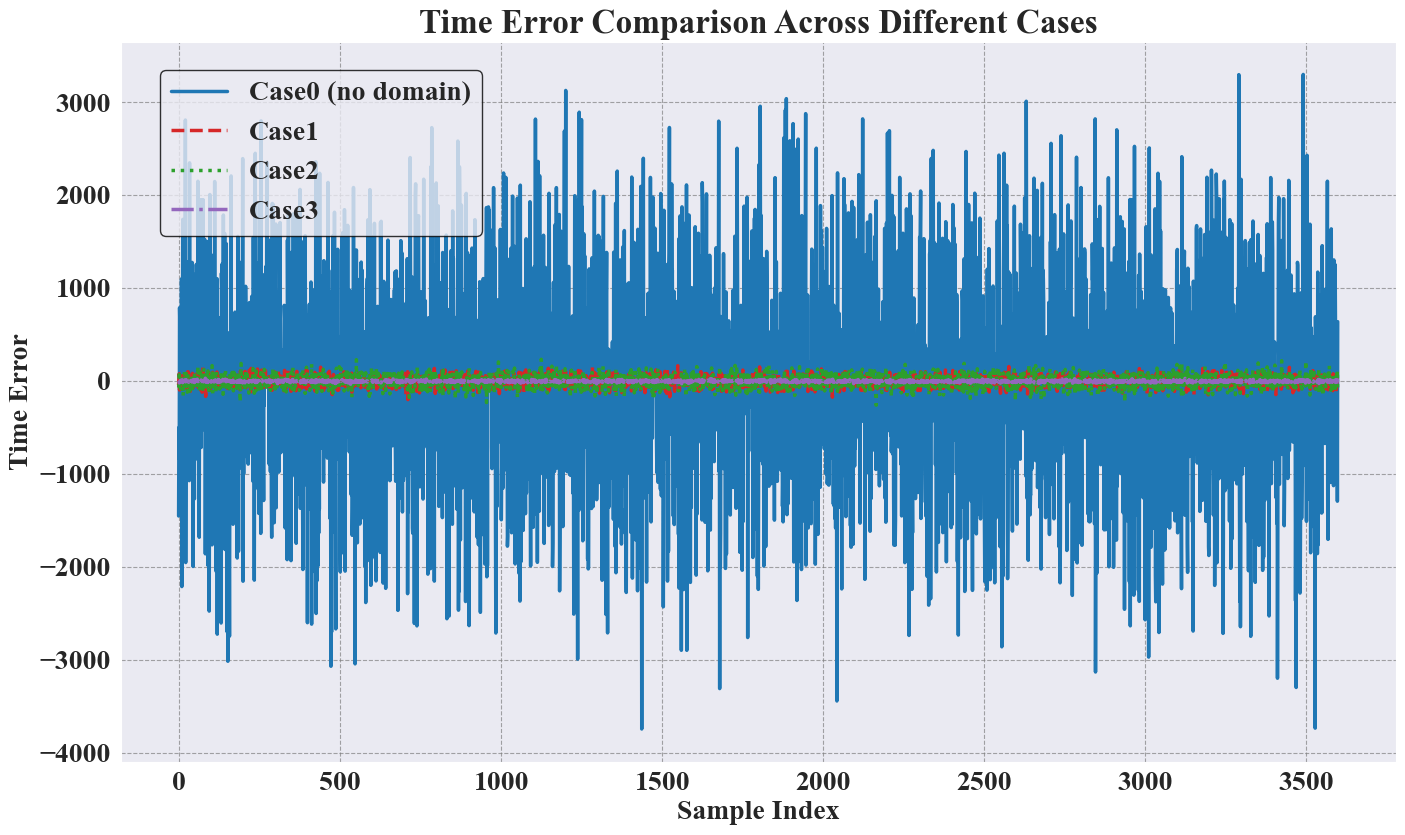

折线图已保存到: output_cases_comparison_v7\cases_comparison.png

所有处理完成！


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# 设置全局字体和字号
plt.rcParams.update({
    'font.size': 20,
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.weight': 'bold',
    'axes.labelweight': 'bold',
    'mathtext.fontset': 'stix'
})

# 1. 定义文件路径
case0_path = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v7\case1_no_domain_data.csv"
case1_path = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v7\case3_data.csv"
case2_path = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v7\case1_data.csv"
case3_path = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v7\case2_data.csv"

# 2. 创建输出目录
output_dir = "output_cases_comparison_v7"
os.makedirs(output_dir, exist_ok=True)
print(f"数据将保存到: {output_dir}")

# 3. 数据预处理函数
def preprocess_data(data_col):
    """处理数据列，去除NaN值并转换为numpy数组"""
    data = data_col.values
    data = np.nan_to_num(data, nan=np.nanmean(data))
    return data

# 4. 读取并处理数据
try:
    # 读取Case0数据
    df0 = pd.read_csv(case0_path)
    print("\nCase0文件加载成功！前5行示例：")
    print(df0.head())
    
    data0 = preprocess_data(df0.iloc[:, -1])  # 假设数据在第一列
    print(f"处理Case0数据: 有效数据点={len(data0)}")
    
    # 读取Case1数据
    df1 = pd.read_csv(case1_path)
    print("\nCase1文件加载成功！前5行示例：")
    print(df1.head())
    
    data1 = preprocess_data(df1.iloc[:, -1])  # 假设数据在第一列
    print(f"处理Case1数据: 有效数据点={len(data1)}")
    
    # 读取Case2数据
    df2 = pd.read_csv(case2_path)
    print("\nCase2文件加载成功！前5行示例：")
    print(df2.head())
    
    data2 = preprocess_data(df2.iloc[:, -1])  # 假设数据在第一列
    print(f"处理Case2数据: 有效数据点={len(data2)}")
    
    # 读取Case3数据
    df3 = pd.read_csv(case3_path)
    print("\nCase3文件加载成功！前5行示例：")
    print(df3.head())
    
    data3 = preprocess_data(df3.iloc[:, --1])  # 假设数据在第一列
    print(f"处理Case3数据: 有效数据点={len(data3)}")
    
except Exception as e:
    print(f"\n数据文件加载失败: {e}")
    raise

# 5. 创建结果DataFrame并保存
result_df = pd.DataFrame({
    "Case0_no_domain": data0,
    "Case1": data1,
    "Case2": data2,
    "Case3": data3
})

output_csv_path = os.path.join(output_dir, "cases_comparison_data.csv")
result_df.to_csv(output_csv_path, index=False)
print(f"\n所有数据已合并保存到: {output_csv_path}")

# 6. 绘制折线图
plt.figure(figsize=(15, 9))
ax = plt.gca()

# 定义线条样式
colors = ['#1f77b4', '#d62728', '#2ca02c', '#9467bd']  # 蓝,红,绿,紫
linestyles = ['-', '--', ':', '-.']
linewidths = [2.5, 2.5, 2.5, 2.5]
labels = ['Case0 (no domain)', 'Case1', 'Case2', 'Case3']

# 绘制四组数据
x = np.arange(len(data0))  # 假设所有数据长度相同
for i, (data, color, linestyle, linewidth, label) in enumerate(zip(
    [data0, data1, data2, data3],
    colors,
    linestyles,
    linewidths,
    labels
)):
    ax.plot(x, data, 
            color=color, 
            linestyle=linestyle,
            linewidth=linewidth,
            label=label)

# 设置图表属性
ax.set_xlabel('Sample Index', fontweight='bold')
ax.set_ylabel('Time Error', fontweight='bold')
ax.set_title('Time Error Comparison Across Different Cases', fontweight='bold')
ax.grid(True, which="both", linestyle='--', color='gray', alpha=0.7)

# 修改图例位置和样式 - 放在左上角内部
legend = ax.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98),
                  frameon=True, framealpha=0.8, edgecolor='black')

# 调整布局以留出足够空间
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.1)

# 保存图表
output_plot_path = os.path.join(output_dir, "cases_comparison.png")
plt.savefig(output_plot_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()
print(f"折线图已保存到: {output_plot_path}")

print("\n所有处理完成！")


# 我将修改代码以添加一个放大特定区域的子图，并且确保从CSV文件中读取最后一列数据。以下是更新后的代码：



数据将保存到: output_cases_comparison

Case0文件加载成功！前5行示例：
      Hop_1      Hop_2      Hop_3      Hop_4      Hop_5      Hop_6      Hop_7  \
0 -7.816776 -10.097401 -21.155930 -16.406625 -25.981833 -28.743373 -31.727305   
1 -6.934507  -6.330090  -1.865074   0.693507   3.447336   0.905332   2.975991   
2 -3.624545  -5.020654 -11.333012 -16.029878  -7.415508 -15.294176 -10.341366   
3 -4.238847  -9.530857  -9.058070 -10.442437 -17.880733 -12.425864 -10.886370   
4 -0.735066  -6.841889  -8.661818  -4.318841  -8.246048  -0.079238  -2.193377   

       Hop_8      Hop_9     Hop_10  ...       Hop_91       Hop_92  \
0 -18.901842 -12.890711  -8.804818  ... -1221.754604 -1218.073700   
1   2.405317   8.529855   2.553083  ...  -381.485849  -468.346043   
2 -14.827721  -8.955535  -4.680495  ...  -573.093850  -580.622347   
3 -15.305494 -15.664524 -12.121708  ...   541.703889   600.166729   
4   6.402929   7.466150   2.802473  ...   519.737184   499.089015   

        Hop_93       Hop_94       Hop_95      

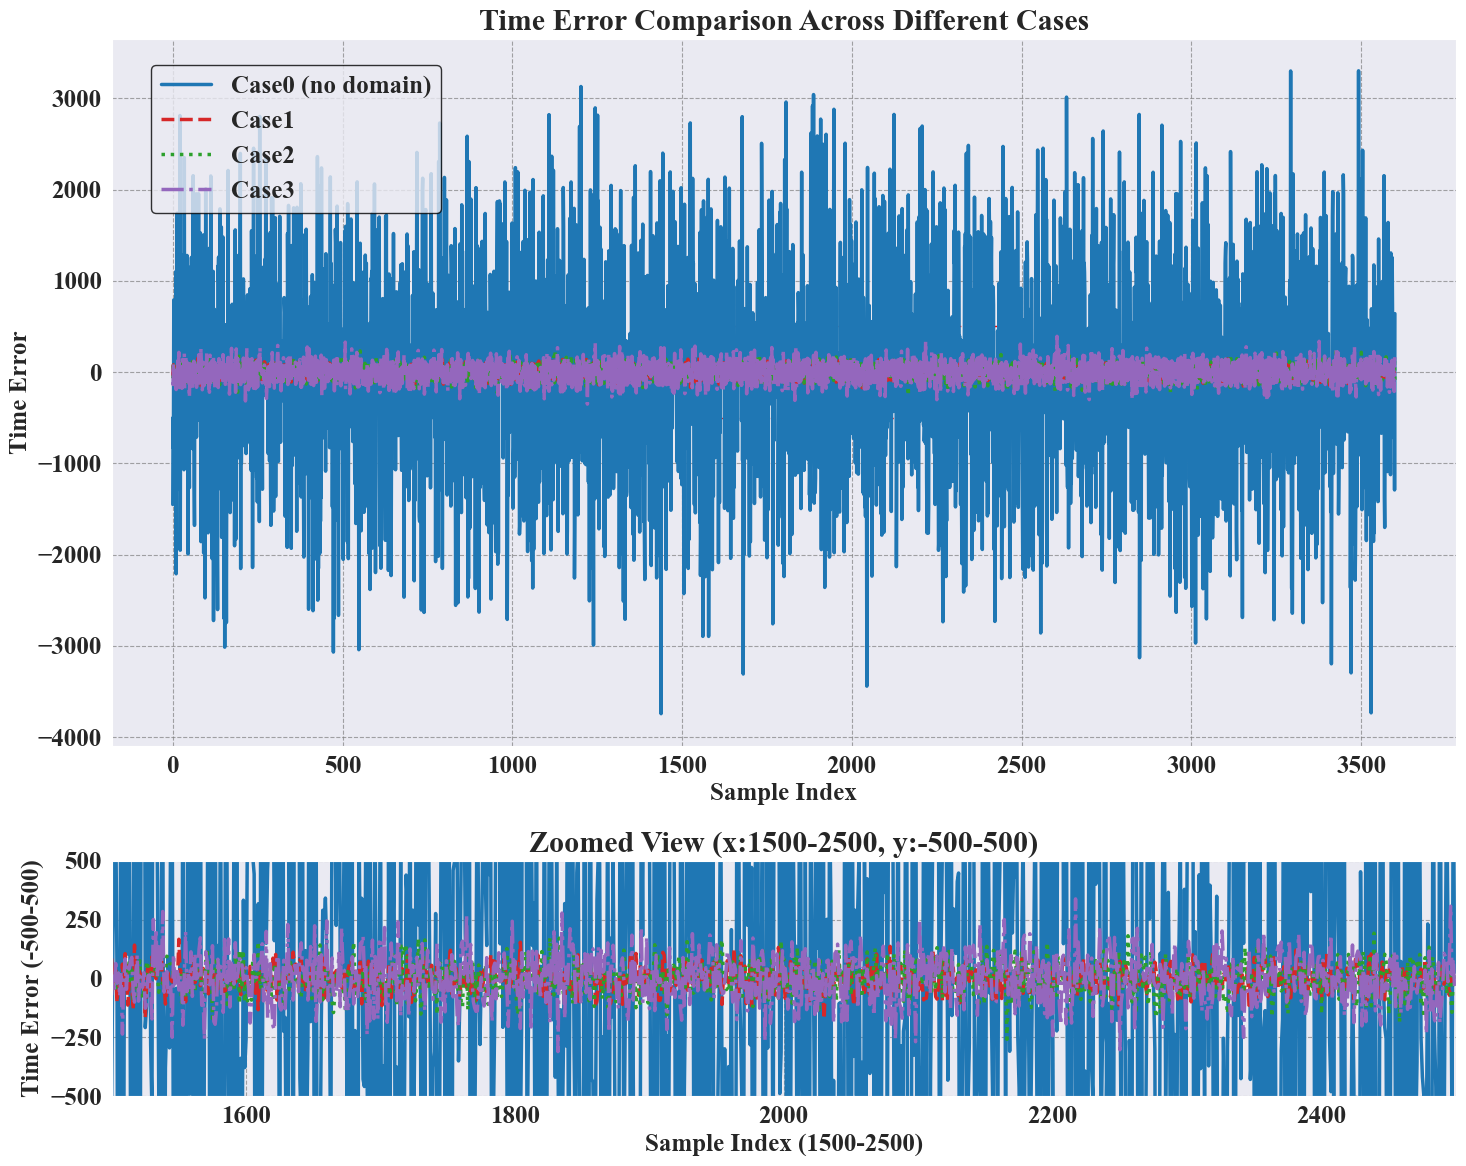

折线图(带放大区域)已保存到: output_cases_comparison\cases_comparison_with_zoom.png

所有处理完成！


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.patches import Rectangle

# 设置全局字体和字号
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.weight': 'bold',
    'axes.labelweight': 'bold',
    'mathtext.fontset': 'stix'
})

# 1. 定义文件路径
case0_path = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v7\case1_no_domain_data.csv"
case1_path = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v7\case3_data.csv"
case2_path = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v7\case1_data.csv"
case3_path = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v7\case2_data.csv"

# 2. 创建输出目录
output_dir = "output_cases_comparison"
os.makedirs(output_dir, exist_ok=True)
print(f"数据将保存到: {output_dir}")

# 3. 数据预处理函数
def preprocess_data(data_col):
    """处理数据列，去除NaN值并转换为numpy数组"""
    data = data_col.values
    data = np.nan_to_num(data, nan=np.nanmean(data))
    return data

# 4. 读取并处理数据
try:
    # 读取Case0数据 (最后一列)
    df0 = pd.read_csv(case0_path)
    print("\nCase0文件加载成功！前5行示例：")
    print(df0.head())
    data0 = preprocess_data(df0.iloc[:, -1])  # 获取最后一列数据
    print(f"处理Case0数据: 有效数据点={len(data0)}")
    
    # 读取Case1数据
    df1 = pd.read_csv(case1_path)
    print("\nCase1文件加载成功！前5行示例：")
    print(df1.head())
    data1 = preprocess_data(df1.iloc[:, -1])  # 获取最后一列数据
    print(f"处理Case1数据: 有效数据点={len(data1)}")
    
    # 读取Case2数据
    df2 = pd.read_csv(case2_path)
    print("\nCase2文件加载成功！前5行示例：")
    print(df2.head())
    data2 = preprocess_data(df2.iloc[:, -1])  # 获取最后一列数据
    print(f"处理Case2数据: 有效数据点={len(data2)}")
    
    # 读取Case3数据
    df3 = pd.read_csv(case3_path)
    print("\nCase3文件加载成功！前5行示例：")
    print(df3.head())
    data3 = preprocess_data(df3.iloc[:, -1])  # 获取最后一列数据
    print(f"处理Case3数据: 有效数据点={len(data3)}")
    
except Exception as e:
    print(f"\n数据文件加载失败: {e}")
    raise

# 5. 创建结果DataFrame并保存
result_df = pd.DataFrame({
    "Case0_no_domain": data0,
    "Case1": data1,
    "Case2": data2,
    "Case3": data3
})

output_csv_path = os.path.join(output_dir, "cases_comparison_data.csv")
result_df.to_csv(output_csv_path, index=False)
print(f"\n所有数据已合并保存到: {output_csv_path}")

# 6. 绘制主图和子图
fig = plt.figure(figsize=(15, 12))
gs = fig.add_gridspec(2, 1, height_ratios=[3, 1])
ax_main = fig.add_subplot(gs[0])
ax_zoom = fig.add_subplot(gs[1])

# 定义线条样式
colors = ['#1f77b4', '#d62728', '#2ca02c', '#9467bd']  # 蓝,红,绿,紫
linestyles = ['-', '--', ':', '-.']
linewidths = [2.5, 2.5, 2.5, 2.5]
labels = ['Case0 (no domain)', 'Case1', 'Case2', 'Case3']

# 绘制主图
x = np.arange(len(data0))  # 假设所有数据长度相同
for i, (data, color, linestyle, linewidth, label) in enumerate(zip(
    [data0, data1, data2, data3],
    colors,
    linestyles,
    linewidths,
    labels
)):
    ax_main.plot(x, data, 
                color=color, 
                linestyle=linestyle,
                linewidth=linewidth,
                label=label)

# 设置主图属性
ax_main.set_xlabel('Sample Index', fontweight='bold')
ax_main.set_ylabel('Time Error', fontweight='bold')
ax_main.set_title('Time Error Comparison Across Different Cases', fontweight='bold')
ax_main.grid(True, which="both", linestyle='--', color='gray', alpha=0.7)

# 修改图例位置和样式 - 放在左上角内部
legend = ax_main.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98),
                      frameon=True, framealpha=0.8, edgecolor='black')

# 定义放大区域 (x:1500-2500, y:-500-500)
zoom_x_start = 1500
zoom_x_end = 2500
zoom_y_min = -500
zoom_y_max = 500

# 在主图上标记放大区域
rect = Rectangle((zoom_x_start, zoom_y_min), 
                 zoom_x_end - zoom_x_start, 
                 zoom_y_max - zoom_y_min,
                 linewidth=1, edgecolor='r', facecolor='none', linestyle='--')
ax_main.add_patch(rect)

# 绘制子图 (放大区域)
for i, (data, color, linestyle, linewidth, label) in enumerate(zip(
    [data0, data1, data2, data3],
    colors,
    linestyles,
    linewidths,
    labels
)):
    ax_zoom.plot(x[zoom_x_start:zoom_x_end], data[zoom_x_start:zoom_x_end], 
                color=color, 
                linestyle=linestyle,
                linewidth=linewidth,
                label=label)

# 设置子图属性
ax_zoom.set_xlim(zoom_x_start, zoom_x_end)
ax_zoom.set_ylim(zoom_y_min, zoom_y_max)
ax_zoom.set_xlabel('Sample Index (1500-2500)', fontweight='bold')
ax_zoom.set_ylabel('Time Error (-500-500)', fontweight='bold')
ax_zoom.set_title('Zoomed View (x:1500-2500, y:-500-500)', fontweight='bold')
ax_zoom.grid(True, which="both", linestyle='--', color='gray', alpha=0.7)

# 调整布局以留出足够空间
plt.tight_layout()

# 保存图表
output_plot_path = os.path.join(output_dir, "cases_comparison_with_zoom.png")
plt.savefig(output_plot_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()
print(f"折线图(带放大区域)已保存到: {output_plot_path}")

print("\n所有处理完成！")


数据将保存到: output_cases_comparison_v7

Case0文件加载成功！前5行示例：
      Hop_1      Hop_2      Hop_3      Hop_4      Hop_5      Hop_6      Hop_7  \
0 -7.816776 -10.097401 -21.155930 -16.406625 -25.981833 -28.743373 -31.727305   
1 -6.934507  -6.330090  -1.865074   0.693507   3.447336   0.905332   2.975991   
2 -3.624545  -5.020654 -11.333012 -16.029878  -7.415508 -15.294176 -10.341366   
3 -4.238847  -9.530857  -9.058070 -10.442437 -17.880733 -12.425864 -10.886370   
4 -0.735066  -6.841889  -8.661818  -4.318841  -8.246048  -0.079238  -2.193377   

       Hop_8      Hop_9     Hop_10  ...       Hop_91       Hop_92  \
0 -18.901842 -12.890711  -8.804818  ... -1221.754604 -1218.073700   
1   2.405317   8.529855   2.553083  ...  -381.485849  -468.346043   
2 -14.827721  -8.955535  -4.680495  ...  -573.093850  -580.622347   
3 -15.305494 -15.664524 -12.121708  ...   541.703889   600.166729   
4   6.402929   7.466150   2.802473  ...   519.737184   499.089015   

        Hop_93       Hop_94       Hop_95   

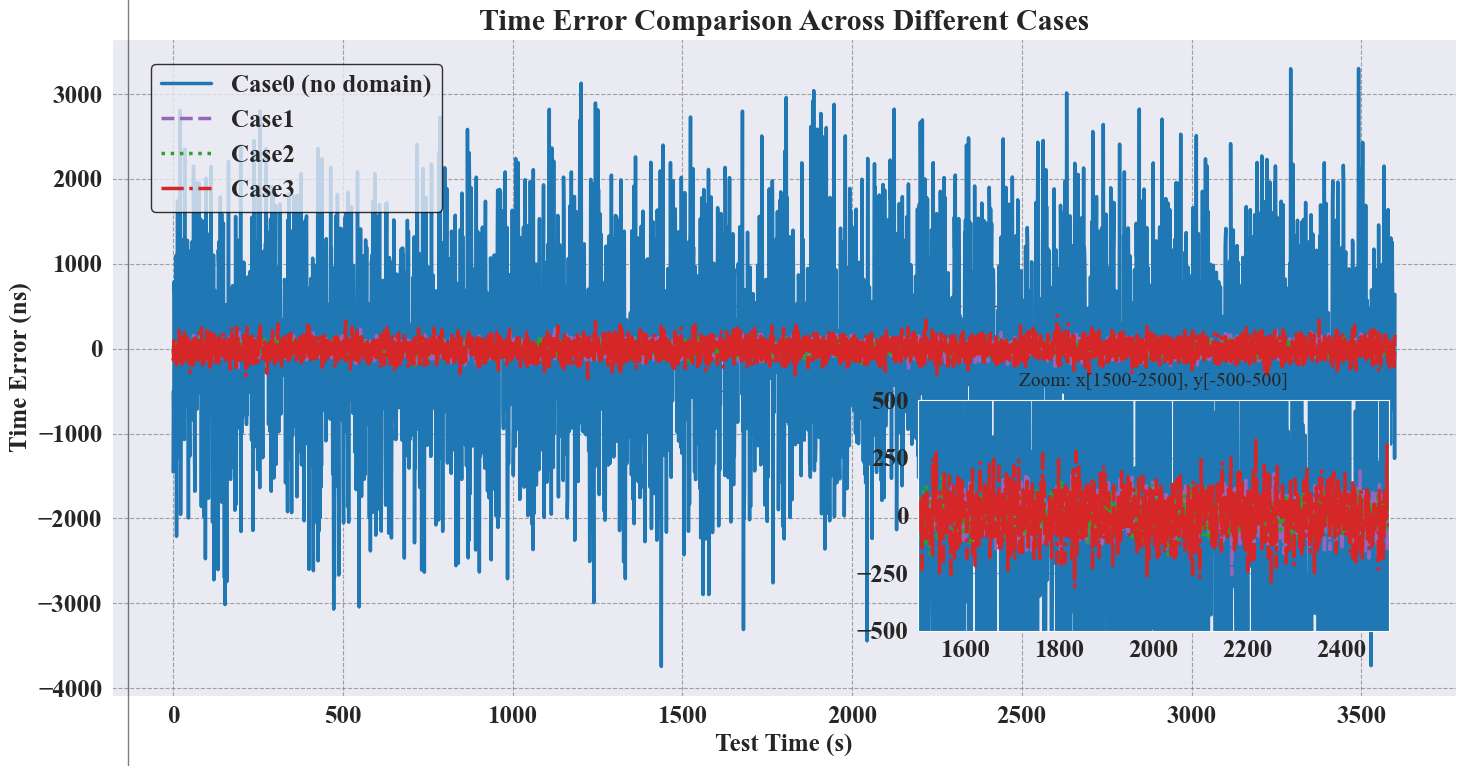

折线图(带插入式放大图)已保存到: output_cases_comparison_v7\cases_comparison_with_inset.png

所有处理完成！


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.patches import Rectangle

# 设置全局字体和字号
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.weight': 'bold',
    'axes.labelweight': 'bold',
    'mathtext.fontset': 'stix'
})

# 1. 定义文件路径
case0_path = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v7\case1_no_domain_data.csv"
case1_path = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v7\case1_data.csv"
case2_path = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v7\case3_data.csv"
case3_path = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v7\case2_data.csv"

# 2. 创建输出目录
output_dir = "output_cases_comparison_v7"
os.makedirs(output_dir, exist_ok=True)
print(f"数据将保存到: {output_dir}")

# 3. 数据预处理函数
def preprocess_data(data_col):
    """处理数据列，去除NaN值并转换为numpy数组"""
    data = data_col.values
    data = np.nan_to_num(data, nan=np.nanmean(data))
    return data

# 4. 读取并处理数据
try:
    # 读取Case0数据 (最后一列)
    df0 = pd.read_csv(case0_path)
    print("\nCase0文件加载成功！前5行示例：")
    print(df0.head())
    data0 = preprocess_data(df0.iloc[:, -1])  # 获取最后一列数据
    print(f"处理Case0数据: 有效数据点={len(data0)}")
    
    # 读取Case1数据
    df3 = pd.read_csv(case1_path)
    print("\nCase1文件加载成功！前5行示例：")
    print(df1.head())
    data3 = preprocess_data(df1.iloc[:, -1])  # 获取最后一列数据
    print(f"处理Case1数据: 有效数据点={len(data1)}")
    
    # 读取Case2数据
    df2 = pd.read_csv(case2_path)
    print("\nCase2文件加载成功！前5行示例：")
    print(df2.head())
    data2 = preprocess_data(df2.iloc[:, -1])  # 获取最后一列数据
    print(f"处理Case2数据: 有效数据点={len(data2)}")
    
    # 读取Case3数据
    df1 = pd.read_csv(case3_path)
    print("\nCase3文件加载成功！前5行示例：")
    print(df3.head())
    data1 = preprocess_data(df3.iloc[:, -1])  # 获取最后一列数据
    print(f"处理Case3数据: 有效数据点={len(data3)}")
    
except Exception as e:
    print(f"\n数据文件加载失败: {e}")
    raise

# 5. 创建结果DataFrame并保存
result_df = pd.DataFrame({
    "Case0_no_domain": data0,
    "Case1": data3,
    "Case2": data2,
    "Case3": data1
})

output_csv_path = os.path.join(output_dir, "cases_comparison_data.csv")
result_df.to_csv(output_csv_path, index=False)
print(f"\n所有数据已合并保存到: {output_csv_path}")

# 6. 绘制主图和插入式放大图
plt.figure(figsize=(15, 8))
ax_main = plt.gca()

# 定义线条样式
colors = ['#1f77b4', '#9467bd', '#2ca02c', '#d62728']  # 蓝,红,绿,紫
linestyles = ['-', '--', ':', '-.']
linewidths = [2.5, 2.5, 2.5, 2.5]
labels = ['Case0 (no domain)', 'Case1', 'Case2', 'Case3']

# 绘制主图
x = np.arange(len(data0))  # 假设所有数据长度相同
for i, (data, color, linestyle, linewidth, label) in enumerate(zip(
    [data0, data1, data2, data3],
    colors,
    linestyles,
    linewidths,
    labels
)):
    ax_main.plot(x, data, 
                color=color, 
                linestyle=linestyle,
                linewidth=linewidth,
                label=label)

# 设置主图属性
ax_main.set_xlabel('Test Time (s)', fontweight='bold')
ax_main.set_ylabel('Time Error (ns)', fontweight='bold')
ax_main.set_title('Time Error Comparison Across Different Cases', fontweight='bold')
ax_main.grid(True, which="both", linestyle='--', color='gray', alpha=0.7)

# 修改图例位置和样式 - 放在左上角内部
legend = ax_main.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98),
                      frameon=True, framealpha=0.8, edgecolor='black')

# 定义放大区域 (x:1500-2500, y:-500-500)
zoom_x_start = 1500
zoom_x_end = 2500
zoom_y_min = -500
zoom_y_max = 500

# 在主图上标记放大区域
rect = Rectangle((zoom_x_start, zoom_y_min), 
                 zoom_x_end - zoom_x_start, 
                 zoom_y_max - zoom_y_min,
                 linewidth=1, edgecolor='r', facecolor='none', linestyle='--')
ax_main.add_patch(rect)

# 创建插入式放大图 (放在右下角)
ax_zoom = ax_main.inset_axes([0.6, 0.1, 0.35, 0.35])  # [x, y, width, height]

# 绘制放大图
for i, (data, color, linestyle, linewidth, label) in enumerate(zip(
    [data0, data1, data2, data3],
    colors,
    linestyles,
    linewidths,
    labels
)):
    ax_zoom.plot(x[zoom_x_start:zoom_x_end], data[zoom_x_start:zoom_x_end], 
                color=color, 
                linestyle=linestyle,
                linewidth=linewidth)

# 设置放大图属性
ax_zoom.set_xlim(zoom_x_start, zoom_x_end)
ax_zoom.set_ylim(zoom_y_min, zoom_y_max)
ax_zoom.grid(True, which="both", linestyle='--', color='gray', alpha=0.7)
ax_zoom.set_title('Zoom: x[1500-2500], y[-500-500]', fontsize=14, pad=10)

# 添加放大图的边界框
ax_zoom.indicate_inset_zoom(ax_main, edgecolor="black")

# 调整布局以留出足够空间
plt.tight_layout()

# 保存图表
output_plot_path = os.path.join(output_dir, "cases_comparison_with_inset.png")
plt.savefig(output_plot_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()
print(f"折线图(带插入式放大图)已保存到: {output_plot_path}")

print("\n所有处理完成！")


数据将保存到: output_cases_comparison_v7

Case0文件加载成功！前5行示例：
      Hop_1      Hop_2      Hop_3      Hop_4      Hop_5      Hop_6      Hop_7  \
0 -7.816776 -10.097401 -21.155930 -16.406625 -25.981833 -28.743373 -31.727305   
1 -6.934507  -6.330090  -1.865074   0.693507   3.447336   0.905332   2.975991   
2 -3.624545  -5.020654 -11.333012 -16.029878  -7.415508 -15.294176 -10.341366   
3 -4.238847  -9.530857  -9.058070 -10.442437 -17.880733 -12.425864 -10.886370   
4 -0.735066  -6.841889  -8.661818  -4.318841  -8.246048  -0.079238  -2.193377   

       Hop_8      Hop_9     Hop_10  ...       Hop_91       Hop_92  \
0 -18.901842 -12.890711  -8.804818  ... -1221.754604 -1218.073700   
1   2.405317   8.529855   2.553083  ...  -381.485849  -468.346043   
2 -14.827721  -8.955535  -4.680495  ...  -573.093850  -580.622347   
3 -15.305494 -15.664524 -12.121708  ...   541.703889   600.166729   
4   6.402929   7.466150   2.802473  ...   519.737184   499.089015   

        Hop_93       Hop_94       Hop_95   

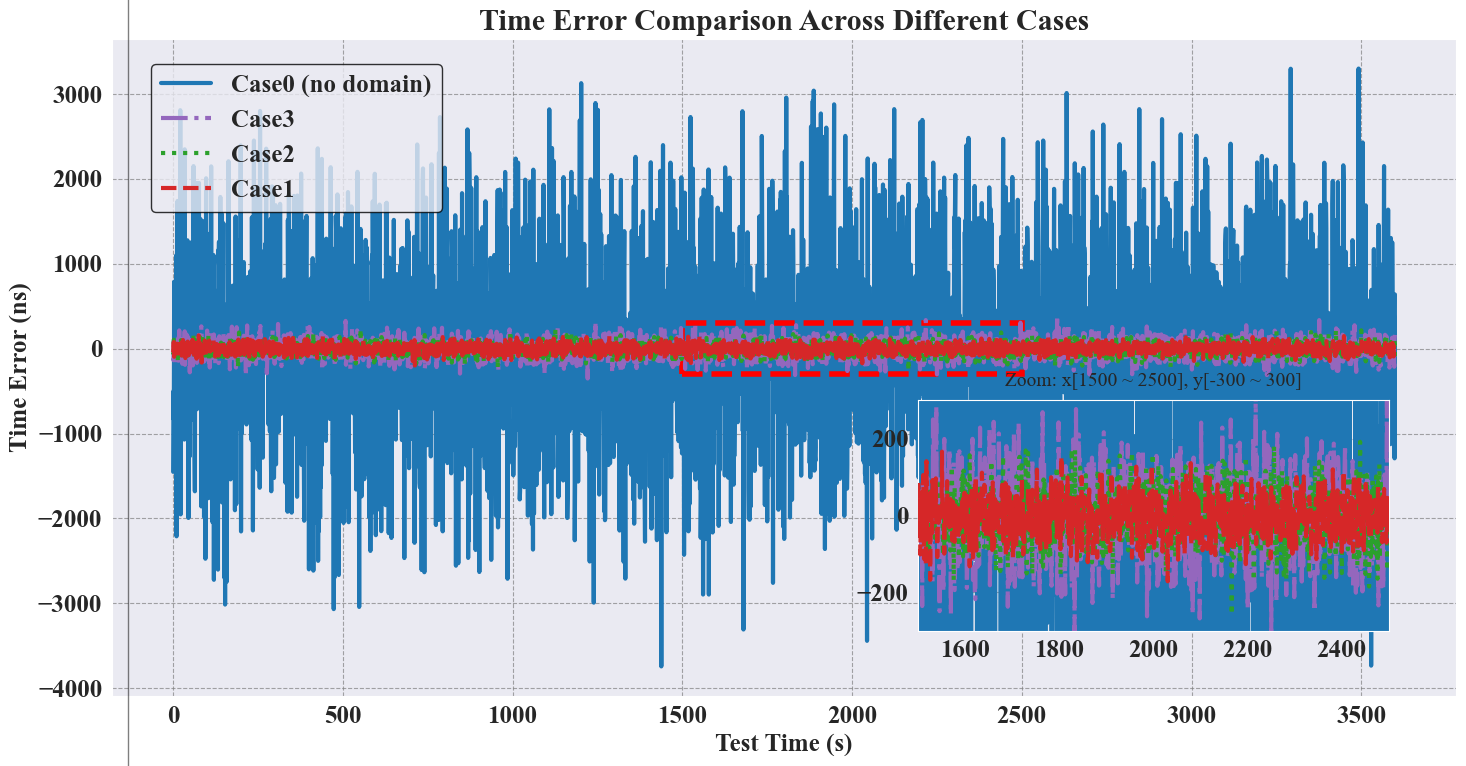

折线图(带插入式放大图)已保存到: output_cases_comparison_v7\cases_comparison_with_inset.png


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.patches import Rectangle

# 设置全局字体和字号
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.weight': 'bold',
    'axes.labelweight': 'bold',
    'mathtext.fontset': 'stix'
})

# 1. 定义文件路径
case0_path = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v7\case1_no_domain_data.csv"
case1_path = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v7\case3_data.csv"
case2_path = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v7\case1_data.csv"
case3_path = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v7\case2_data.csv"

# 2. 创建输出目录
output_dir = "output_cases_comparison_v7"
os.makedirs(output_dir, exist_ok=True)
print(f"数据将保存到: {output_dir}")

# 3. 数据预处理函数
def preprocess_data(data_col):
    """处理数据列，去除NaN值并转换为numpy数组"""
    data = data_col.values
    data = np.nan_to_num(data, nan=np.nanmean(data))
    return data

# 4. 读取并处理数据
try:
    # 读取Case0数据 (最后一列)
    df0 = pd.read_csv(case0_path)
    print("\nCase0文件加载成功！前5行示例：")
    print(df0.head())
    data0 = preprocess_data(df0.iloc[:, -1])  # 获取最后一列数据
    print(f"处理Case0数据: 有效数据点={len(data0)}")

    # 读取Case1数据
    df1 = pd.read_csv(case1_path)
    print("\nCase1文件加载成功！前5行示例：")
    print(df1.head())
    data1 = preprocess_data(df1.iloc[:, -1])  # 获取最后一列数据
    print(f"处理Case1数据: 有效数据点={len(data1)}")

    # 读取Case2数据
    df2 = pd.read_csv(case2_path)
    print("\nCase2文件加载成功！前5行示例：")
    print(df2.head())
    data2 = preprocess_data(df2.iloc[:, -1])  # 获取最后一列数据
    print(f"处理Case2数据: 有效数据点={len(data2)}")

    # 读取Case3数据
    df3 = pd.read_csv(case3_path)
    print("\nCase3文件加载成功！前5行示例：")
    print(df3.head())
    data3 = preprocess_data(df3.iloc[:, -1])  # 获取最后一列数据
    print(f"处理Case3数据: 有效数据点={len(data3)}")

except Exception as e:
    print(f"\n数据文件加载失败: {e}")
    raise

# 5. 创建结果DataFrame并保存
result_df = pd.DataFrame({
    "Case0_no_domain": data0,
    "Case1": data1,
    "Case2": data2,
    "Case3": data3
})

output_csv_path = os.path.join(output_dir, "cases_comparison_data.csv")
result_df.to_csv(output_csv_path, index=False)
print(f"\n所有数据已合并保存到: {output_csv_path}")

# 6. 绘制主图和插入式放大图
plt.figure(figsize=(15, 8))
ax_main = plt.gca()

# 定义线条样式
colors = ['#1f77b4', '#d62728', '#2ca02c', '#9467bd']  # 蓝,红,绿,紫
linestyles = ['-', '--', ':', '-.']
linewidths = [3, 3, 3, 3]
labels = ['Case0 (no domain)', 'Case1', 'Case2', 'Case3']

# 定义绘制顺序: 从最大值到最小值 (Case0, Case3, Case2, Case1)
# 按照您的要求: Case0最大(放底层), 然后依次是Case3, Case2, Case1(最小,放顶层)
plot_order = [0, 3, 2, 1]  # 对应data0, data3, data2, data1
z_orders = [1, 2, 3, 4]    # 数值越大,显示在越上层

# 绘制主图 - 按新顺序绘制
x = np.arange(len(data0))
for idx, i in enumerate(plot_order):
    data = [data0, data1, data2, data3][i]
    ax_main.plot(x, data,
                color=colors[i],
                linestyle=linestyles[i],
                linewidth=linewidths[i],
                label=labels[i],
                zorder=z_orders[idx])  # 使用对应的zorder

# 设置主图属性
ax_main.set_xlabel('Test Time (s)', fontweight='bold')
ax_main.set_ylabel('Time Error (ns)', fontweight='bold')
ax_main.set_title('Time Error Comparison Across Different Cases', fontweight='bold')
ax_main.grid(True, which="both", linestyle='--', color='gray', alpha=0.7)
legend = ax_main.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98),
                      frameon=True, framealpha=0.8, edgecolor='black')

# 定义放大区域
zoom_x_start = 1500
zoom_x_end = 2500
zoom_y_min = -300
zoom_y_max = 300
rect = Rectangle((zoom_x_start, zoom_y_min),
                 zoom_x_end - zoom_x_start,
                 zoom_y_max - zoom_y_min,
                 linewidth=4, edgecolor='r', facecolor='none', linestyle='--')
ax_main.add_patch(rect)

# 创建插入式放大图 (放在右下角)
ax_zoom = ax_main.inset_axes([0.6, 0.1, 0.35, 0.35])

# 绘制放大图 - 按同样顺序和zorder绘制
for idx, i in enumerate(plot_order):
    data = [data0, data1, data2, data3][i]
    ax_zoom.plot(x[zoom_x_start:zoom_x_end], data[zoom_x_start:zoom_x_end],
                color=colors[i],
                linestyle=linestyles[i],
                linewidth=linewidths[i],
                zorder=z_orders[idx])

# 设置放大图属性
ax_zoom.set_xlim(zoom_x_start, zoom_x_end)
ax_zoom.set_ylim(zoom_y_min, zoom_y_max)
ax_zoom.grid(True, which="both", linestyle='--', color='gray', alpha=0.7)
ax_zoom.set_title('Zoom: x[1500 ~ 2500], y[-300 ~ 300]', fontsize=14, pad=10)
ax_zoom.indicate_inset_zoom(ax_main, edgecolor="black")

# 调整布局以留出足够空间
plt.tight_layout()

# 保存图表
output_plot_path = os.path.join(output_dir, "cases_comparison_with_inset.png")
plt.savefig(output_plot_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()
print(f"折线图(带插入式放大图)已保存到: {output_plot_path}")

数据将保存到: output_data
图片将保存到: output_image

正在处理 Case0: D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v7\case1_no_domain_data.csv
列名: Hop_100
前5个数据点: 0   -1450.695337
1    -498.422840
2    -834.735818
3     790.608408
4     602.134142
Name: Hop_100, dtype: float64
有效数据点: 3600

正在处理 Case1: D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v7\case3_data.csv
列名: Hop_100
前5个数据点: 0   -41.686064
1    34.088710
2    78.884258
3   -94.216899
4    20.465321
Name: Hop_100, dtype: float64
有效数据点: 3600

正在处理 Case2: D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v7\case1_data.csv
列名: Hop_100
前5个数据点: 0    -47.457889
1    -59.108695
2    106.308902
3    -67.871746
4    -11.134785
Name: Hop_100, dtype: float64
有效数据点: 3600

正在处理 Case3: D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v7\case2_data.csv
列名: Hop_100
前5个数据点: 0   -113.557660
1   -136.045869
2     93.646304

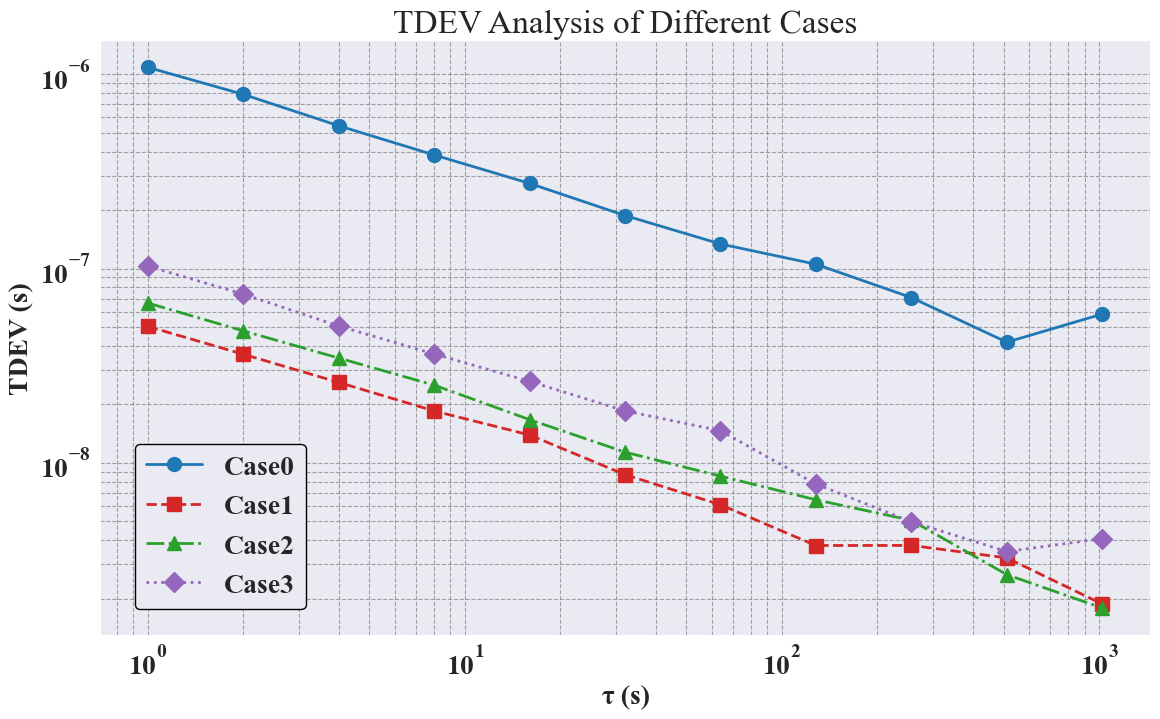

组合TDEV图（秒单位）已保存到: output_image\combined_tdev_plot_seconds.png

所有处理完成！


In [48]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/5/7
*  @Project :   pj_gptp_simulation
*  @Description :   TDEV Analysis for multiple case files
**************************************
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import allantools
import os

# 设置全局字体和字号
plt.rcParams.update({
    'font.size': 20,
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.weight': 'bold',
    'axes.labelweight': 'bold',
    'mathtext.fontset': 'stix'
})

# 1. 定义文件路径
files = {
    "Case0": r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v7\case1_no_domain_data.csv",
    "Case1": r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v7\case3_data.csv",
    "Case2": r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v7\case1_data.csv",
    "Case3": r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250506\output_data_text_v7\case2_data.csv"
}

# 2. 数据预处理函数（纳秒转秒）
def preprocess_data(data):
    time_errors_ns = data.values  # 原始数据单位：纳秒
    time_errors = time_errors_ns / 1e9  # 转换为秒
    fs = 1  # 默认采样率1Hz

    if len(time_errors) < 10:
        raise ValueError("数据点不足（至少需要10个点）")
    if np.all(np.isnan(time_errors)):
        raise ValueError("时间误差数据全为NaN")

    time_errors = np.nan_to_num(time_errors, nan=np.nanmean(time_errors))
    return time_errors, fs

# 3. 创建输出目录 
output_data_dir = "output_data"
output_image_dir = "output_image"
os.makedirs(output_data_dir, exist_ok=True)
os.makedirs(output_image_dir, exist_ok=True)
print(f"数据将保存到: {output_data_dir}")
print(f"图片将保存到: {output_image_dir}")

# 4. 准备存储所有TDEV结果的DataFrame
all_tdev_results = pd.DataFrame()

# 5. 创建组合图
plt.figure(figsize=(12, 8))
ax = plt.gca()

# 定义线条样式
colors = ['#1f77b4', '#d62728', '#2ca02c', '#9467bd']
linestyles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'D']
marker_sizes = [10, 10, 10, 10]

# 6. 遍历每个文件
for idx, (case_name, file_path) in enumerate(files.items()):
    try:
        # 加载CSV文件
        print(f"\n正在处理 {case_name}: {file_path}")
        df = pd.read_csv(file_path)
        
        # 获取最后一列数据
        last_column = df.iloc[:, -1]
        print(f"列名: {df.columns[-1]}")
        print(f"前5个数据点: {last_column.head()}")
        
        # 处理数据
        time_errors, fs = preprocess_data(last_column)
        print(f"有效数据点: {len(time_errors)}")

        # 计算自定义tau数组 [2^0, 2^1, ..., 2^n < data_length/2]
        max_tau = len(time_errors) // 2
        custom_taus = []
        n = 0
        while True:
            current_tau = 2 ** n
            if current_tau >= max_tau:
                break
            custom_taus.append(current_tau)
            n += 1

        # 计算TDEV（单位：秒）
        taus, tdev, _, _ = allantools.tdev(
            data=time_errors,
            rate=fs,
            data_type="phase",
            taus=custom_taus
        )

        # 存储结果
        temp_df = pd.DataFrame({
            f"tau_{case_name}": taus,
            f"tdev_{case_name}": tdev
        })

        if all_tdev_results.empty:
            all_tdev_results = temp_df
        else:
            all_tdev_results = pd.concat([all_tdev_results, temp_df], axis=1)

        # 绘制到组合图中
        ax.loglog(taus, tdev,
                 color=colors[idx],
                 linestyle=linestyles[idx],
                 marker=markers[idx],
                 markersize=marker_sizes[idx],
                 markevery=1,
                 linewidth=2,
                 label=case_name)

    except Exception as e:
        print(f"处理 {case_name} 时出错: {e}")
        continue

# 7. 保存所有TDEV结果到CSV（单位：秒）
output_csv_path = os.path.join(output_data_dir, "all_tdev_results_seconds.csv")
all_tdev_results.to_csv(output_csv_path, index=False)
print(f"\n所有TDEV数据（秒单位）已保存到: {output_csv_path}")

# 8. 完善并保存组合图
ax.set_xlabel('τ (s)')
ax.set_ylabel('TDEV (s)')
ax.set_title('TDEV Analysis of Different Cases')
ax.grid(True, which="both", linestyle='--', color='gray', alpha=0.7)

# 修改图例位置为左下角
ax.legend(loc='lower left', bbox_to_anchor=(0.02, 0.02),
          framealpha=1, edgecolor='black', frameon=True)

plt.tight_layout(rect=[0, 0, 1, 0.95])

# 保存组合图
output_plot_path = os.path.join(output_image_dir, "combined_tdev_plot_seconds.png")
plt.savefig(output_plot_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()
print(f"组合TDEV图（秒单位）已保存到: {output_plot_path}")

print("\n所有处理完成！")